# Lesson 3: Basic Python for Data Analytics (Stocks Prediction)

# Introduction of Pandas


pandas is a DataFrame Framework, a library that stores data in a highly efficient spreadsheet format and functions.
Efficient in:
1. Data Structure (numpy)
2. Computing time (since DataFrame is processed by C++, it runs in a well streamlined computing environment)
3. Highly optimized and updated processes


[For more details of numpy](https://en.wikipedia.org/wiki/NumPy)

[For more details of pandas cookbook and 10 minutes basic](http://pandas.pydata.org/pandas-docs/stable/10min.html)

## Objective

* To use pandas to load the latest updated data from Yahoo Finance
* To explore and understand the dataset 
    * Viewing the data
    * Correlation Analysis
    * Graphing using matplotlib
* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)
* Comparing models and discuss improvements
* Challenges:
    * Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
    * Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
    * Cleaning out the data
    * Importing data files
* Next lesson:
    * Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)

## Loading YahooFinance Dataset

In this demonstration, we will use pandas web data reader. This is an extension of pandas library to communicate with most updated financial data. 

This will include sources as:
* Yahoo! Finance
* Google Finance
* Enigma
* FRED
* Fama/French
* World Bank
* OECD
* Eurostat
* EDGAR Index
* TSP Fund Data
* Oanda currency historical rate
* Nasdaq Trader Symbol Definitions

[For more details of pandas webreader](https://pandas-datareader.readthedocs.io/en/latest/)  

In [325]:
import sys
print (sys.prefix)

/usr


In [326]:

!pip install pandas
!pip show pandas_datareader
!pip install --upgrade pandas_datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: lxml, pandas, requests
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [327]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [328]:
!pip install yfinance
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [329]:
ipsa = ['HLAG.DE','MAERSK-B.CO','VALE','INVERCAP.SN','SQM-B.SN','CHILE.SN','BSANTANDER.SN','COPEC.SN','CENCOSUD.SN','FALABELLA.SN','ENELAM.SN','CMPC.SN','BCI.SN','VAPORES.SN','CAP.SN','CCU.SN','ENELCHILE.SN','ANDINA-B.SN','CONCHATORO.SN','PARAUCO.SN','ITAUCORP.SN','AGUAS-A.SN','COLBUN.SN','CENCOSHOPP.SN','ENTEL.SN','MALLPLAZA.SN','IAM.SN','SMU.SN','ECL.SN','SONDA.SN','RIPLEY.SN','SECURITY.SN', 'QUINENCO.SN', 'BESALCO.SN','MASISA.SN', 'LTM.SN','ENJOY.SN']
ipsa2 = ['NVDA','AMD','TSLA', 'LMT','AMZN', 'FB']
accion_predecir = 'BABA'


In [330]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

#start = datetime.datetime(2002, 1, 1)
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2022, 11, 18)

df = web.DataReader(accion_predecir, 'yahoo', start, end)
df.tail()

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2022-11-14  74.000000  71.320000  73.160004  71.330002  30310700  71.330002
2022-11-15  80.370003  77.809998  78.930000  79.300003  53150500  79.300003
2022-11-16  80.449997  77.410004  80.320000  78.160004  26637300  78.160004
2022-11-17  85.680000  75.760002  76.000000  84.260002  62050600  84.260002
2022-11-18  82.519997  79.860001  82.150002  80.480003  29448700  80.480003

In [331]:
#CODIGO EN DESARROLLO

def acciones(accion_predecirs):
  df = accion_predecirs[0:-3]
  print("df"+str(df))

  globals()["df" + str(accion_predecirs[0:-3])] = web.DataReader(accion_predecirs, 'yahoo', start, end)
  return globals()["df" + str(accion_predecirs[0:-3])]


for i in ipsa:
  print("******************************************************************************")
  print(i)
  d = acciones(i)
  #d.tail()
  #print(d)
  print("******************************************************************************")
 

******************************************************************************
HLAG.DE
dfHLAG
******************************************************************************
******************************************************************************
MAERSK-B.CO
dfMAERSK-B
******************************************************************************
******************************************************************************
VALE
dfV
******************************************************************************
******************************************************************************
INVERCAP.SN
dfINVERCAP
******************************************************************************
******************************************************************************
SQM-B.SN
dfSQM-B
******************************************************************************
******************************************************************************
CHILE.SN
dfCHILE
***************************

Get the dimension of dataframe

In [332]:
'''
for i in ipsa:
  print("******************************************************************************")
  print(i)
  d = acciones(i)
  d.tail()
  print(d)
  print("******************************************************************************")

'''

'\nfor i in ipsa:\n  print("******************************************************************************")\n  print(i)\n  d = acciones(i)\n  d.tail()\n  print(d)\n  print("******************************************************************************")\n\n'

## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

[For more details of rolling mean](http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) 


In [333]:
close_px = dfCMPC['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2022-11-07    1564.820292
2022-11-08    1567.238904
2022-11-09    1568.744542
2022-11-10    1570.515155
2022-11-11    1571.945770
2022-11-14    1573.336392
2022-11-15    1574.347015
2022-11-16    1574.857654
2022-11-17    1575.298291
2022-11-18    1576.068914
Name: Adj Close, dtype: float64

In [334]:

for i in ipsa:

  globals()["close_px_" + str(i[0:-3])] = globals()["df" + str(i[0:-3])]['Adj Close']
  globals()["mavg" + str(i[0:-3])] = close_px.rolling(window=100).mean()
  globals()["mavg" + str(i[0:-3])].tail(10)

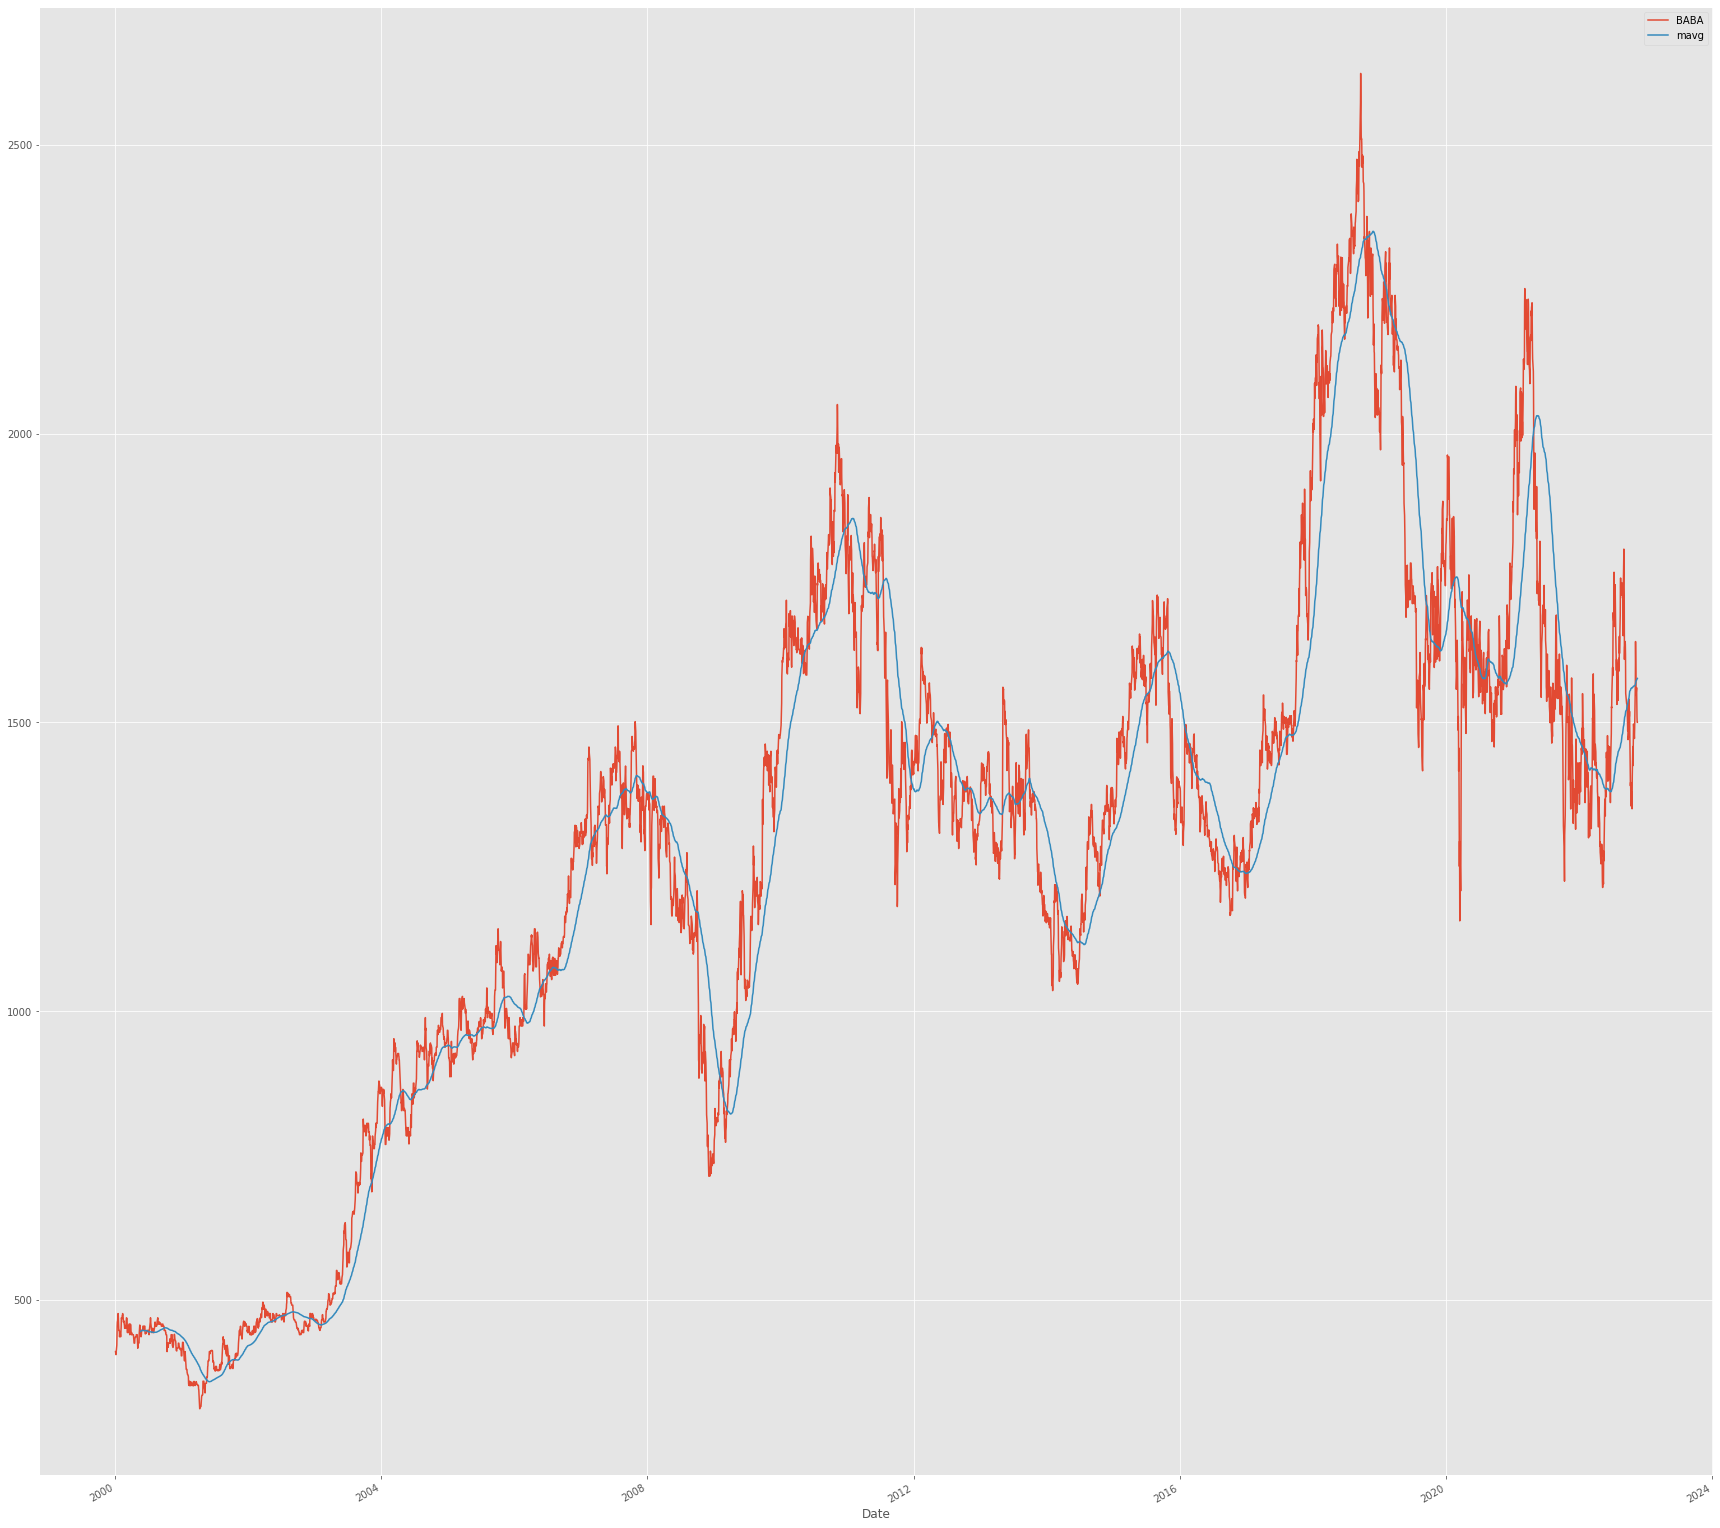

In [335]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(30, 30))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label=accion_predecir)
mavg.plot(label='mavg')
plt.legend()

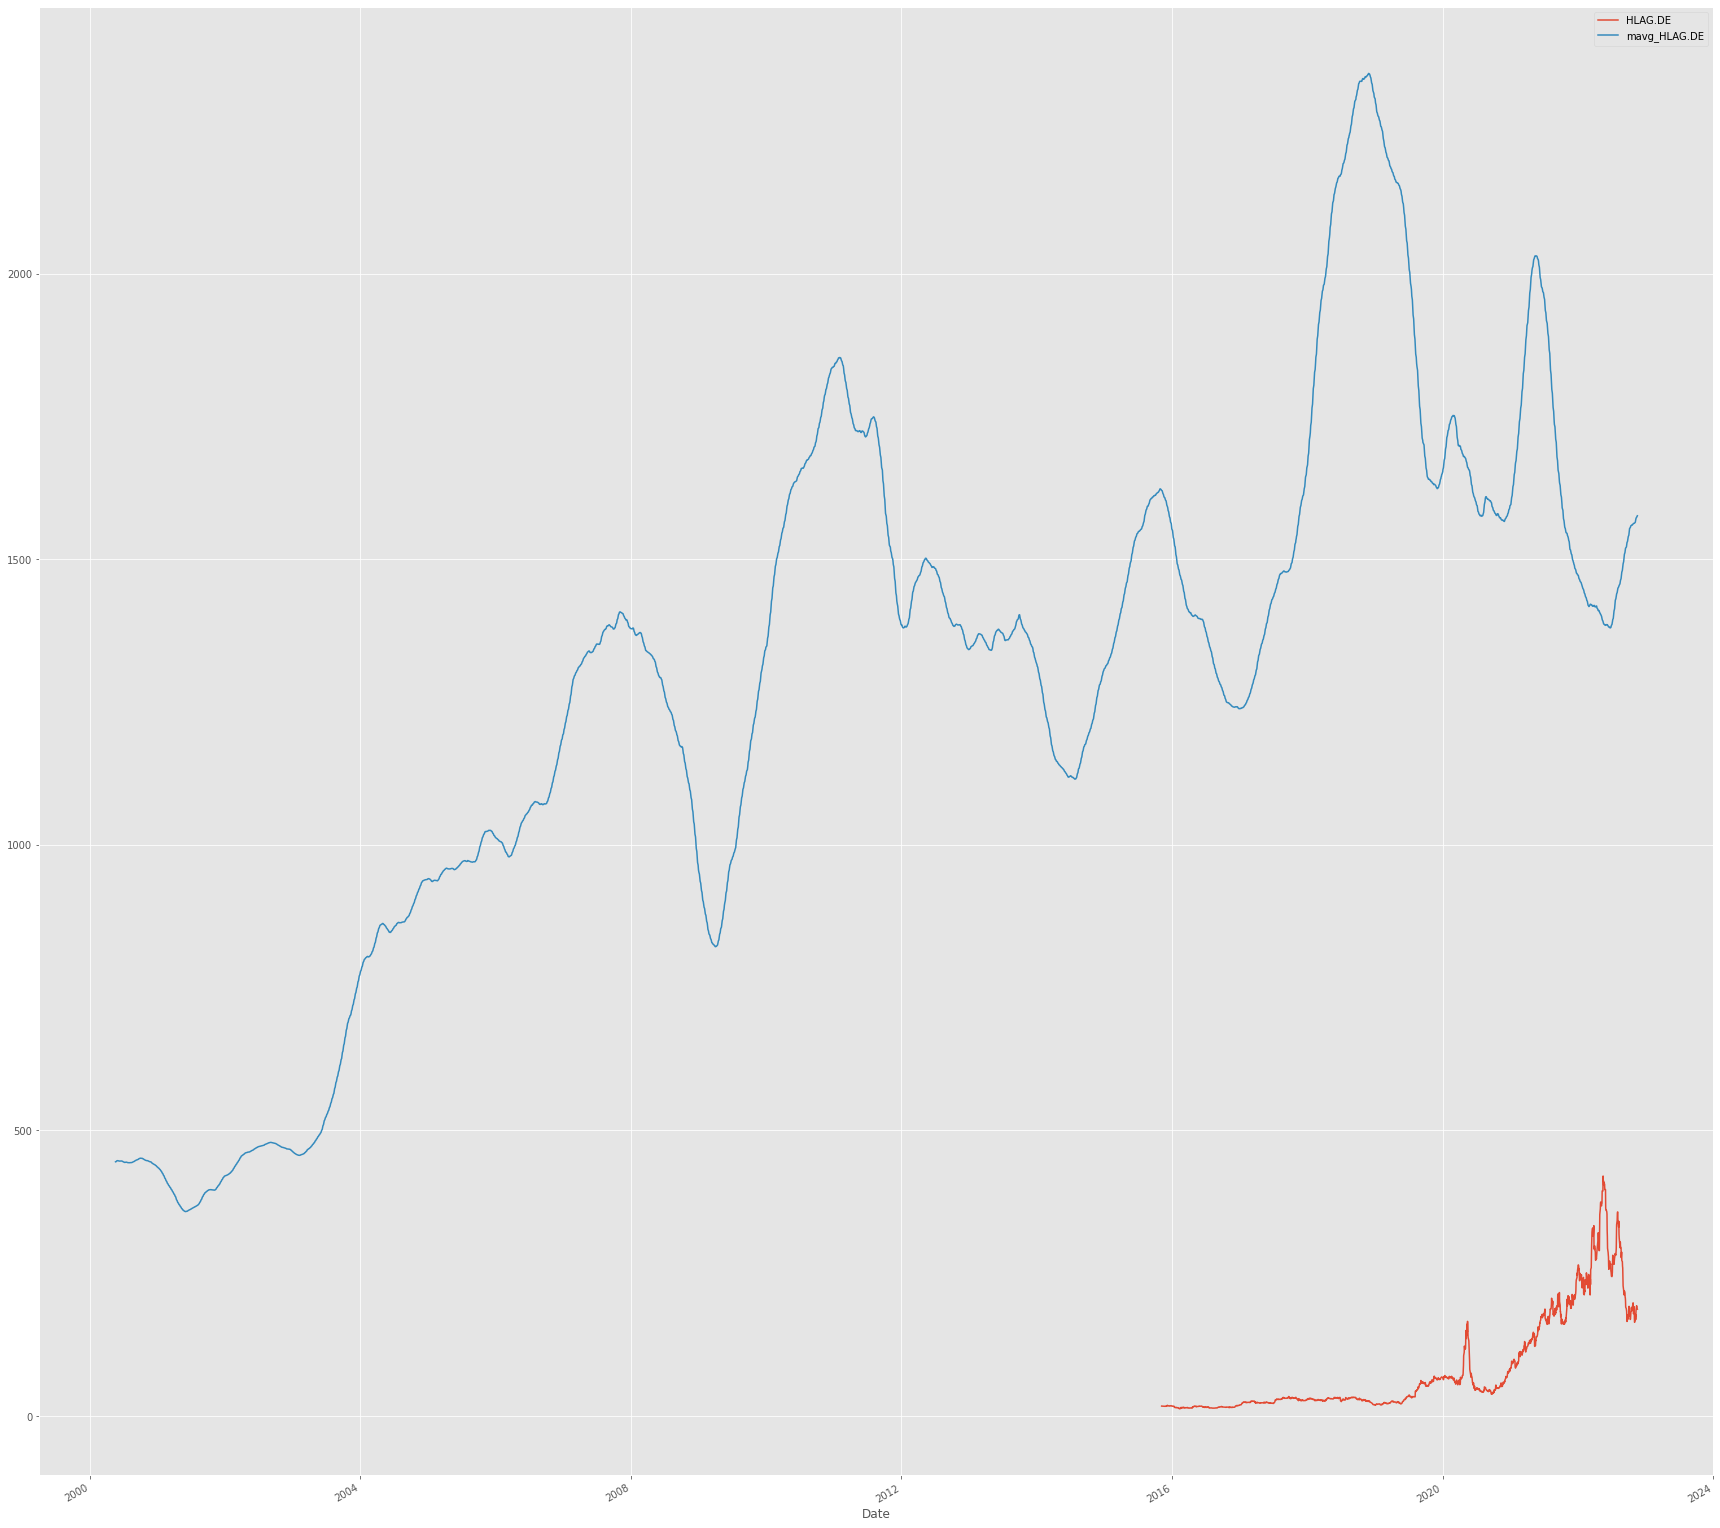

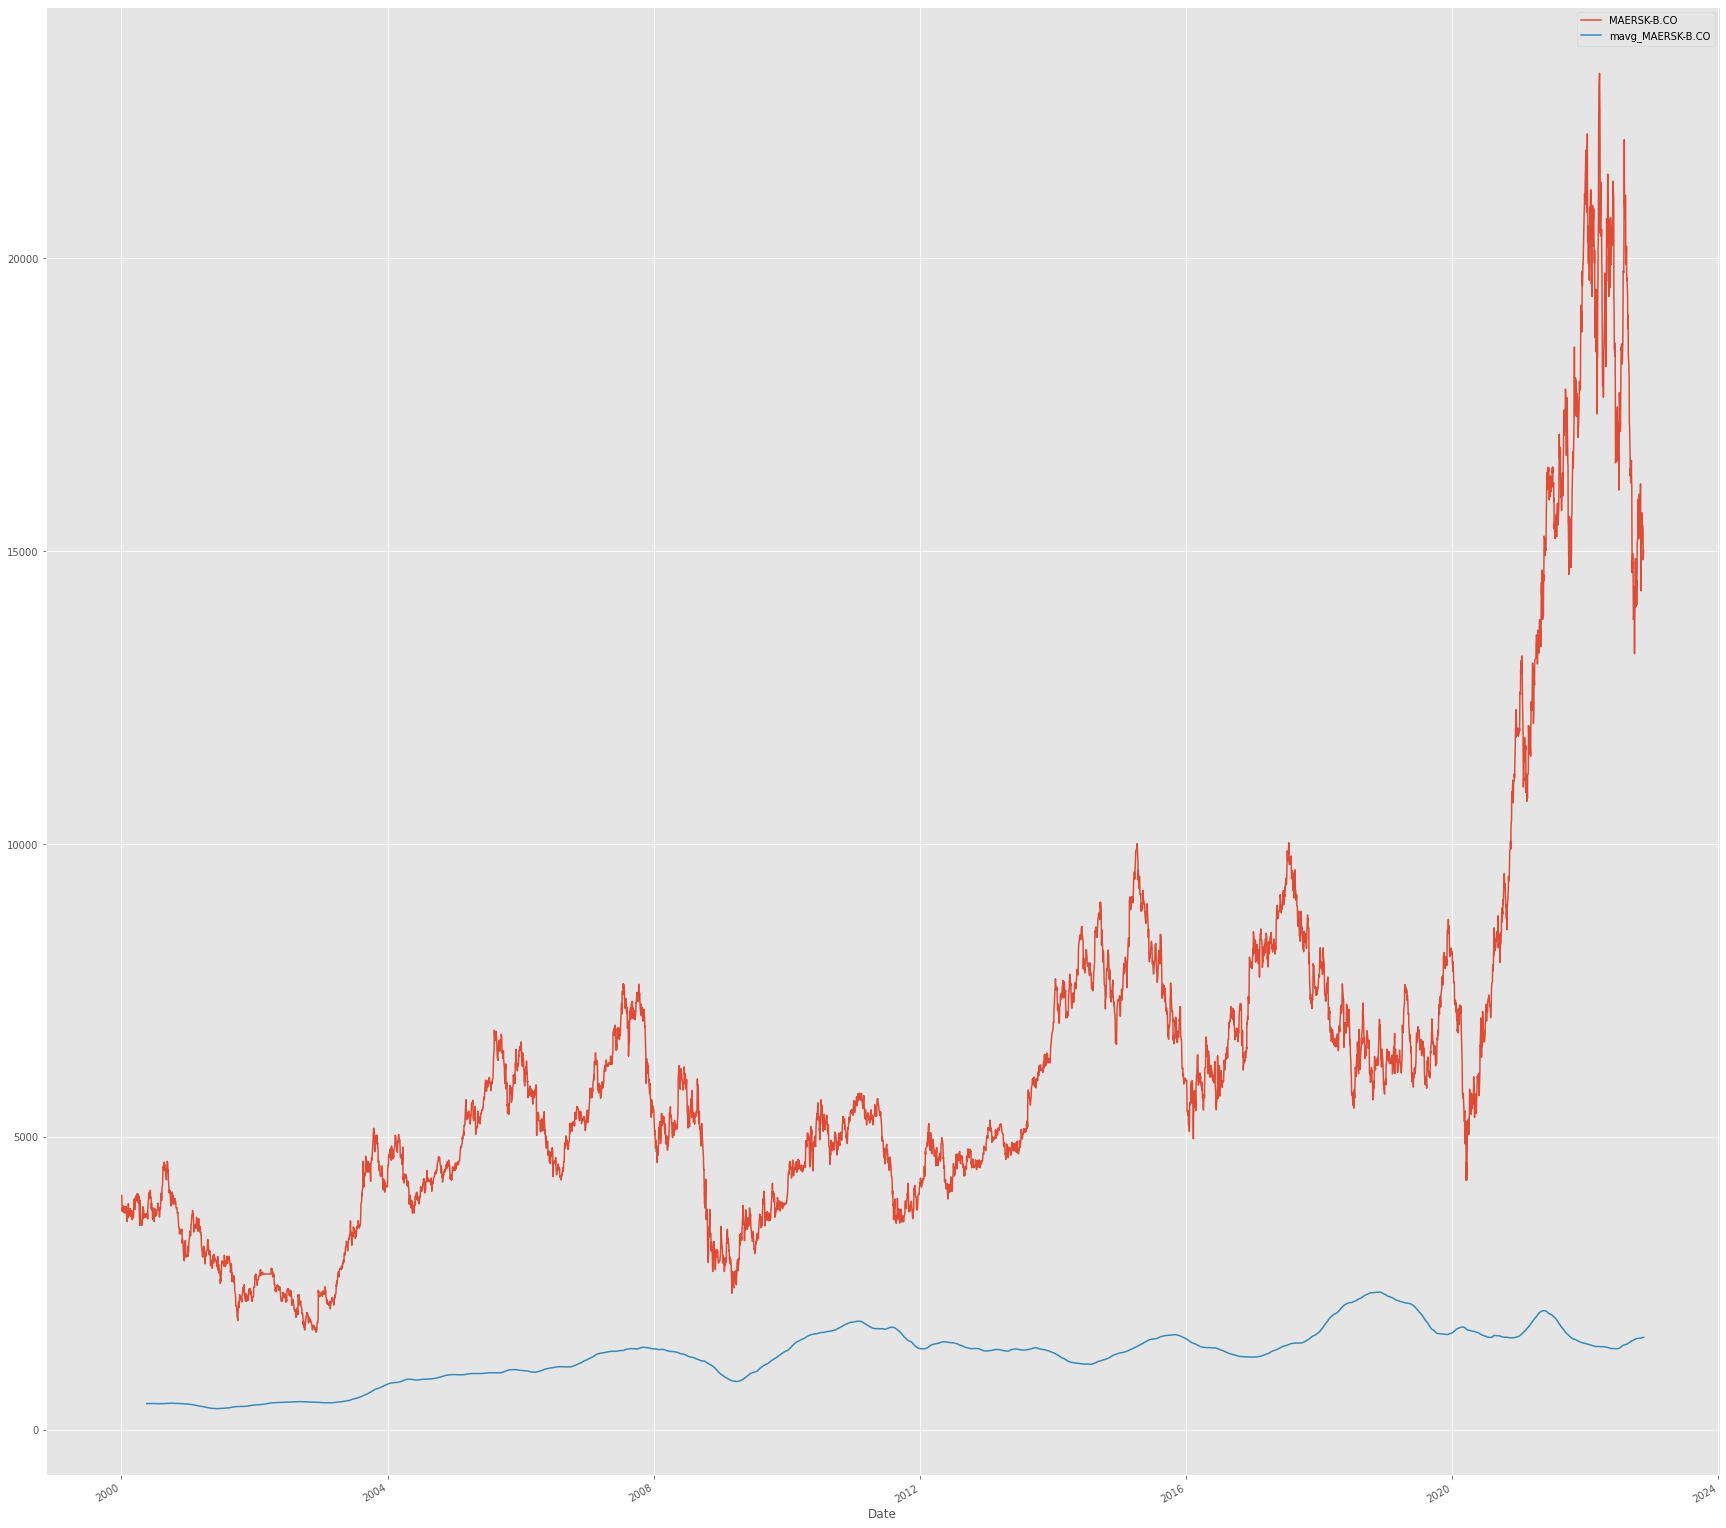

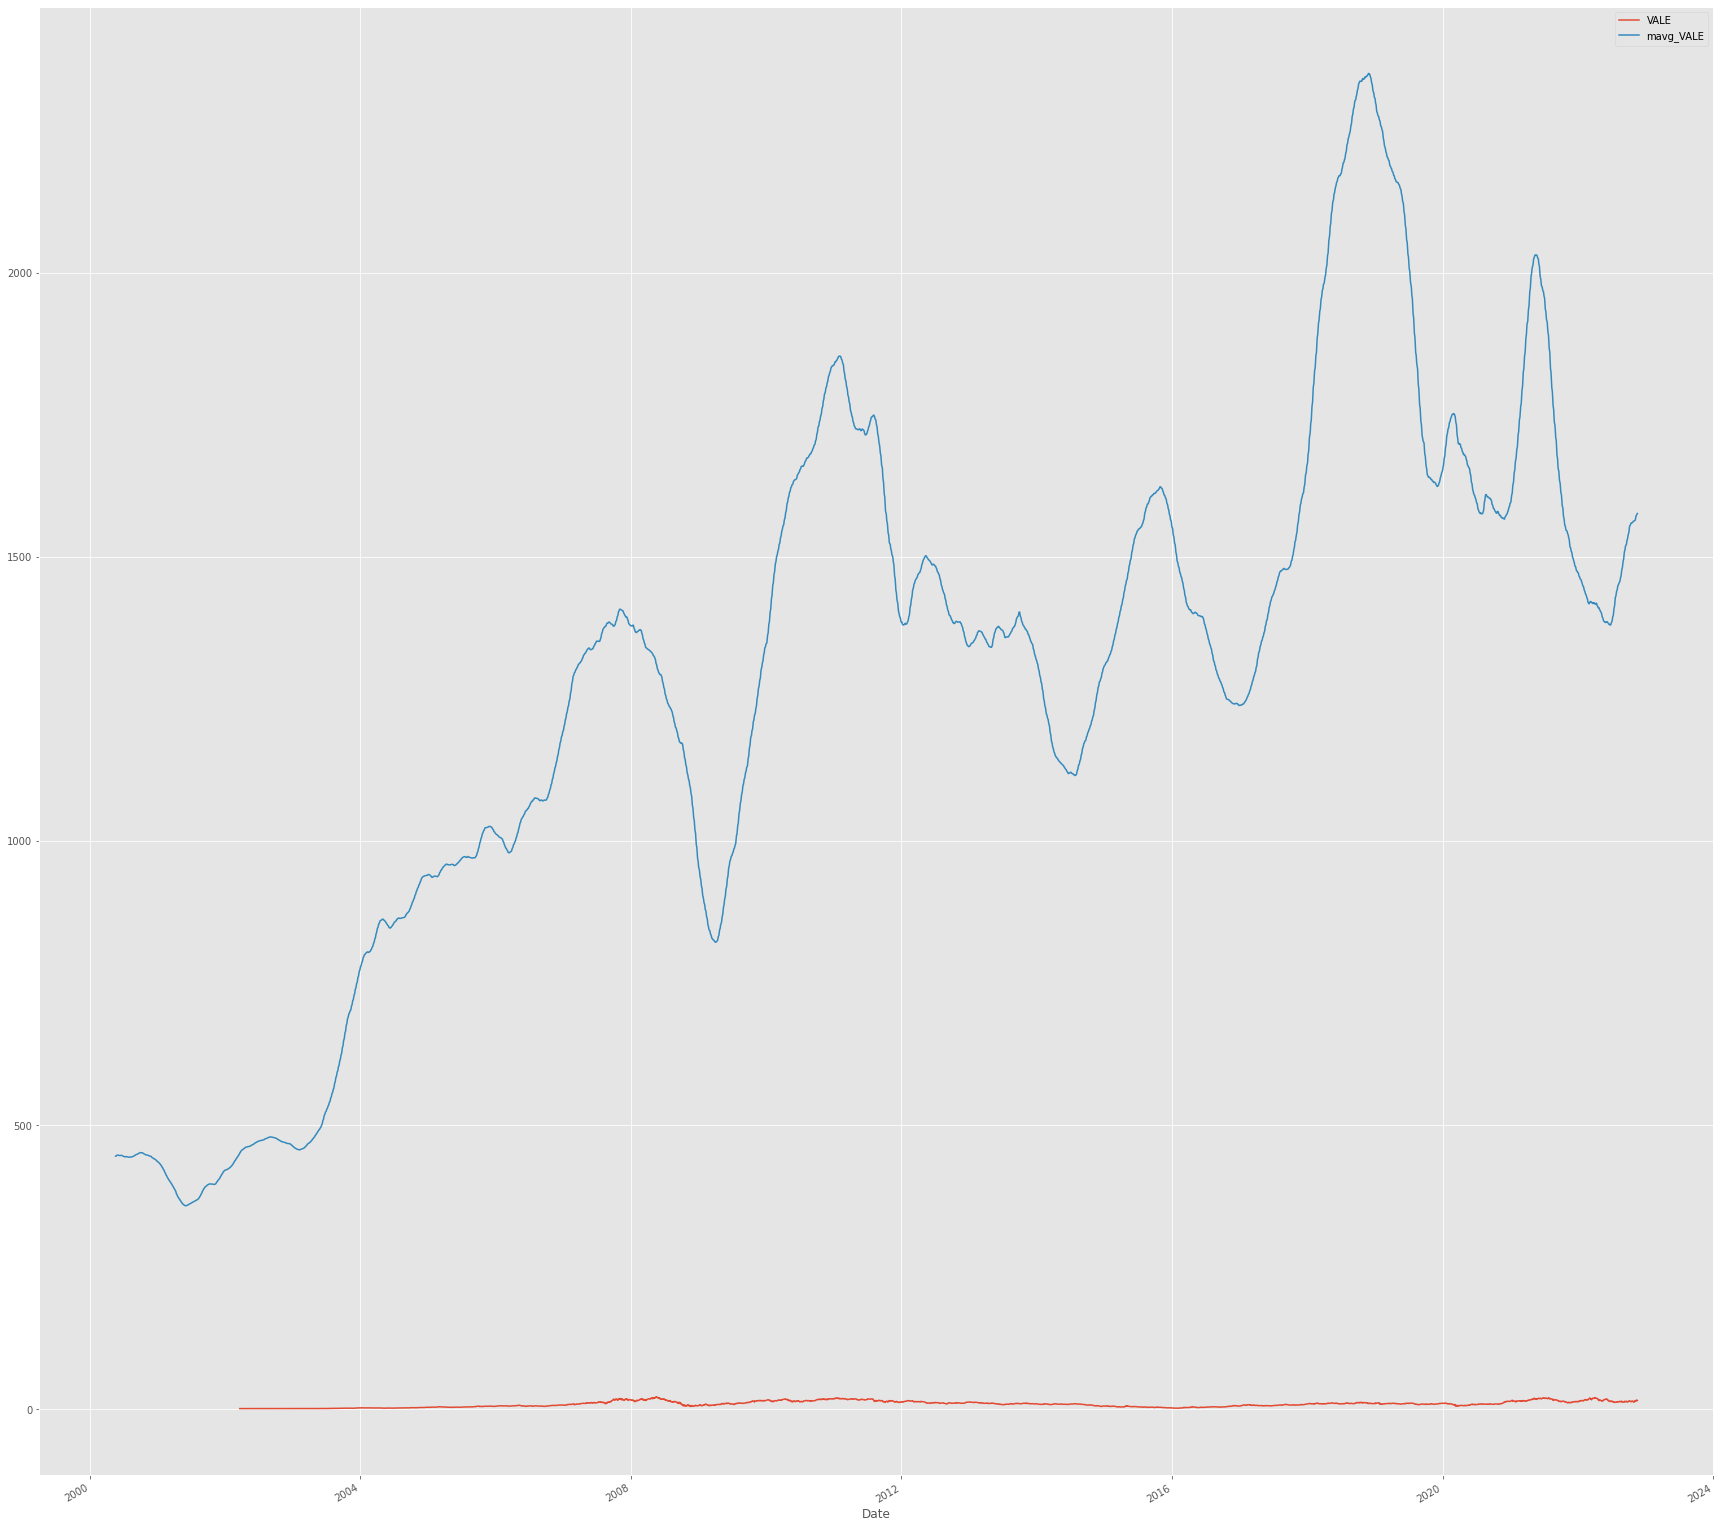

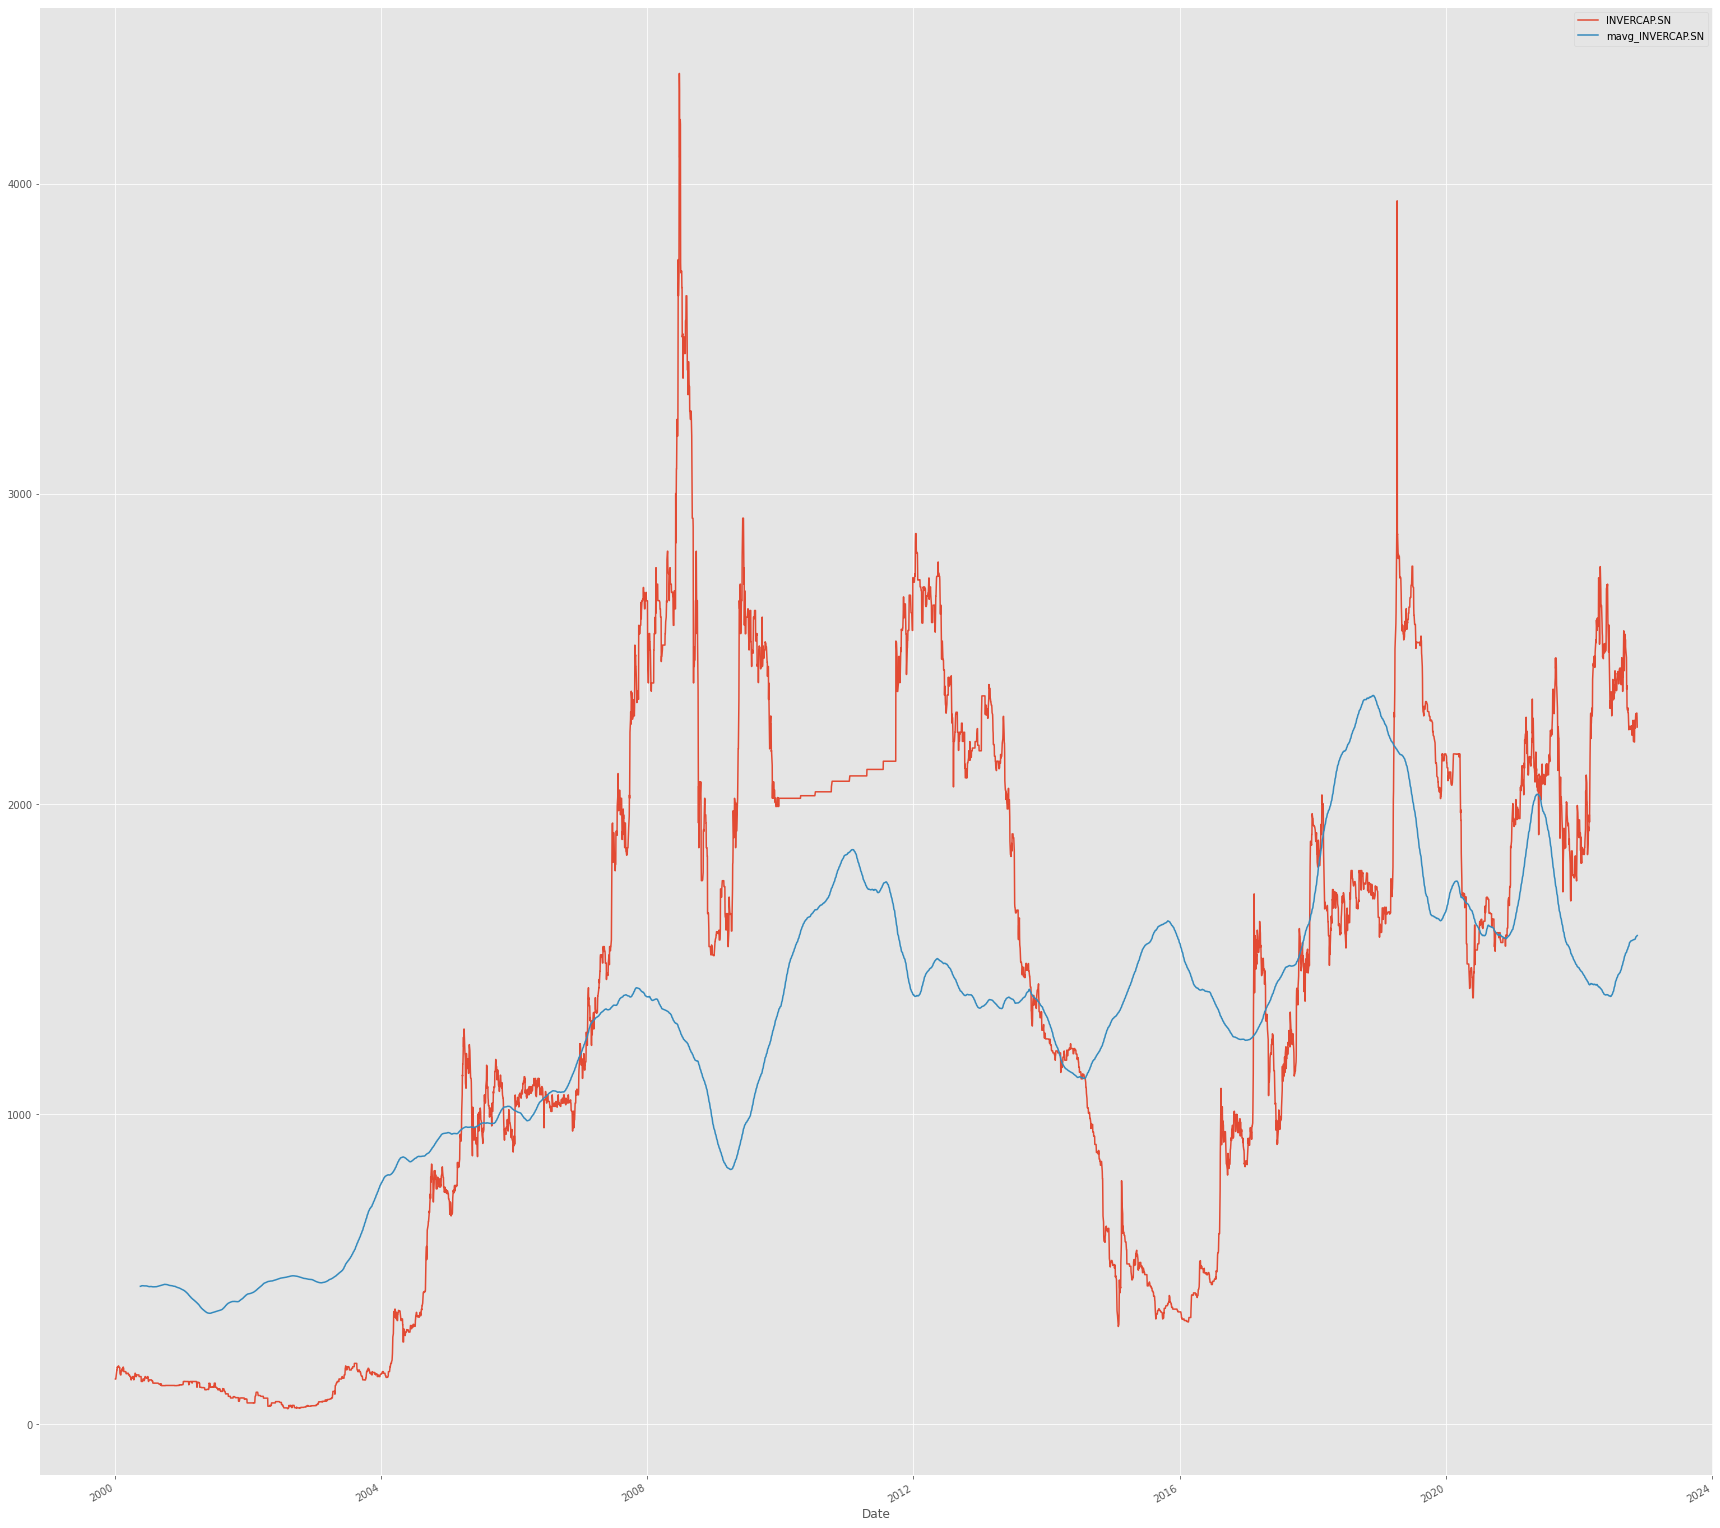

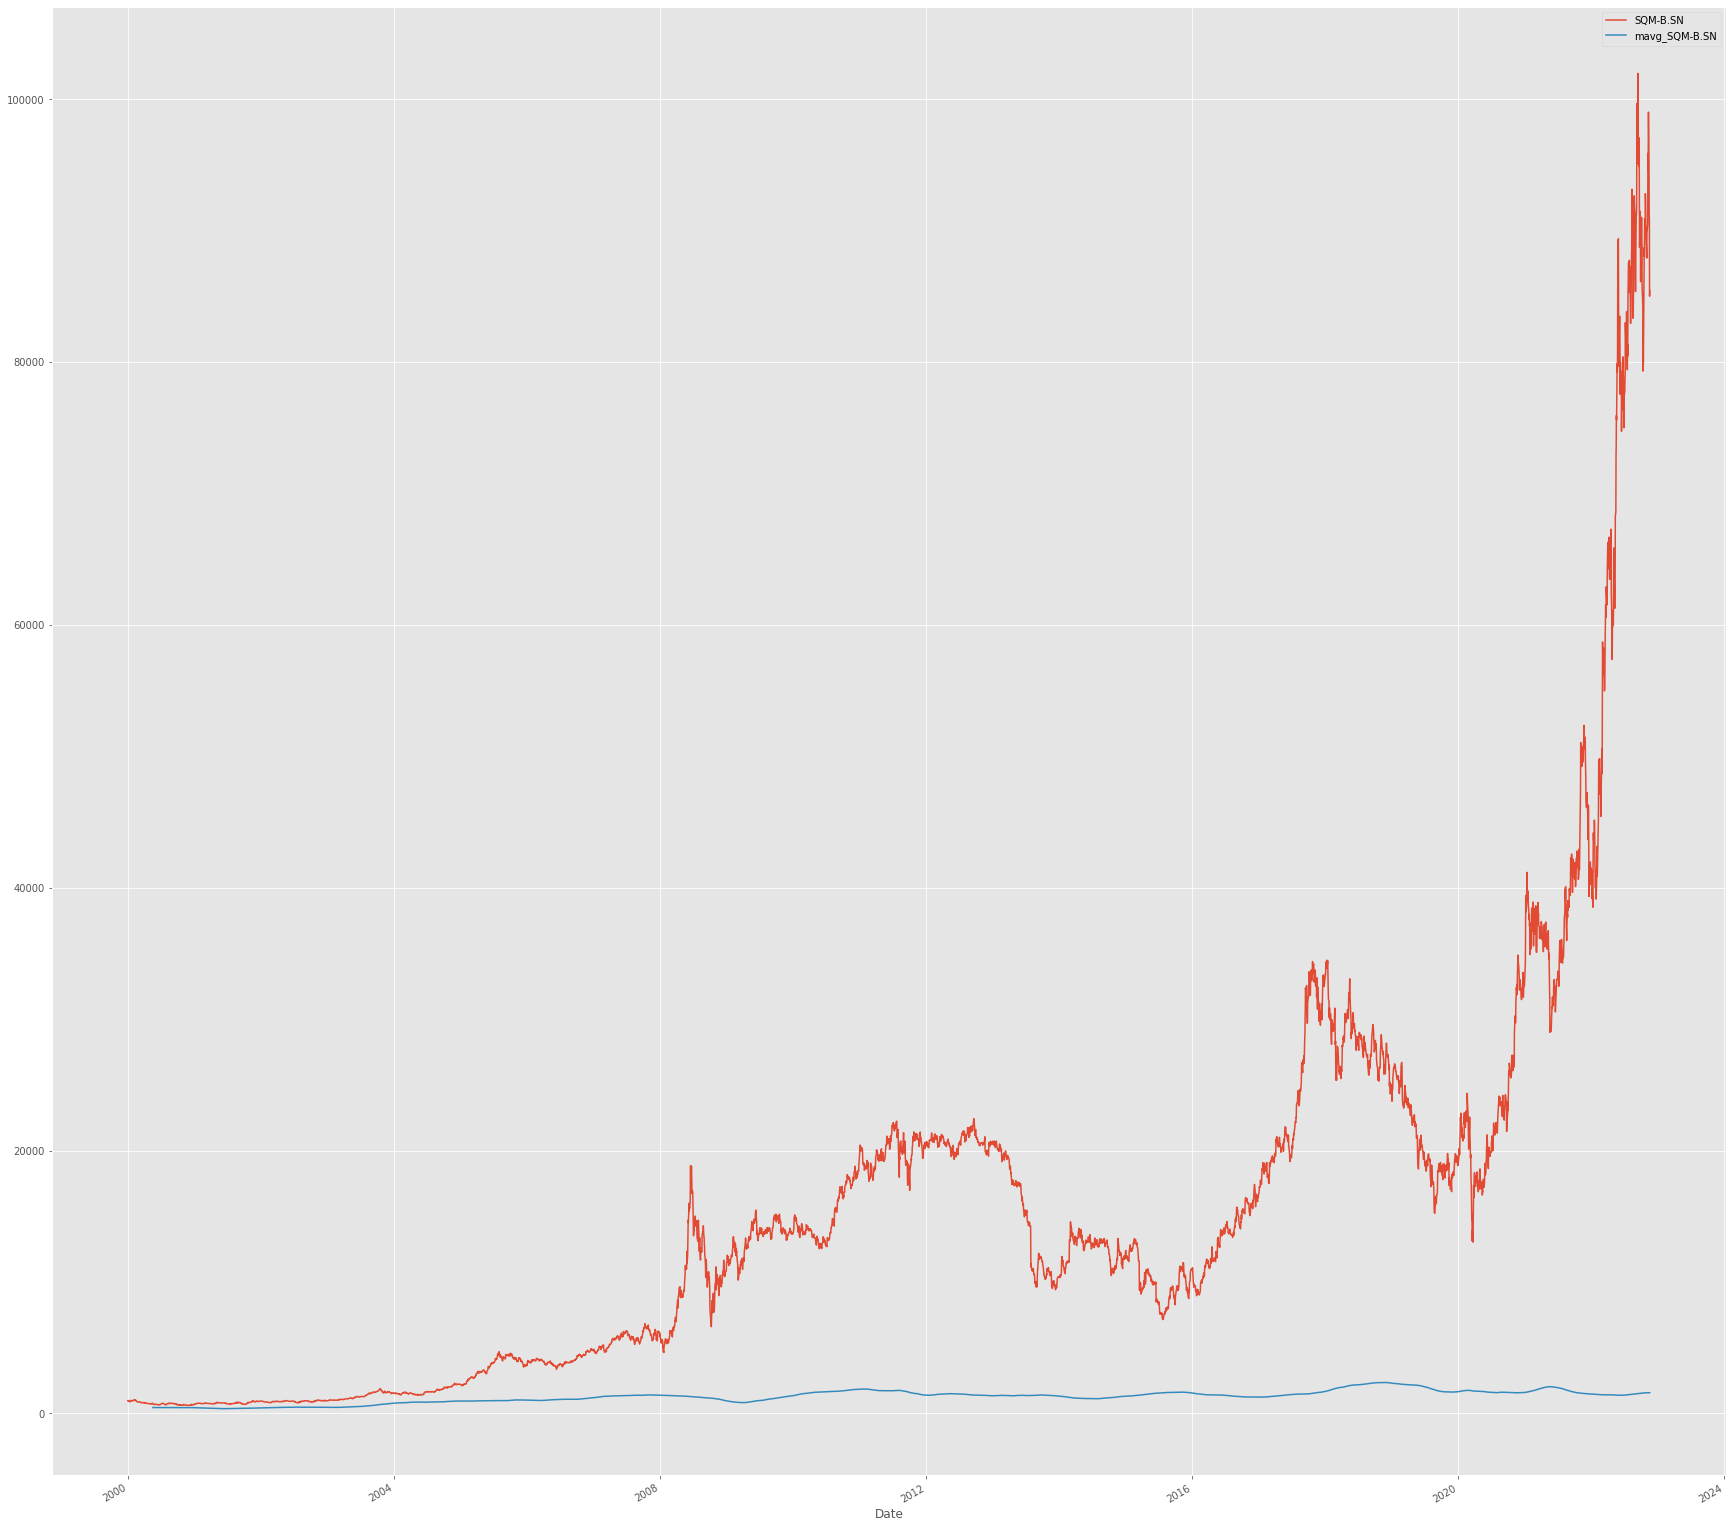

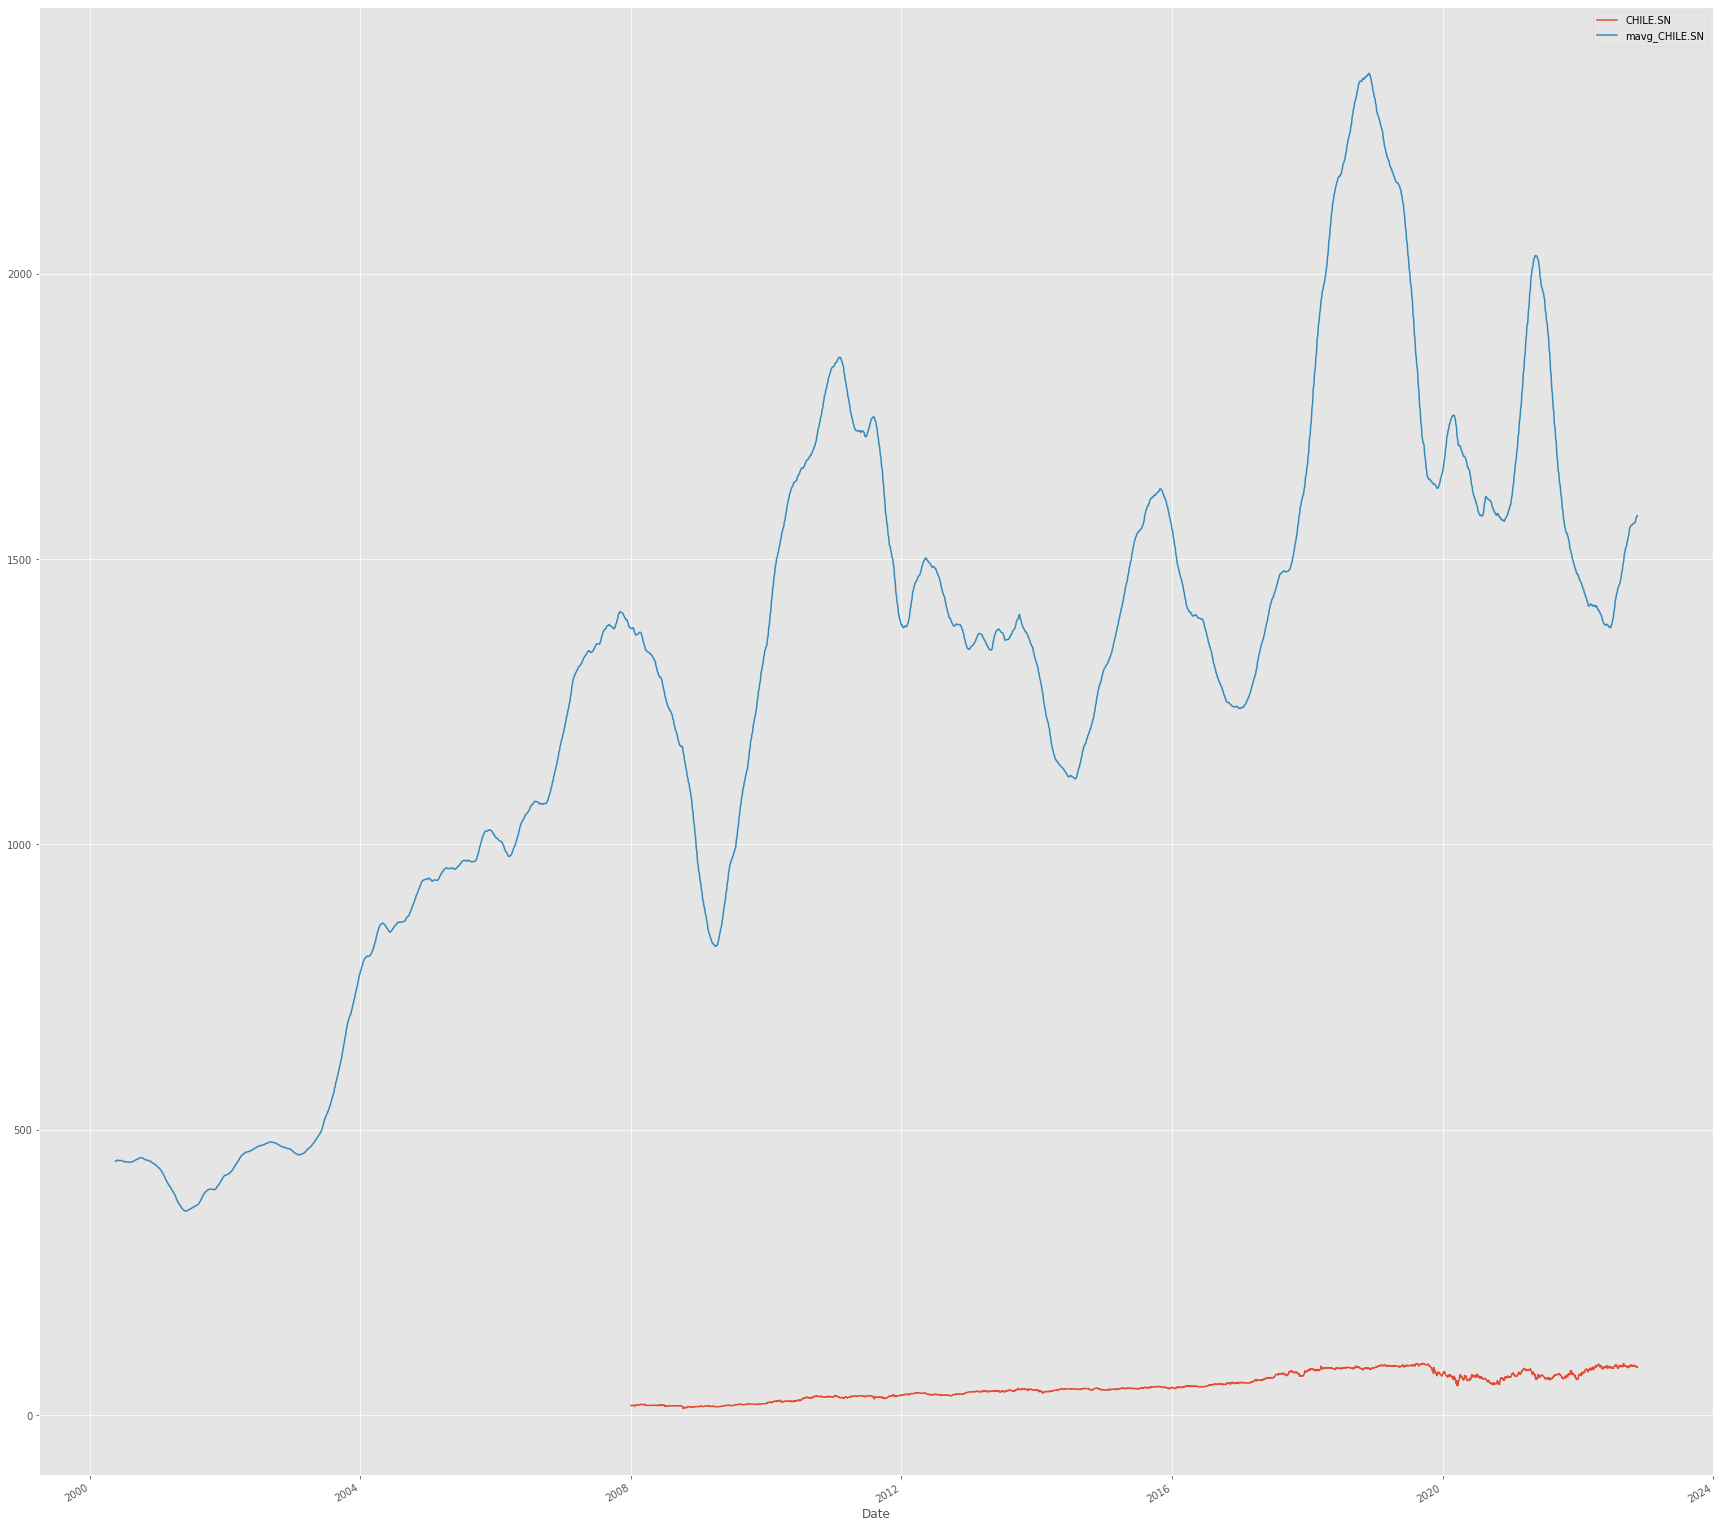

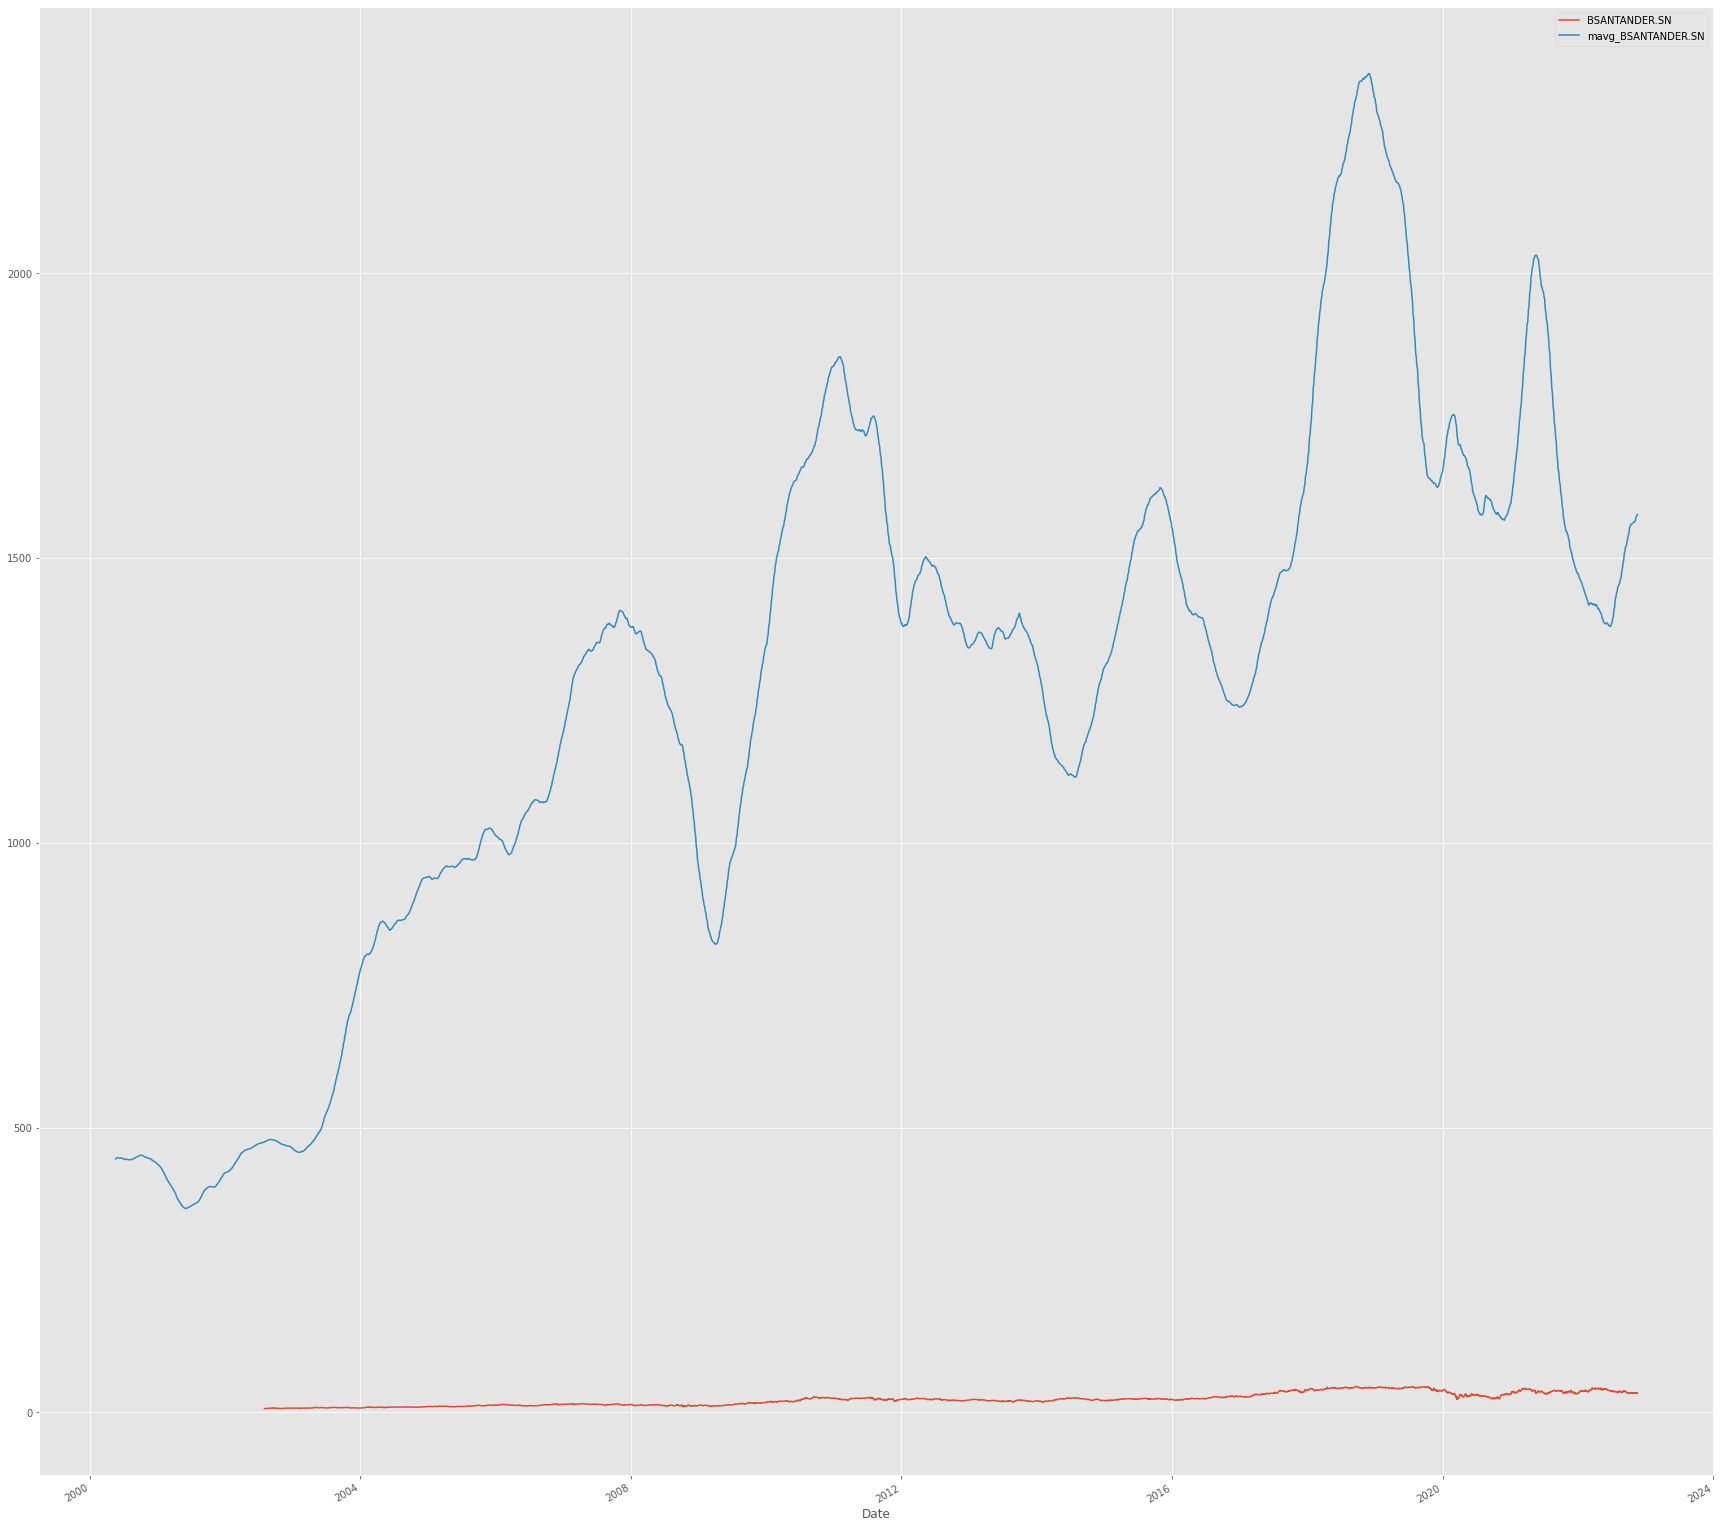

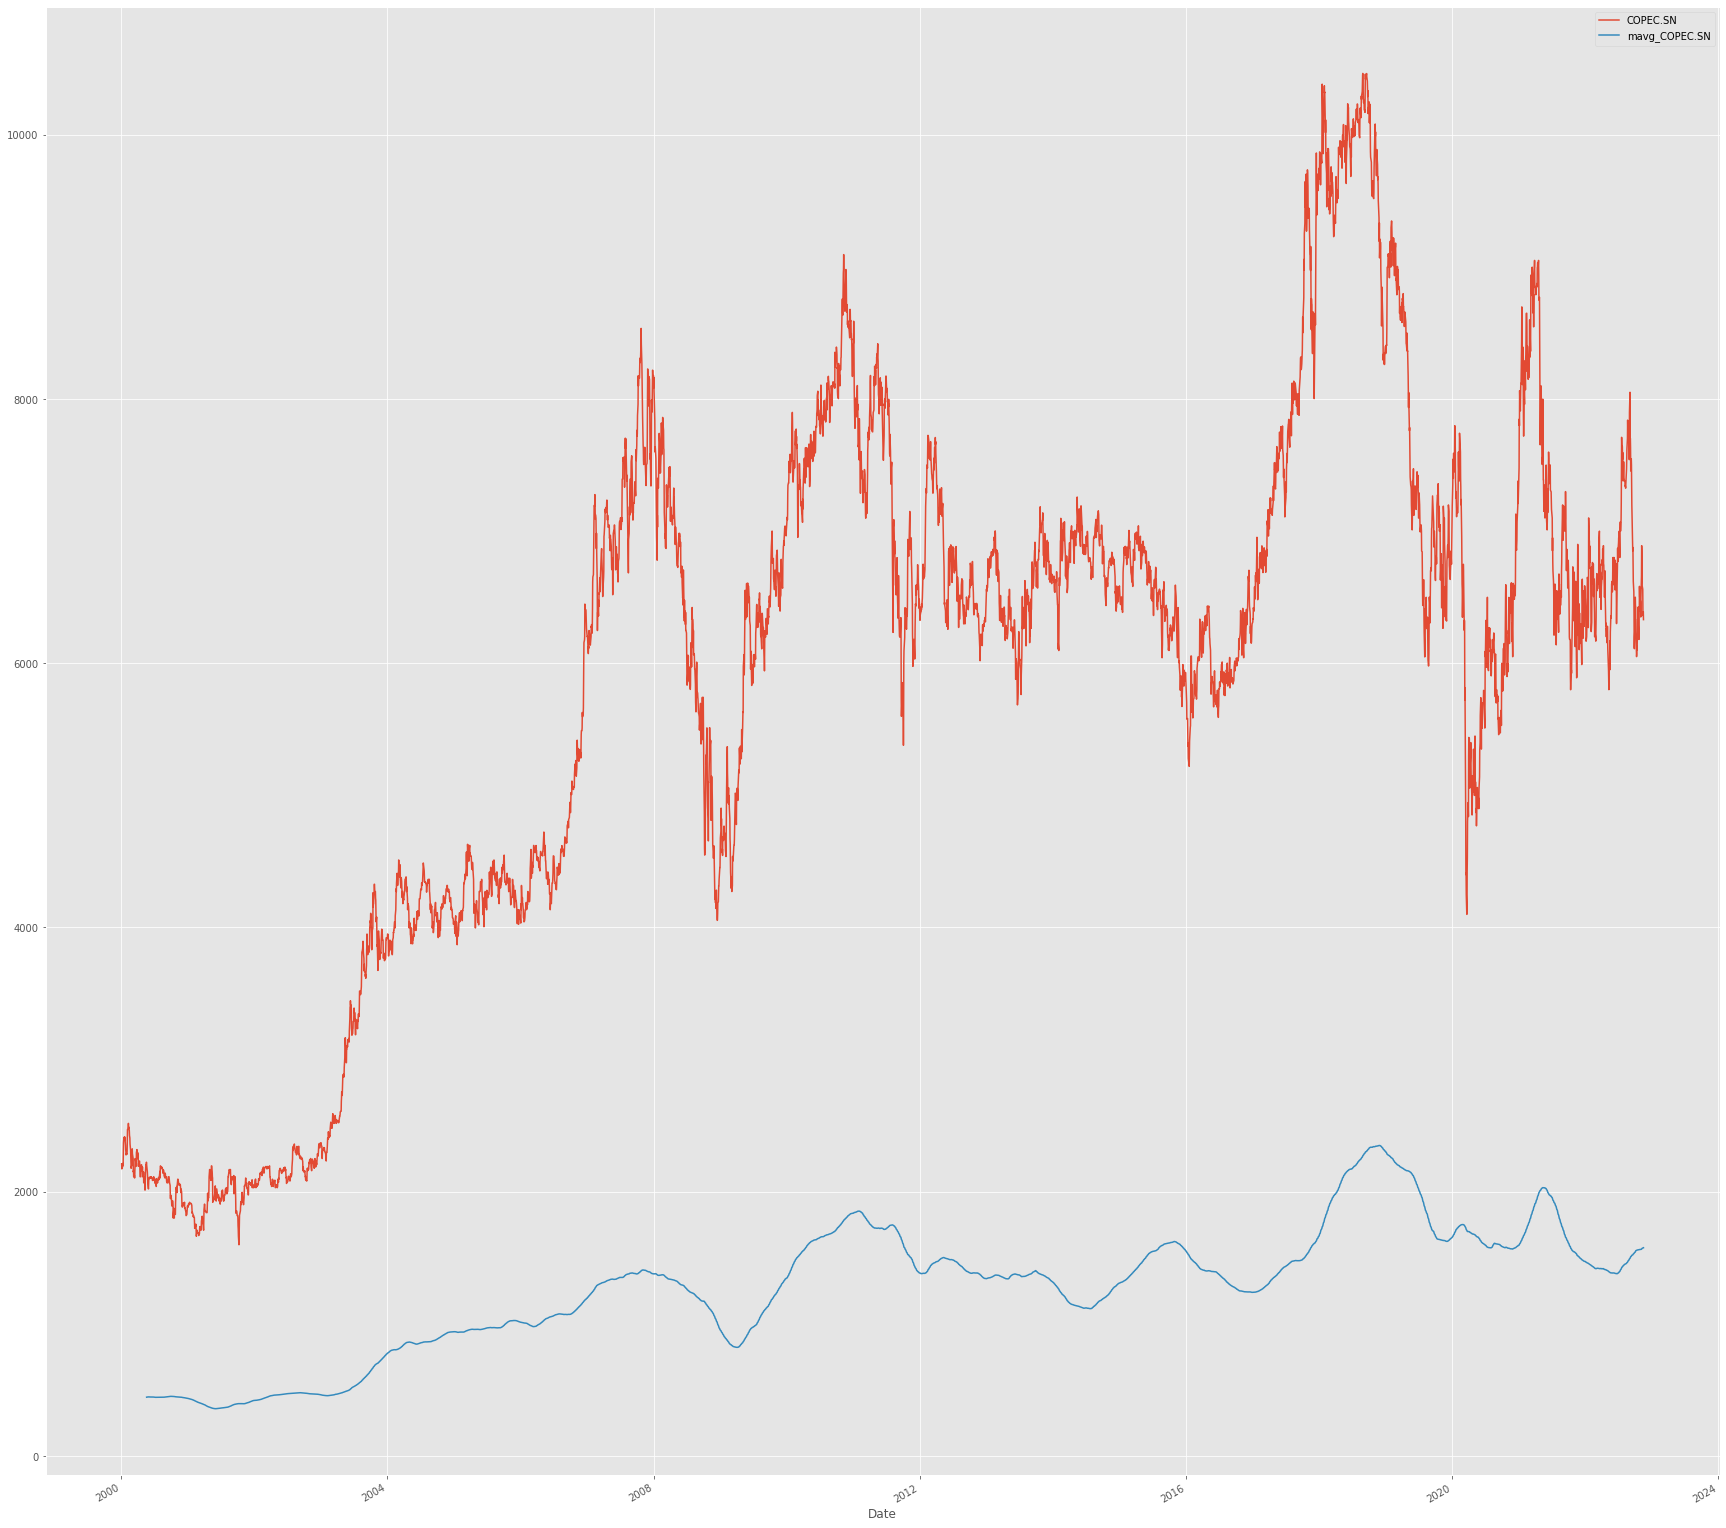

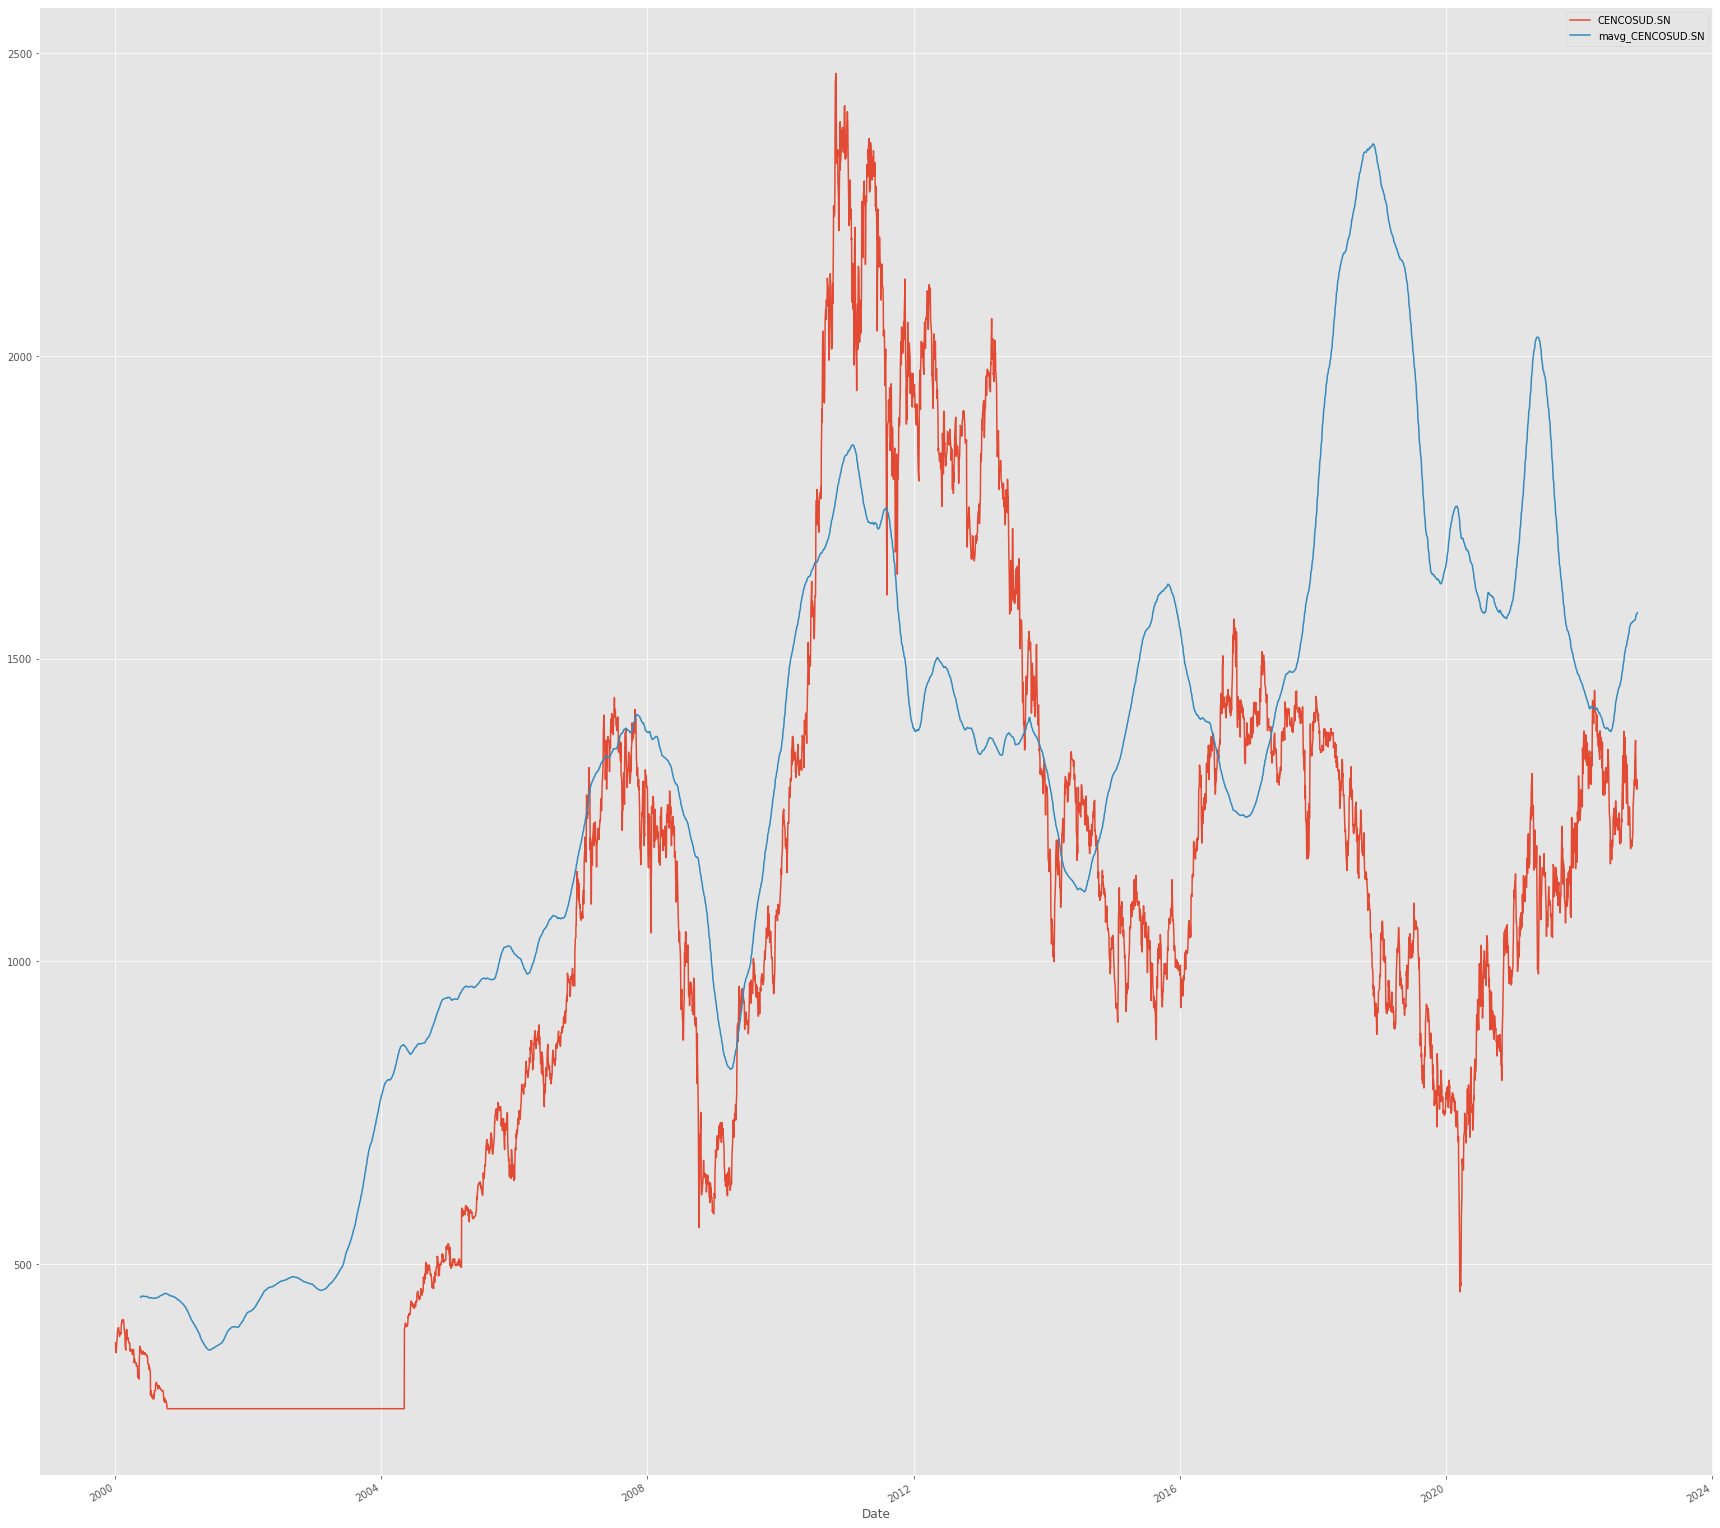

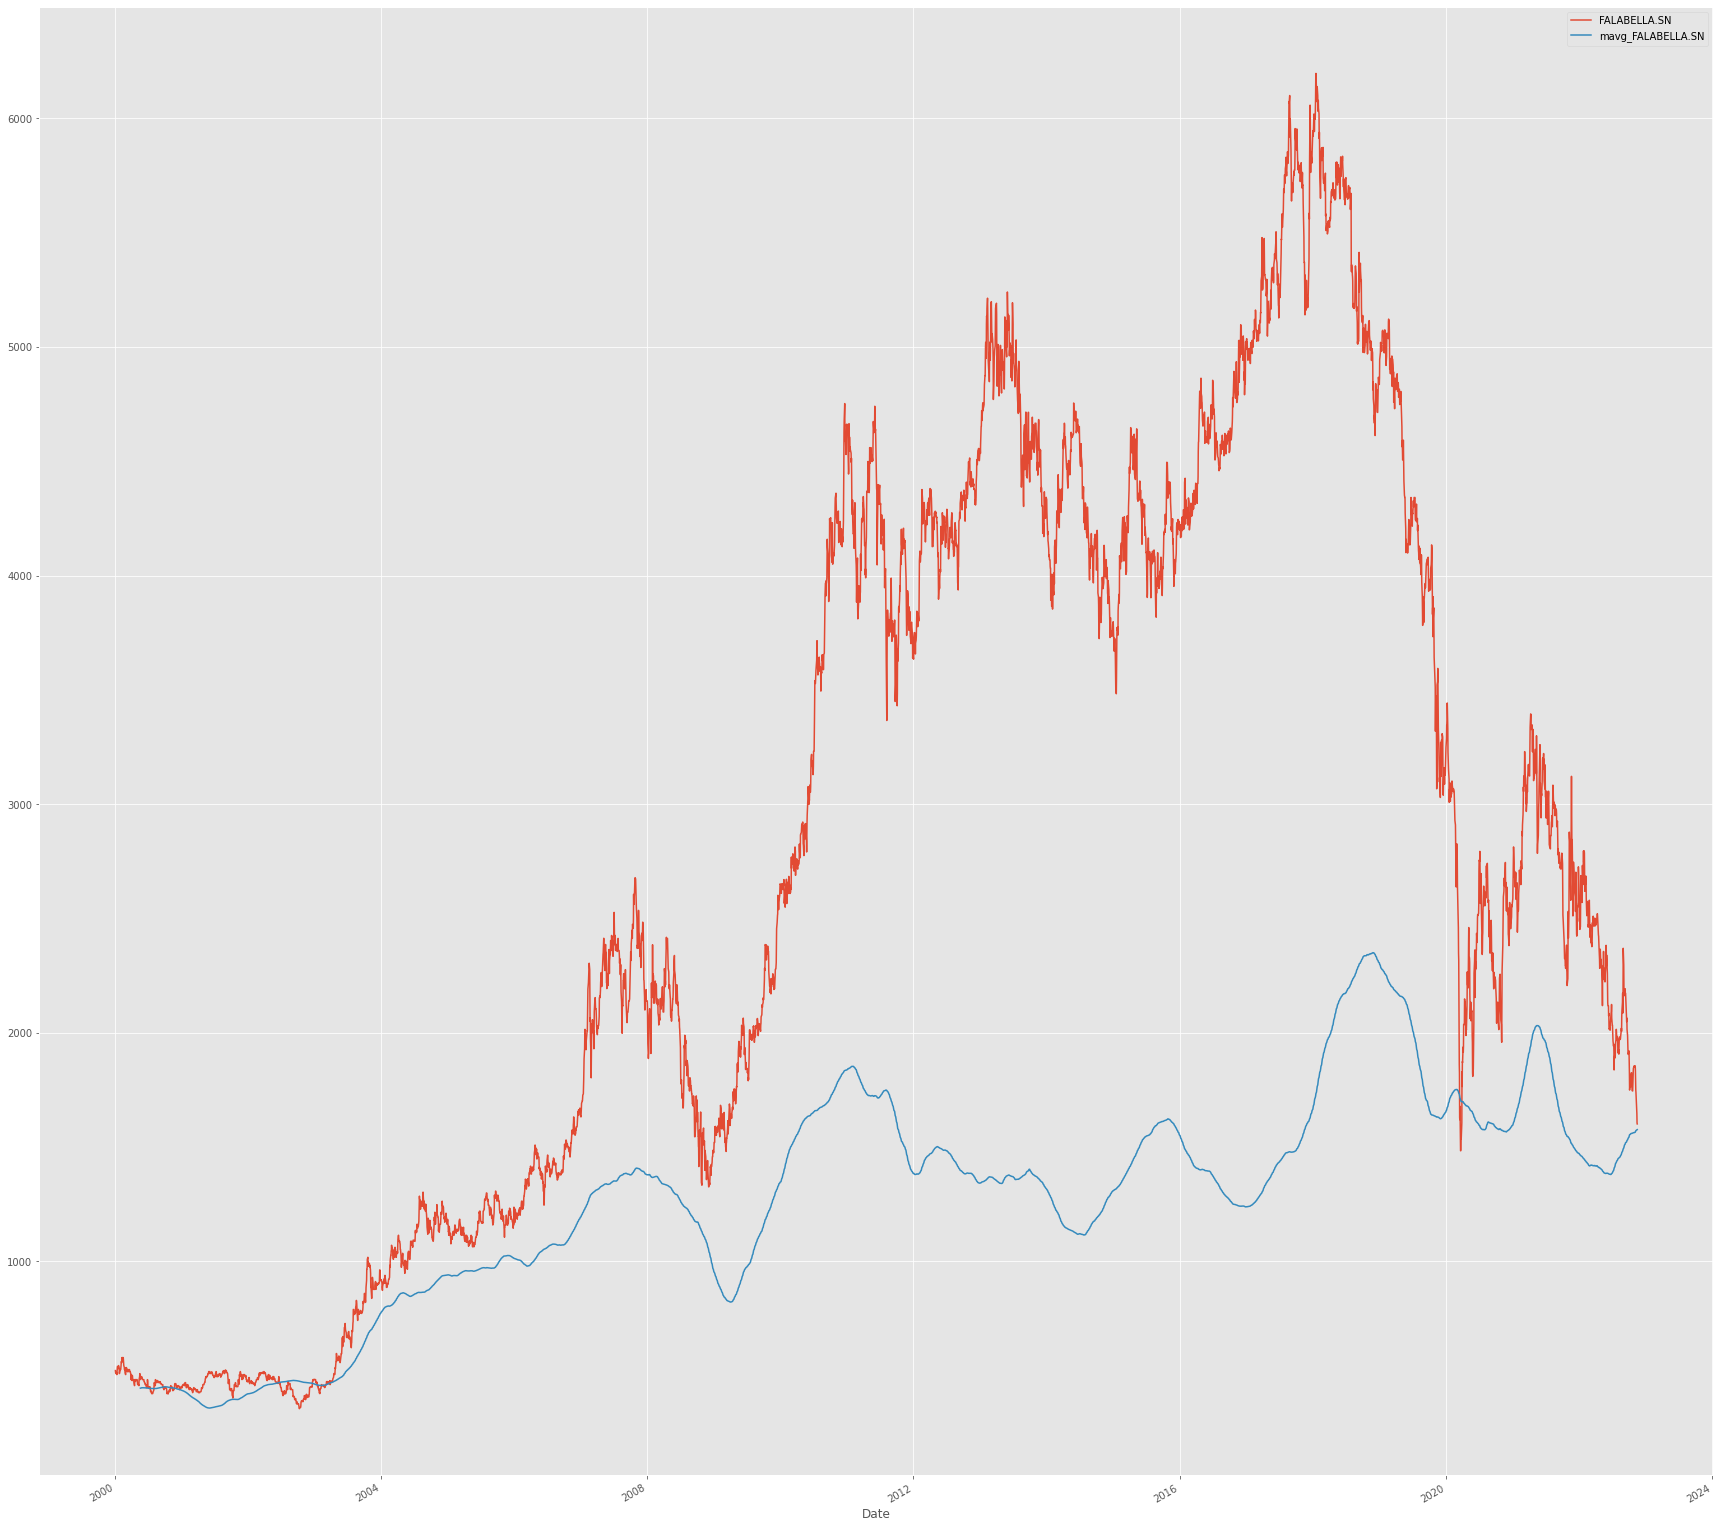

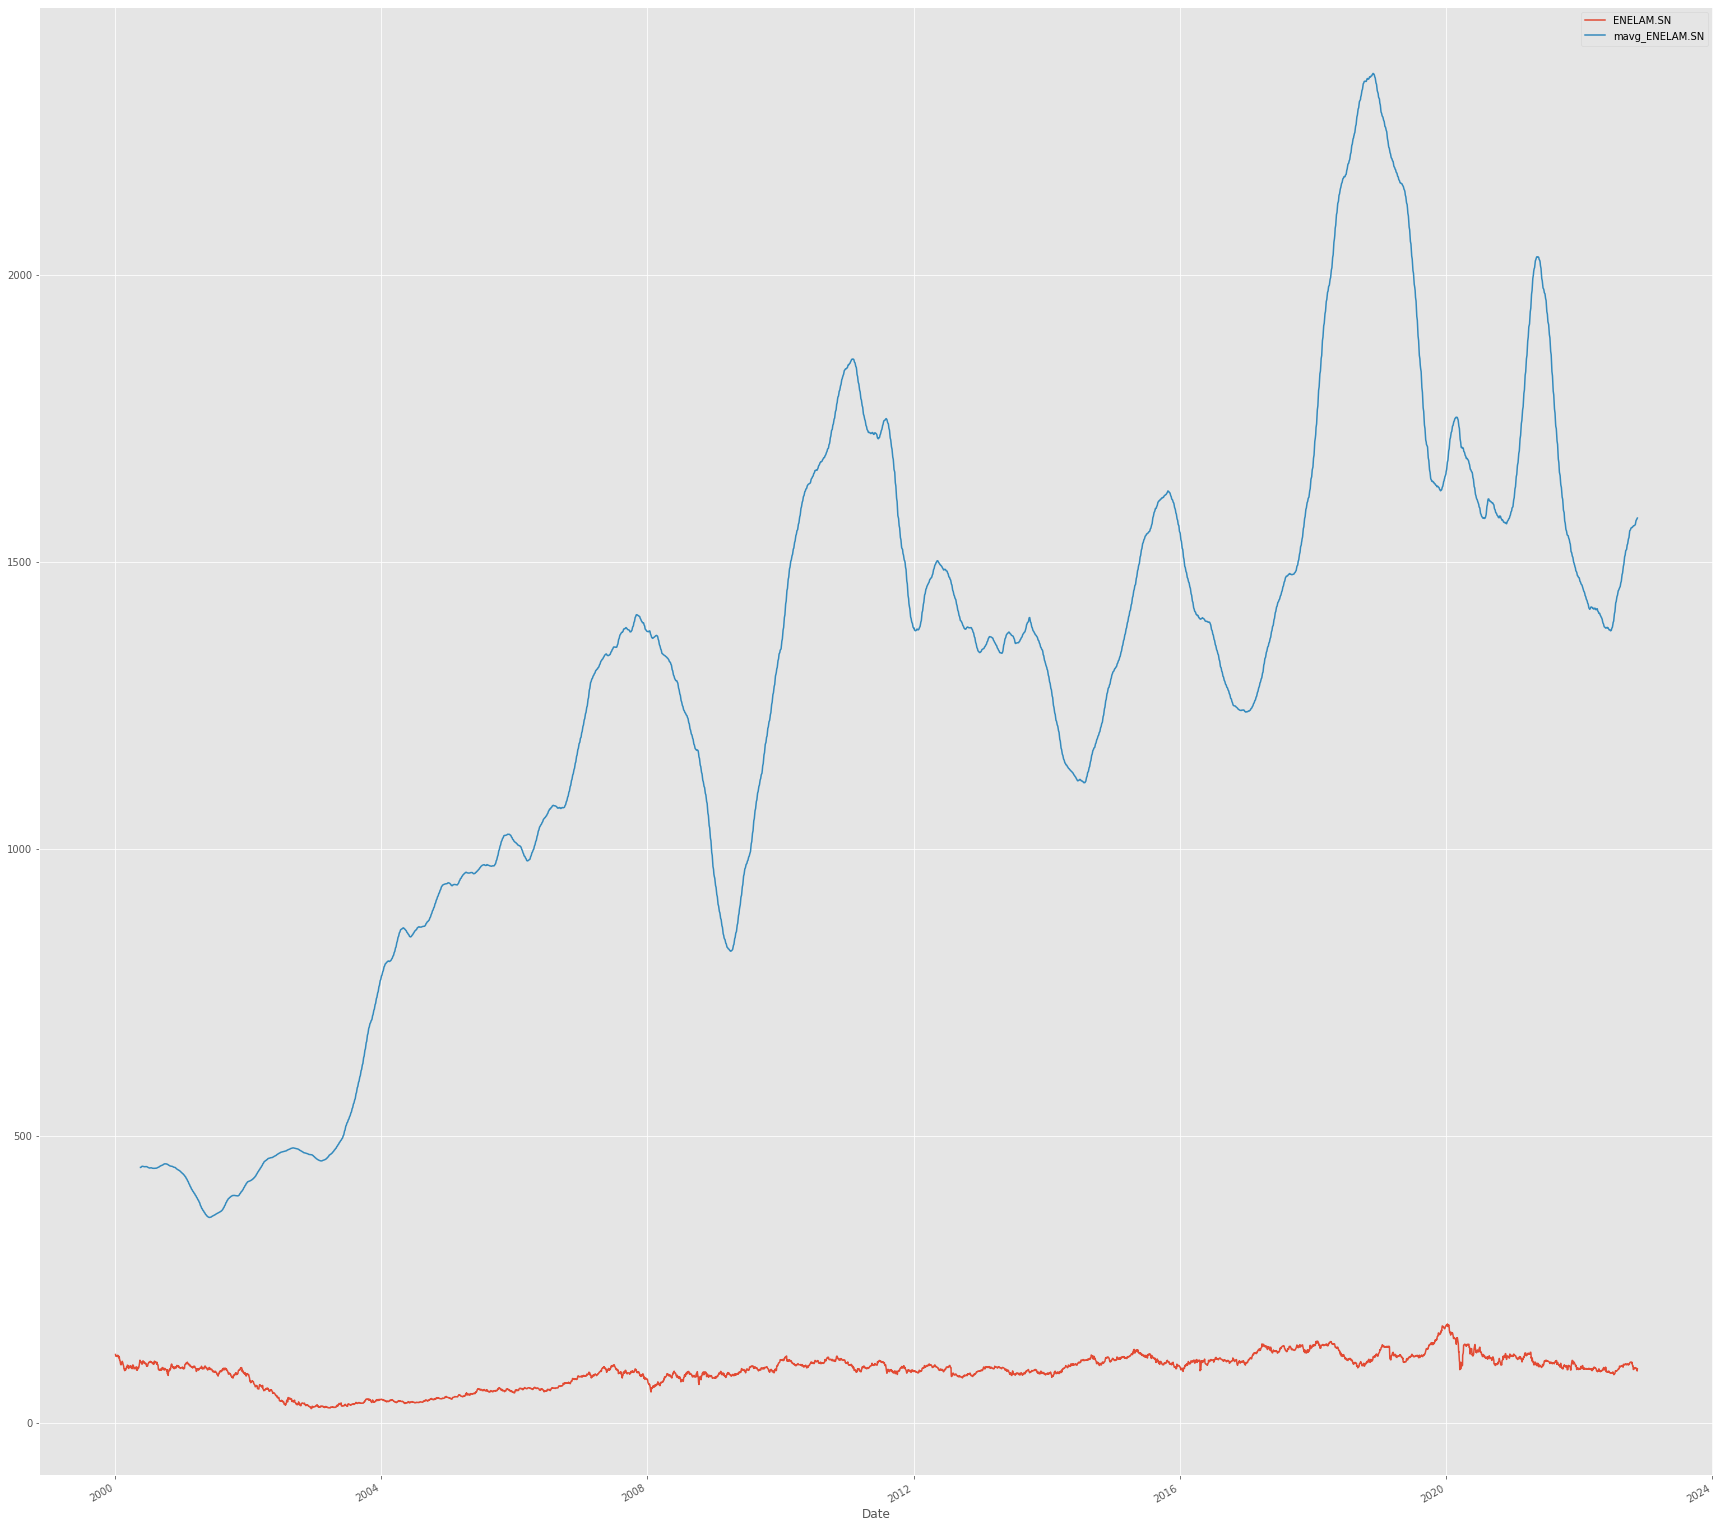

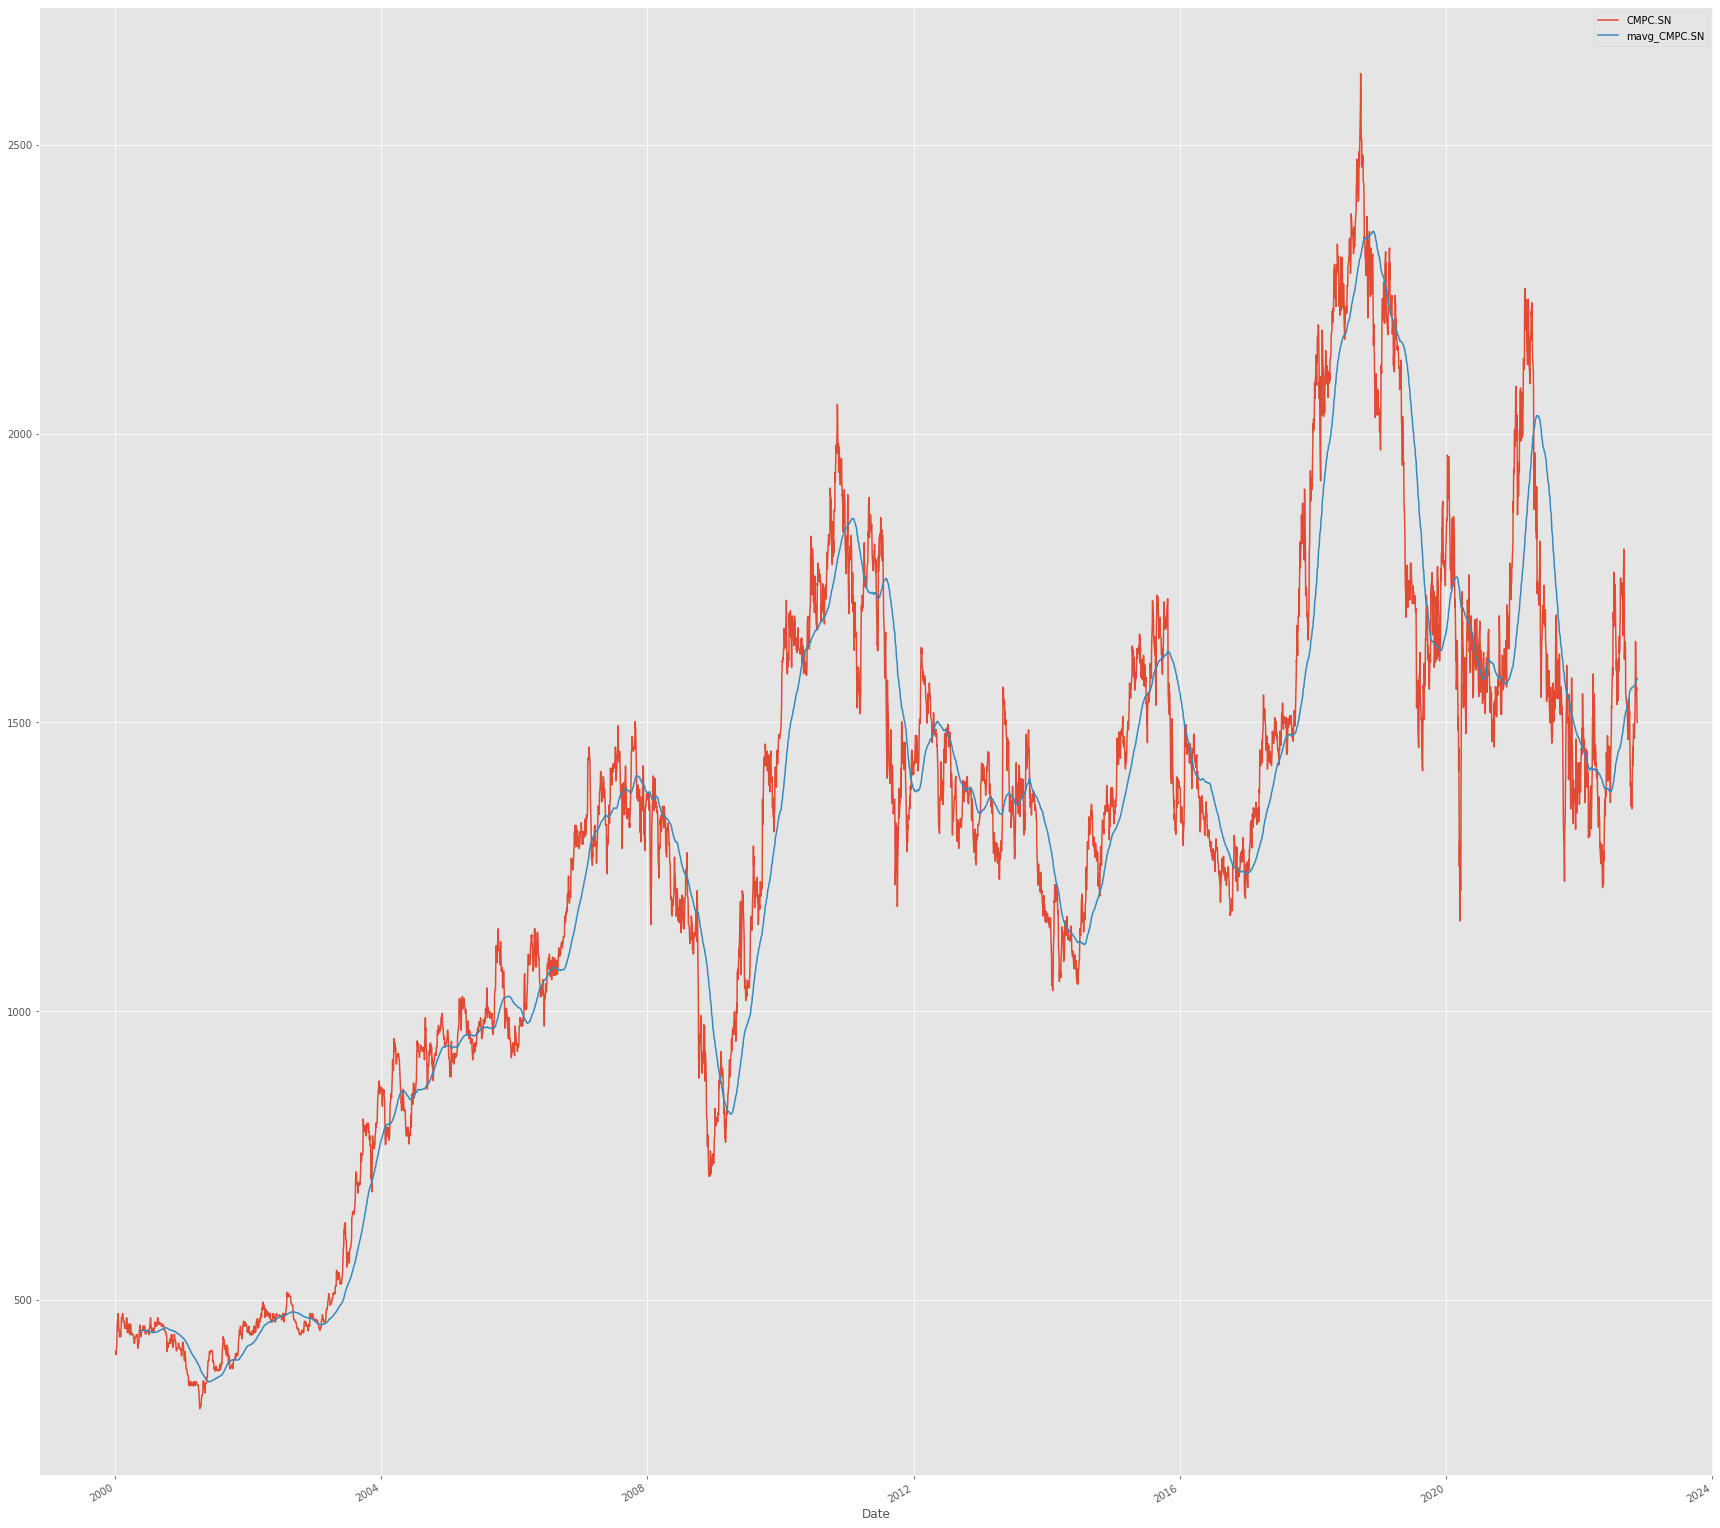

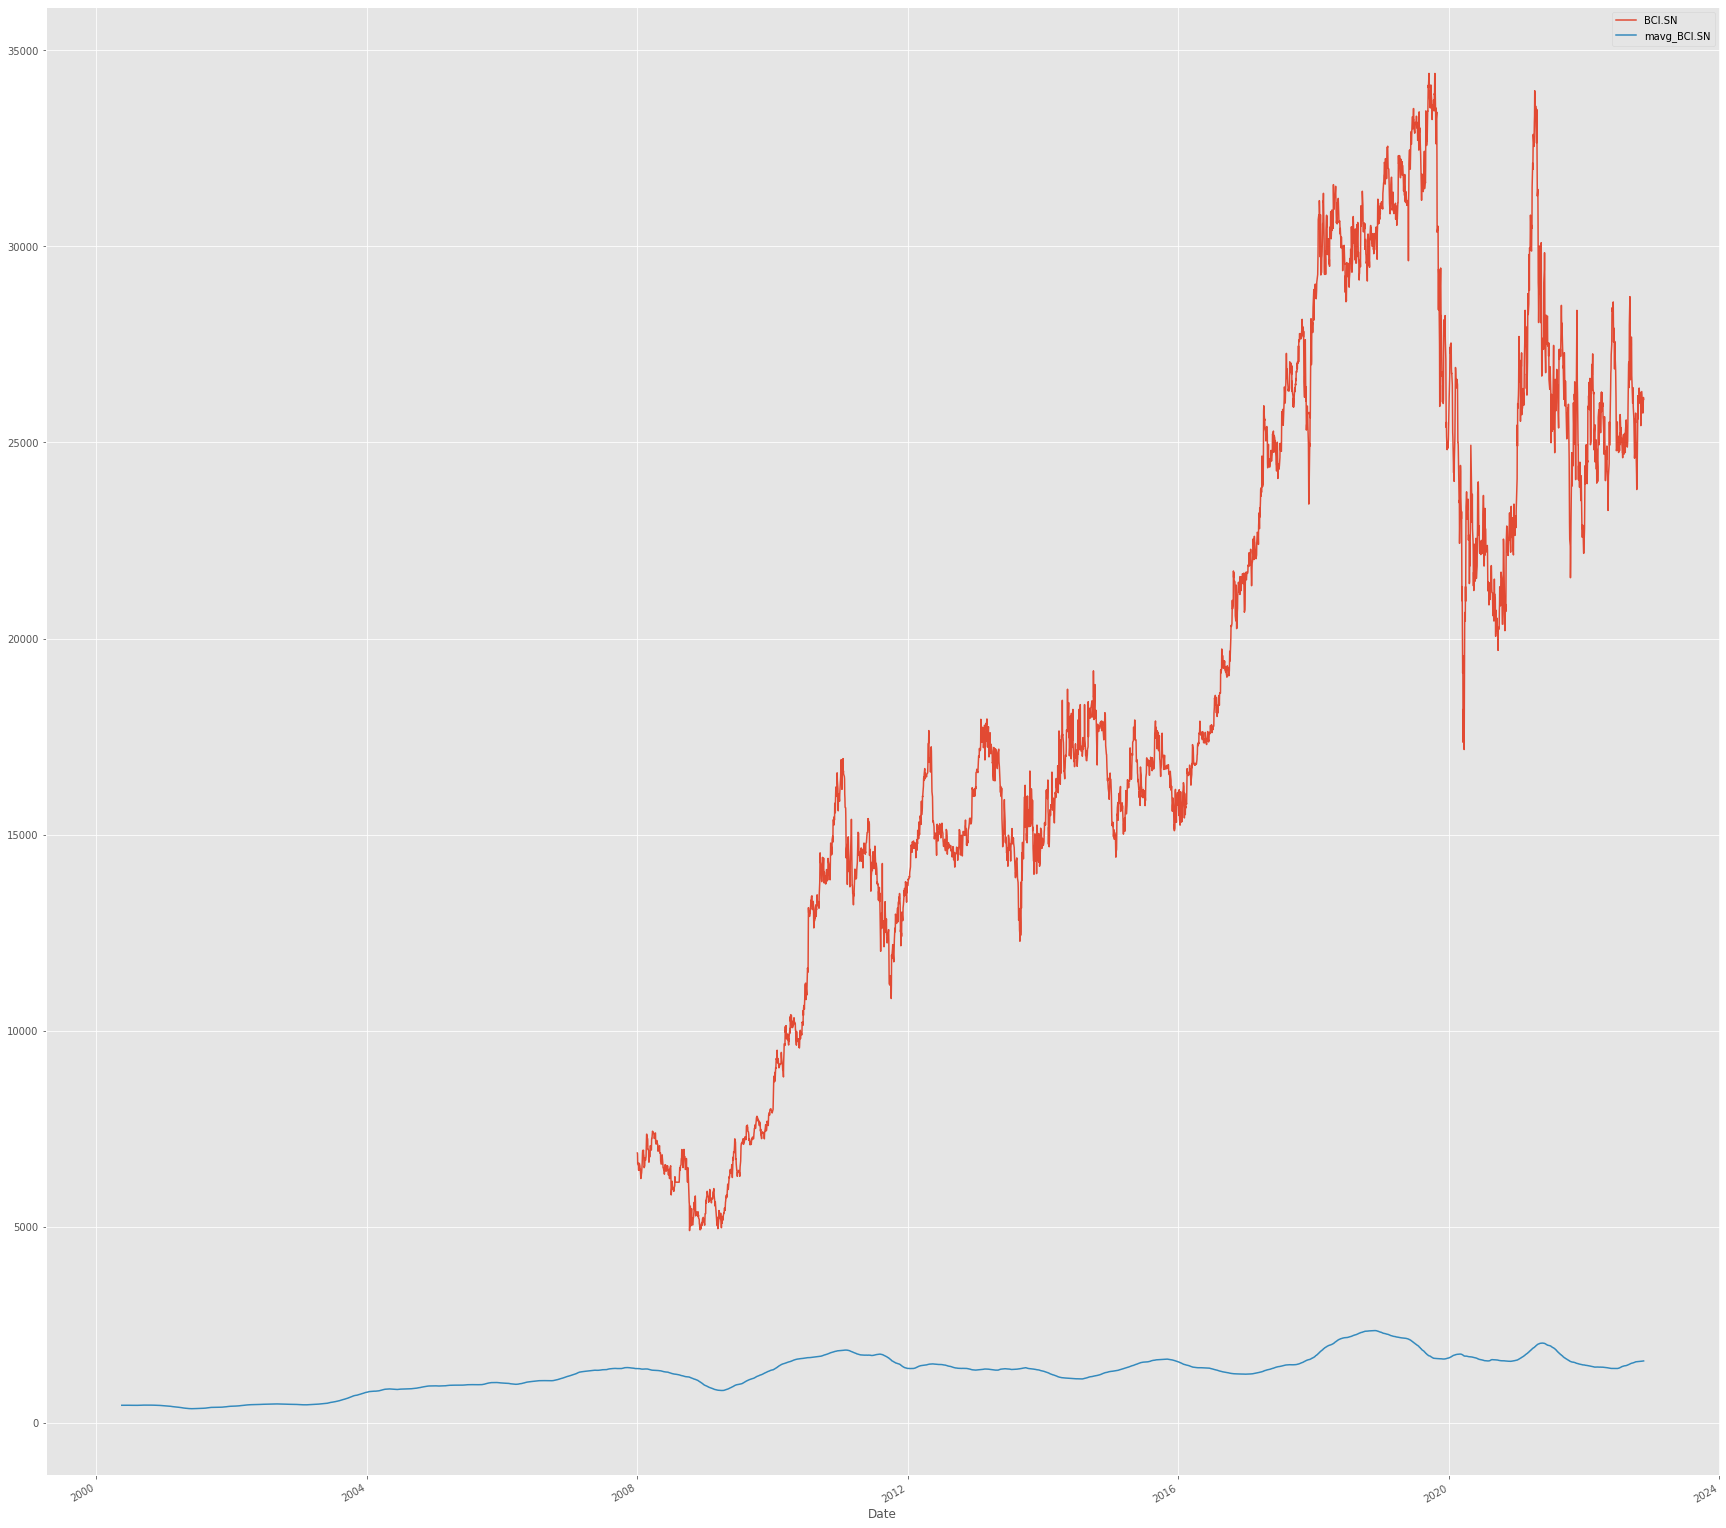

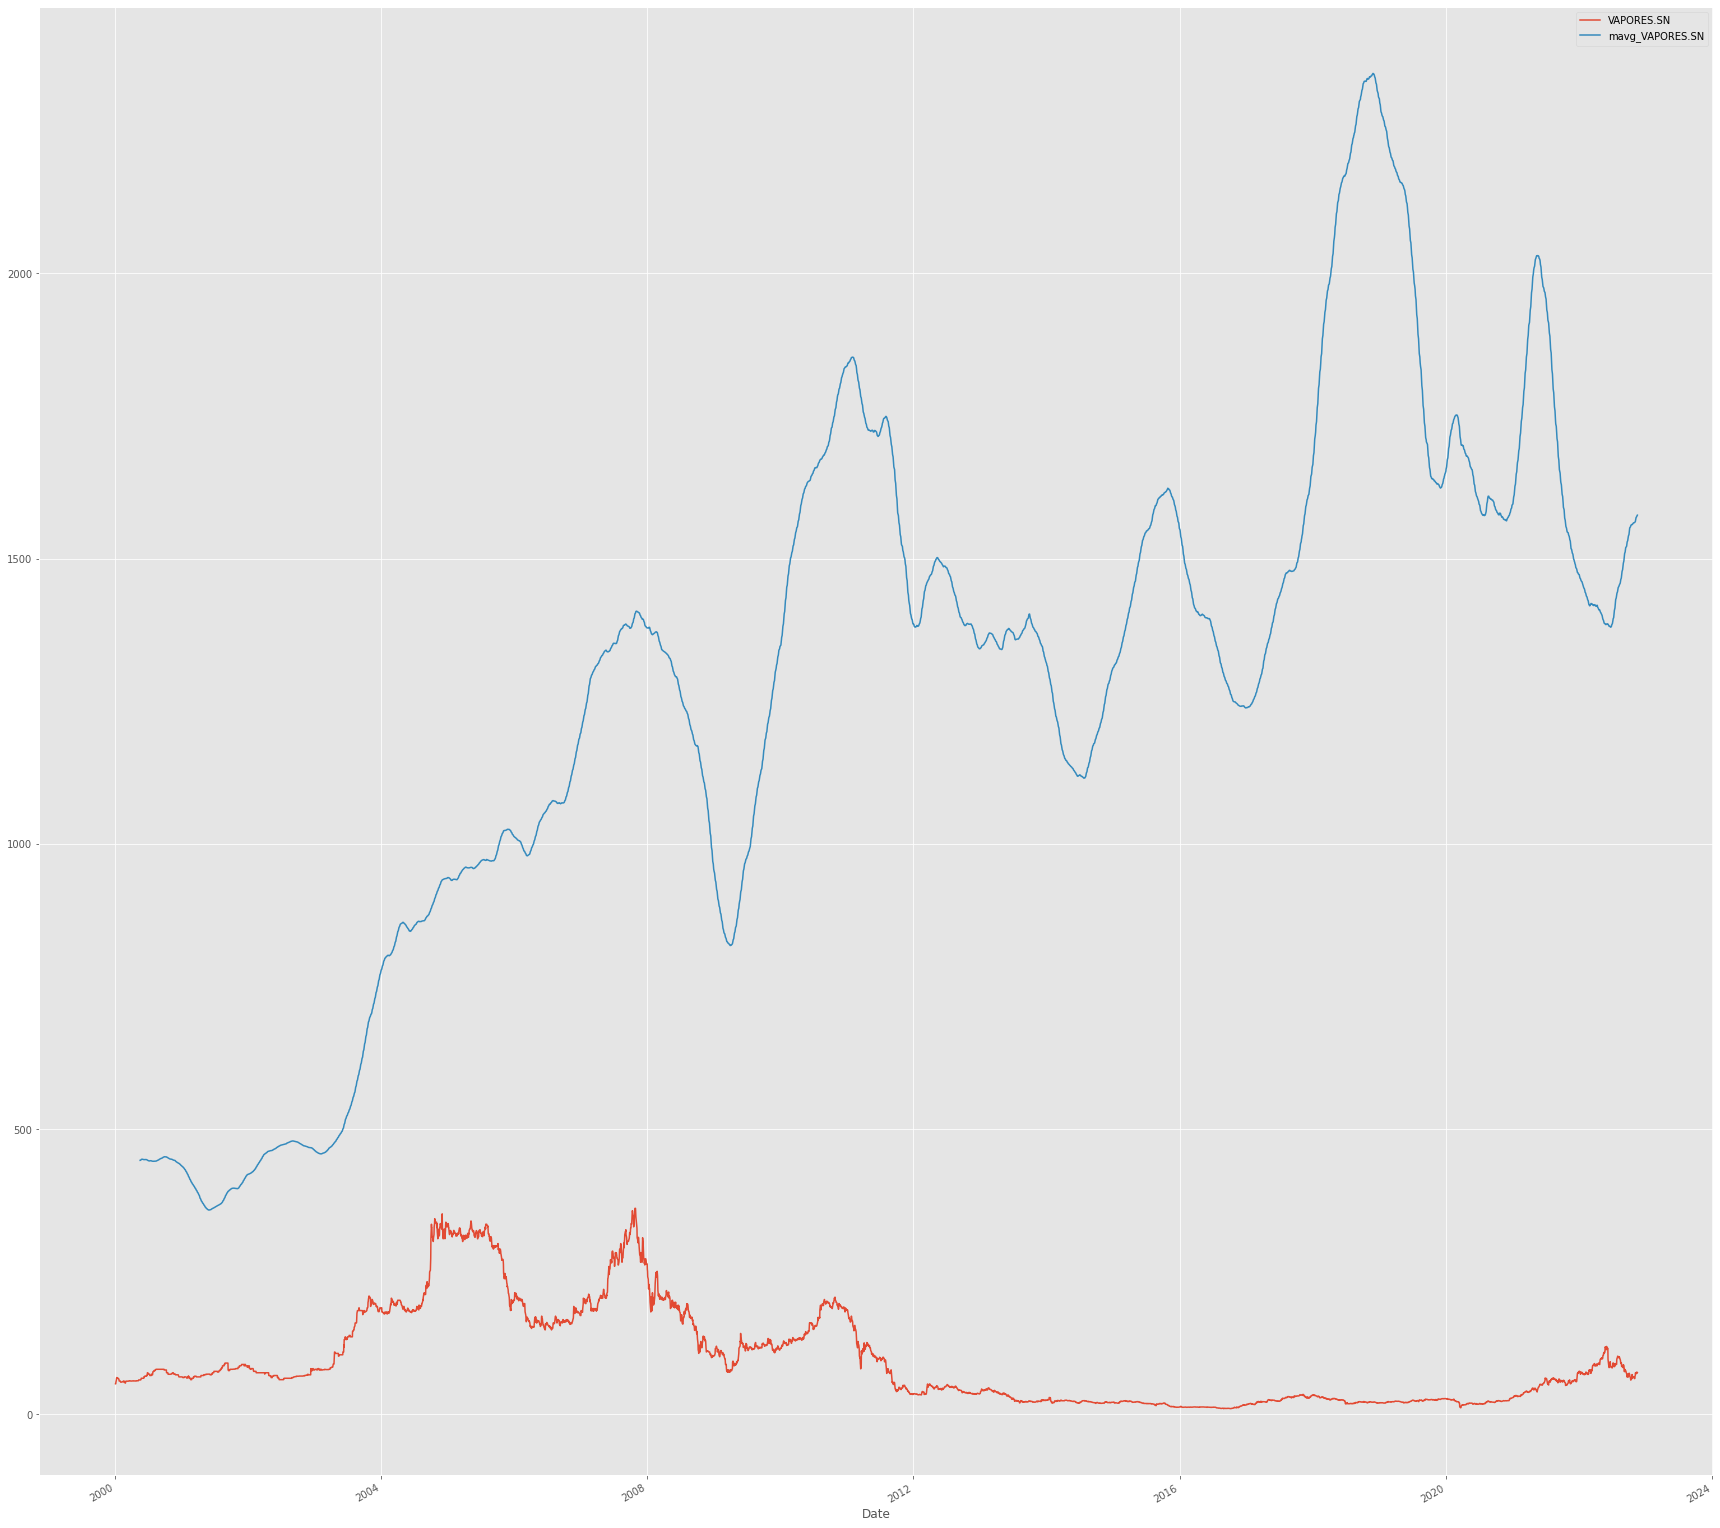

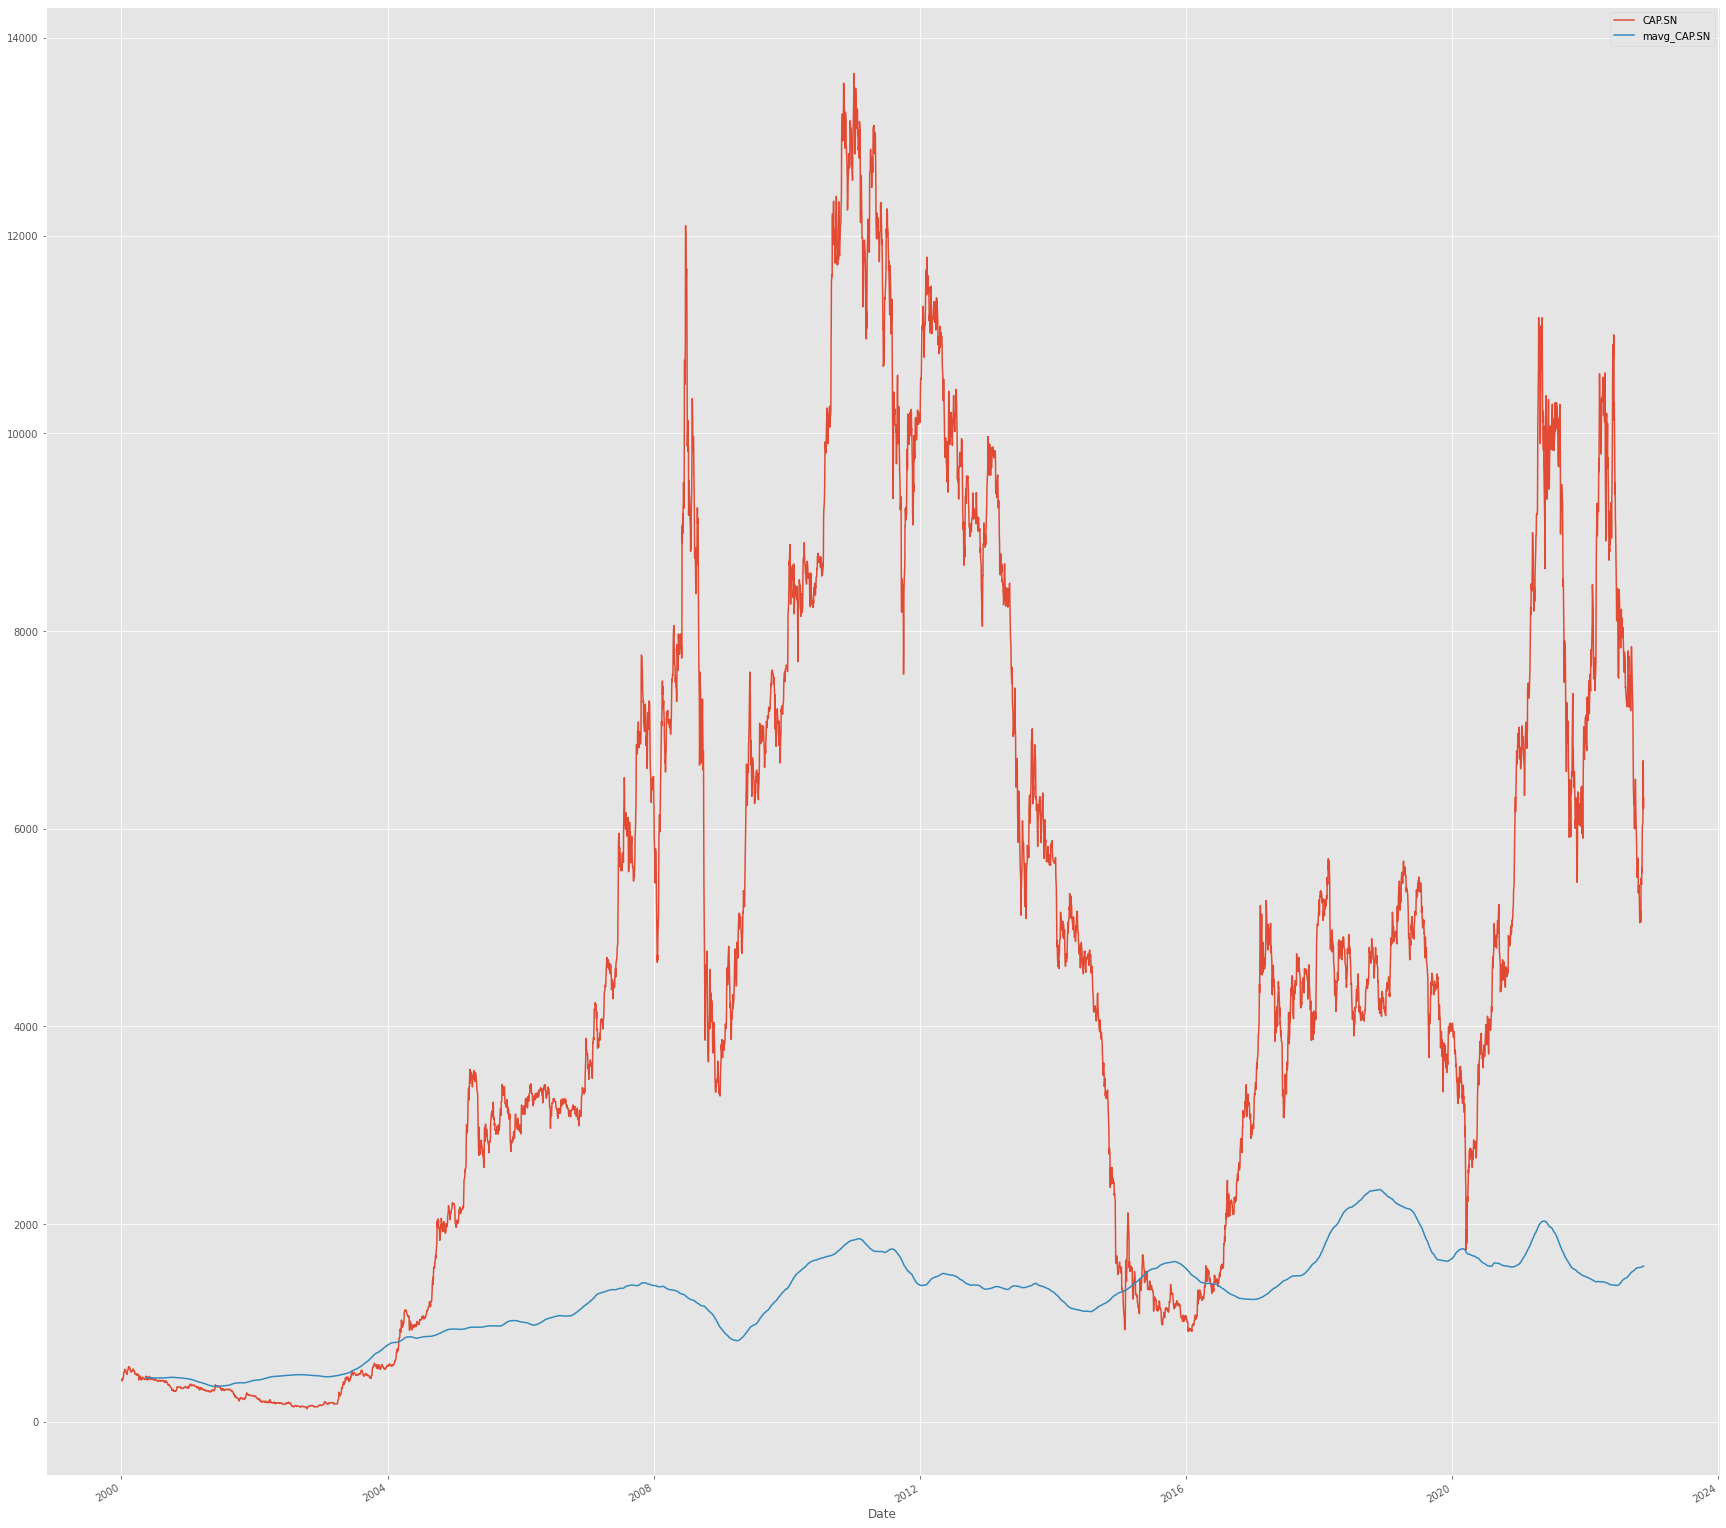

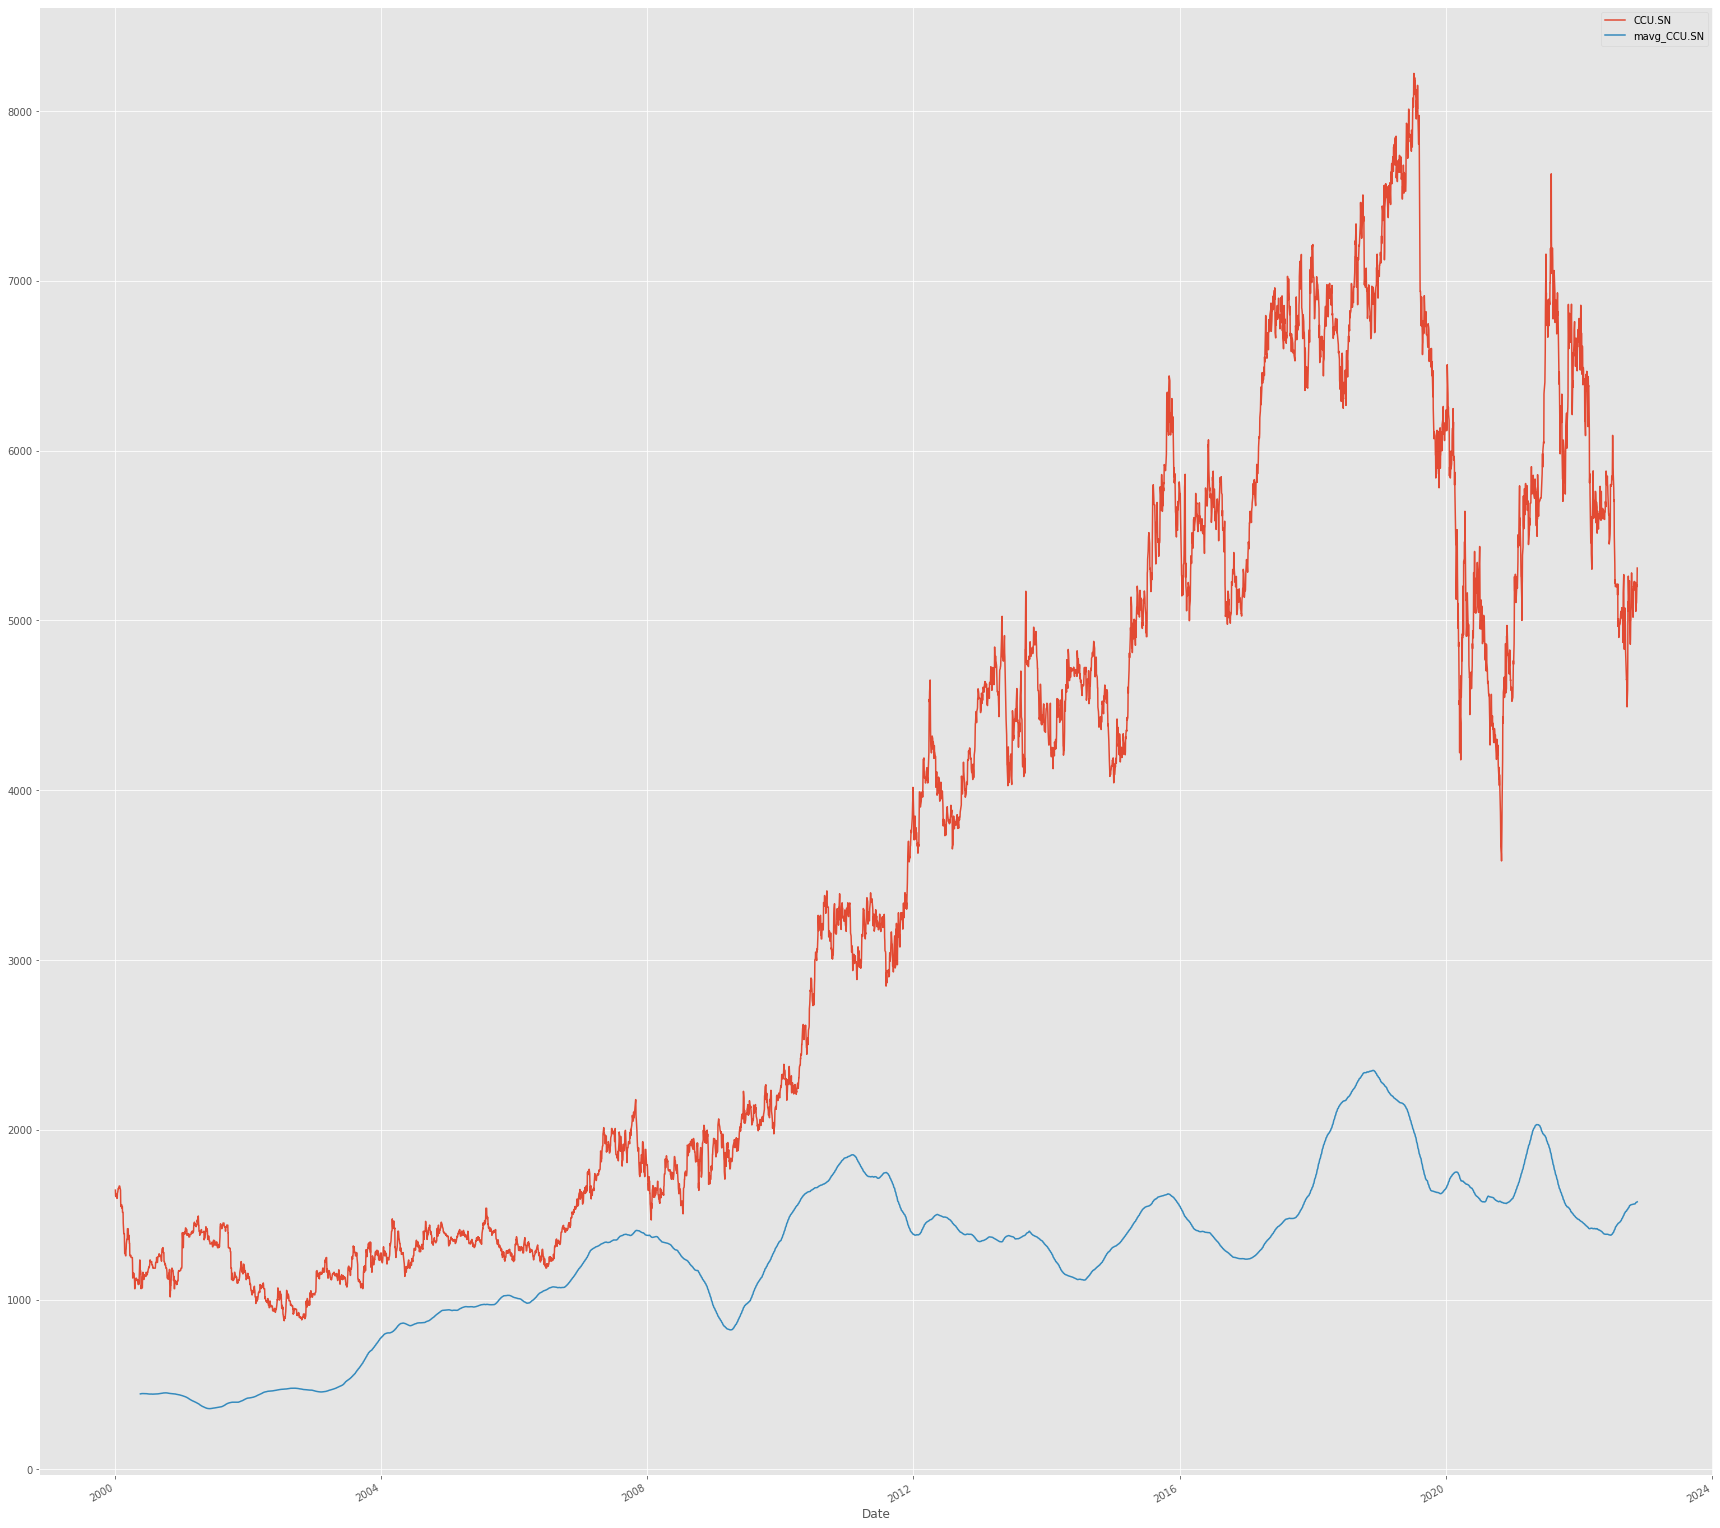

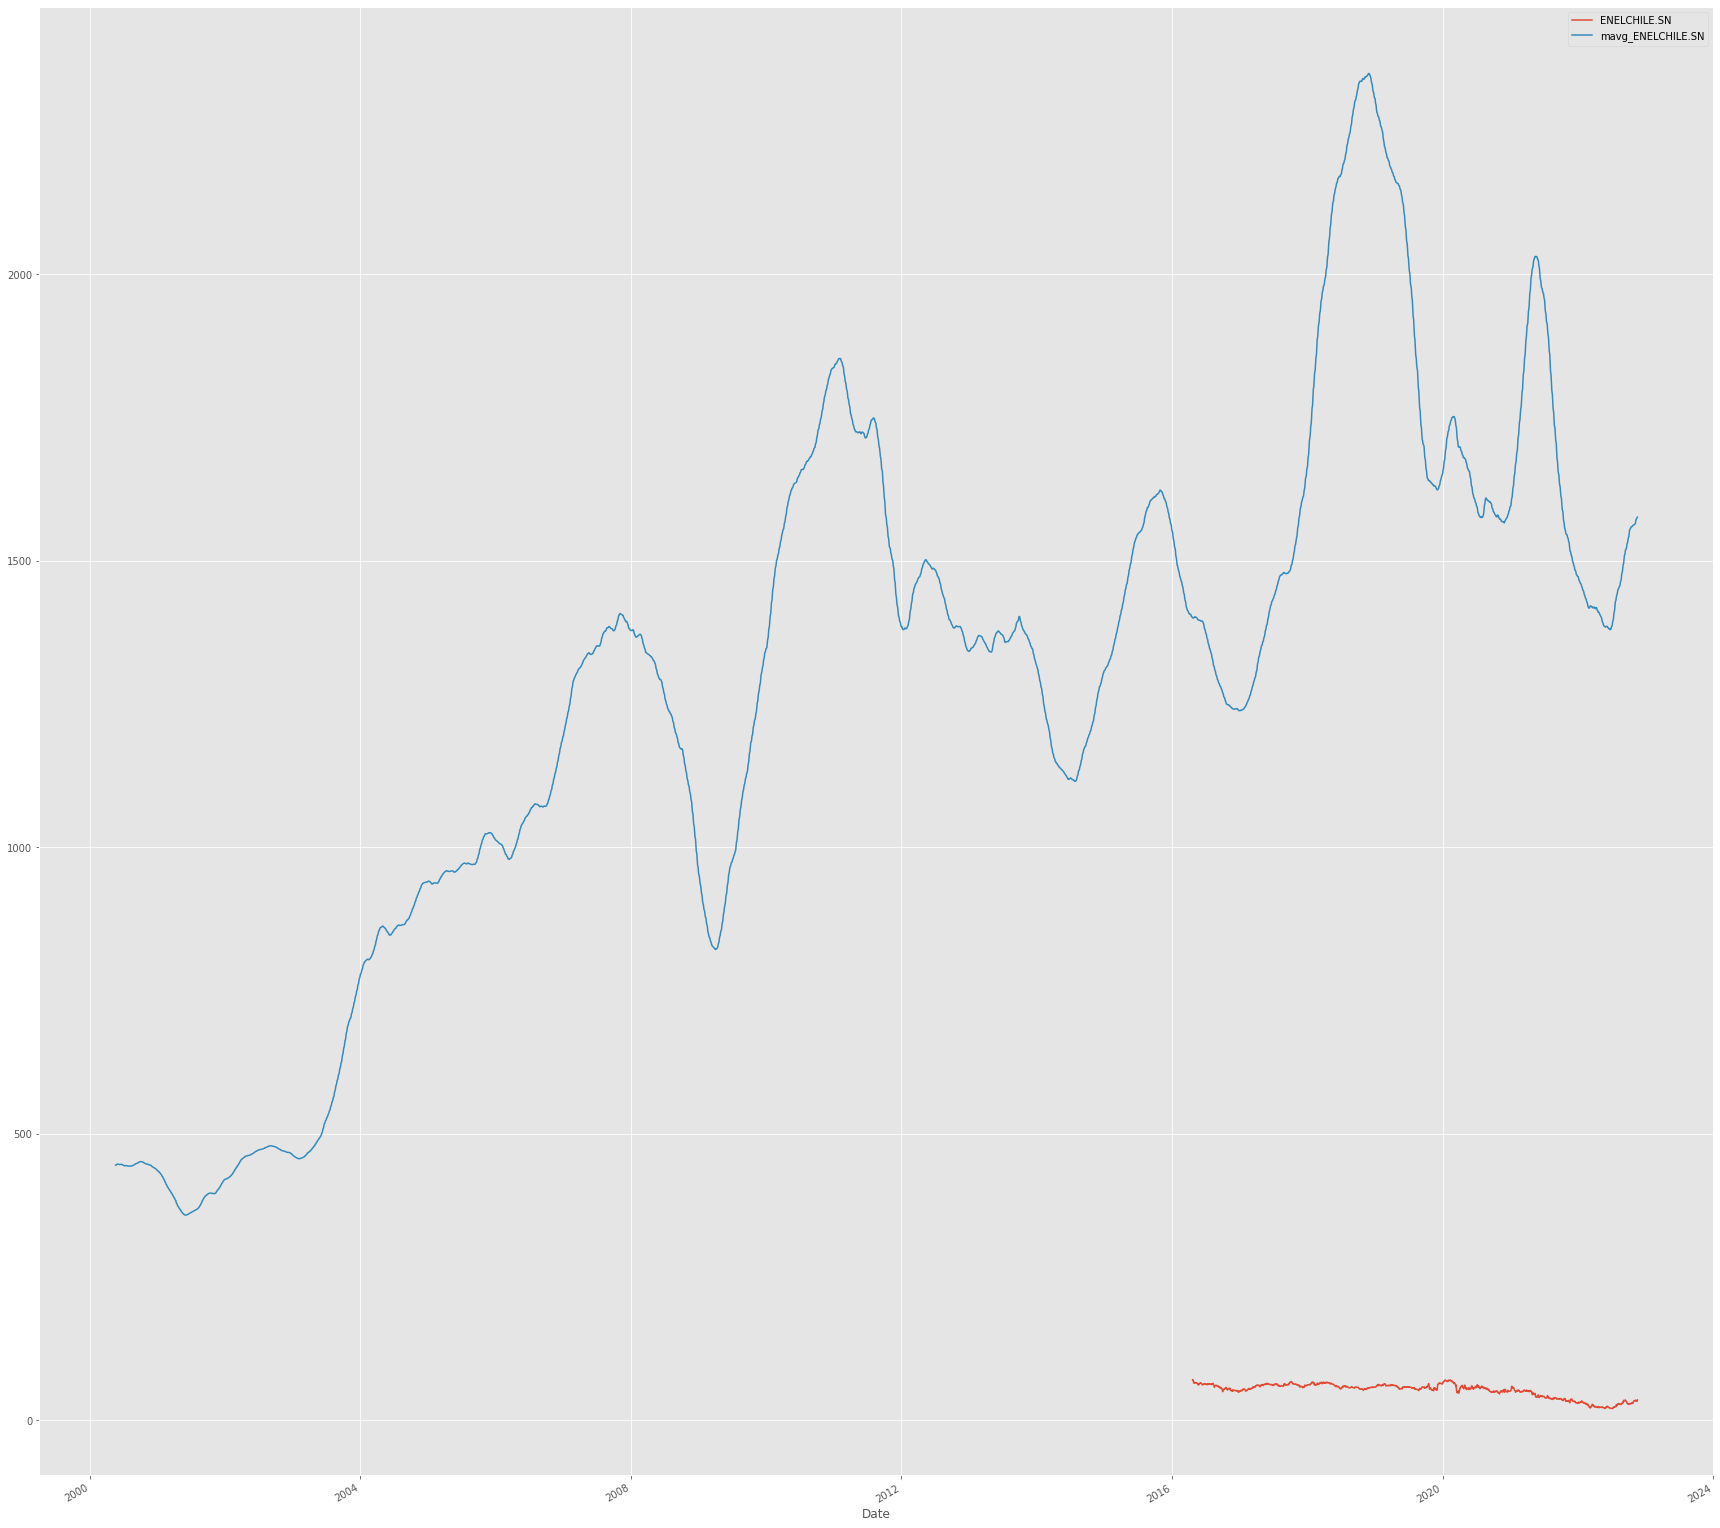

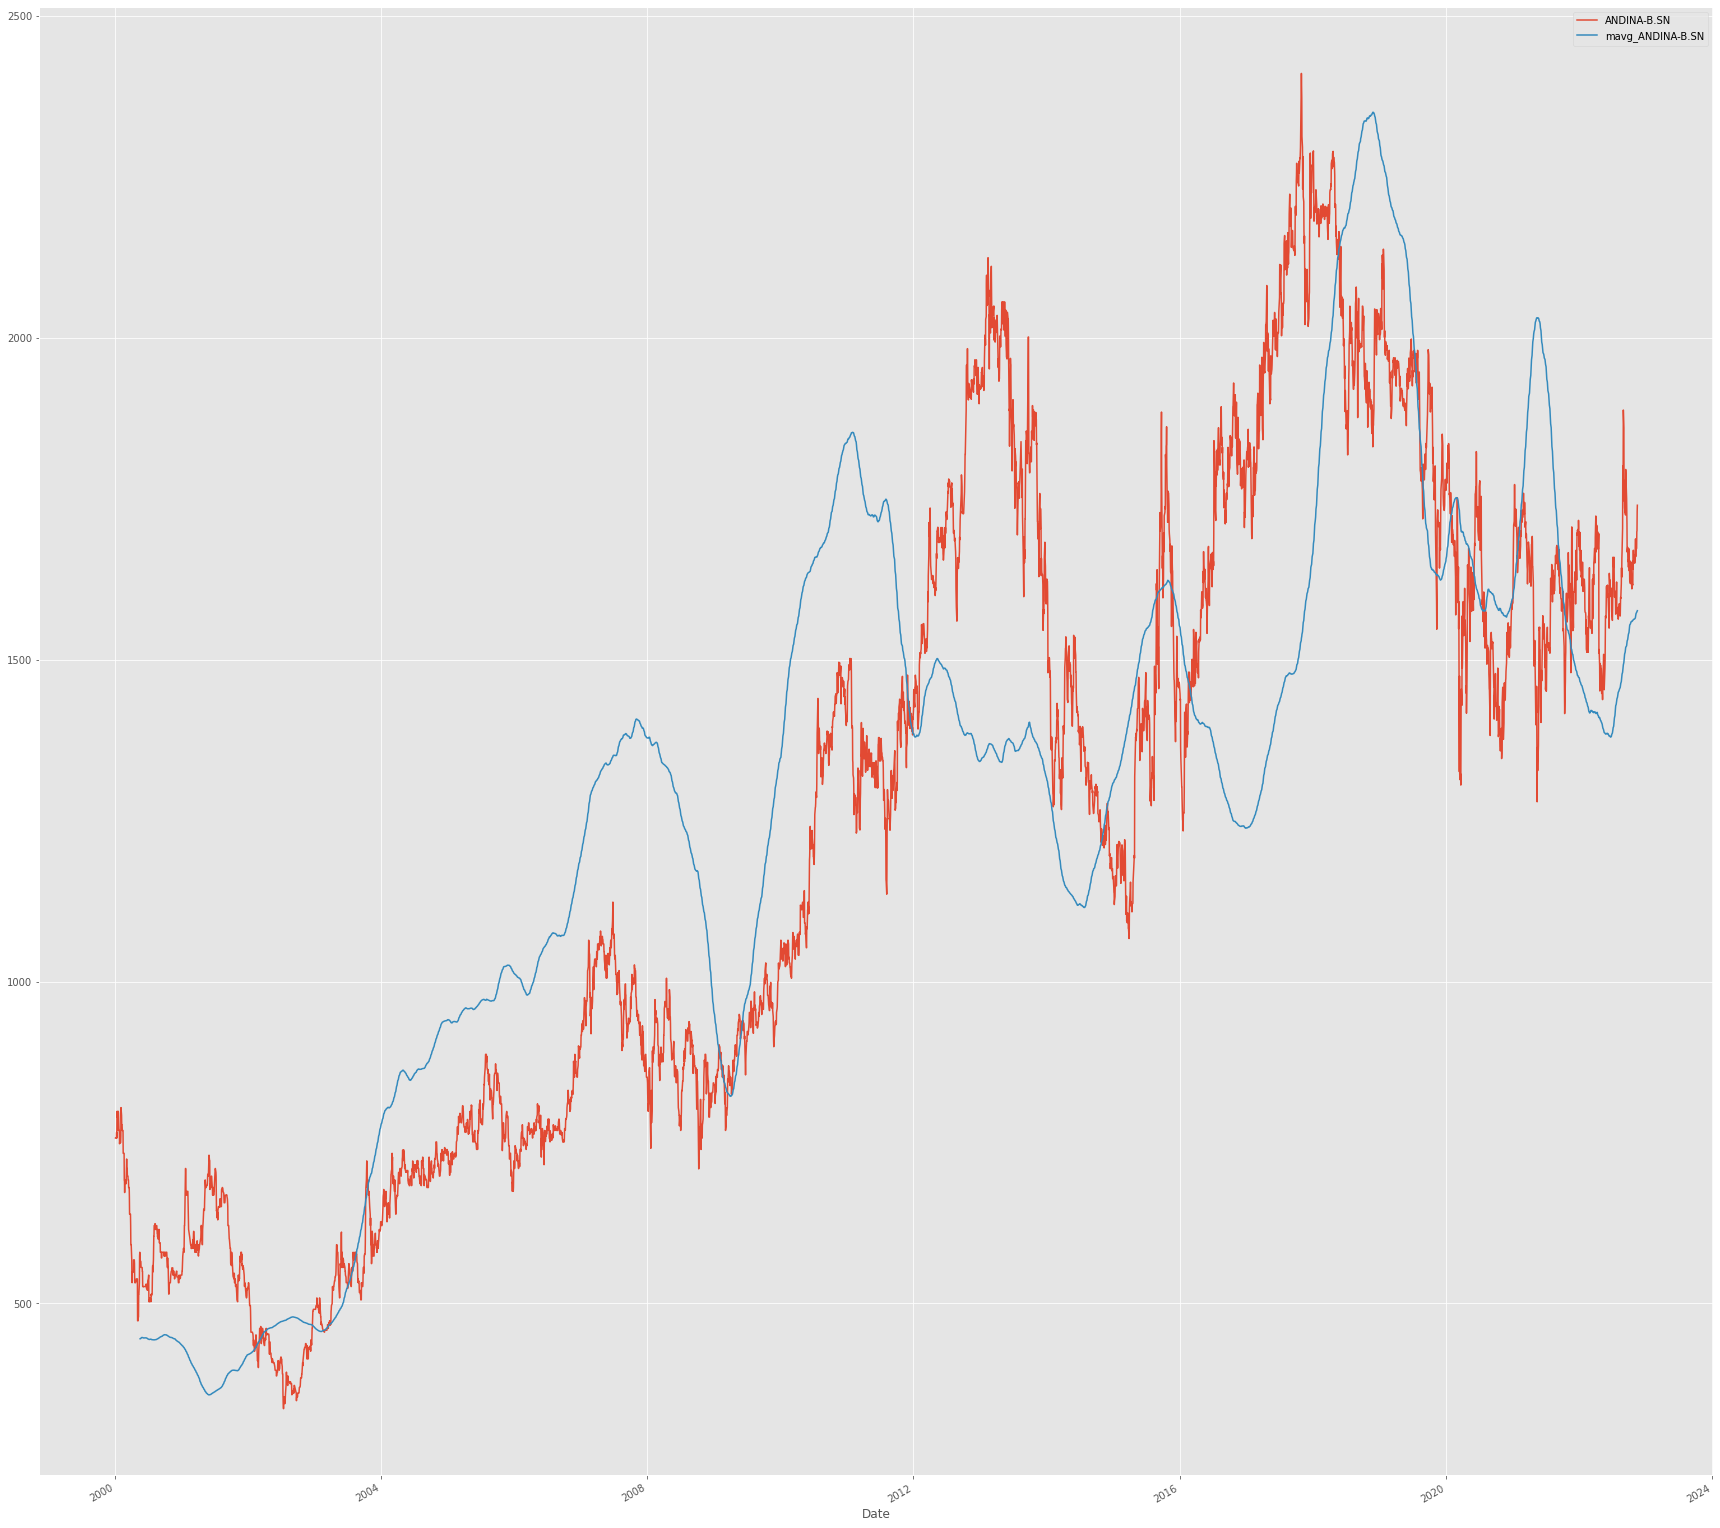

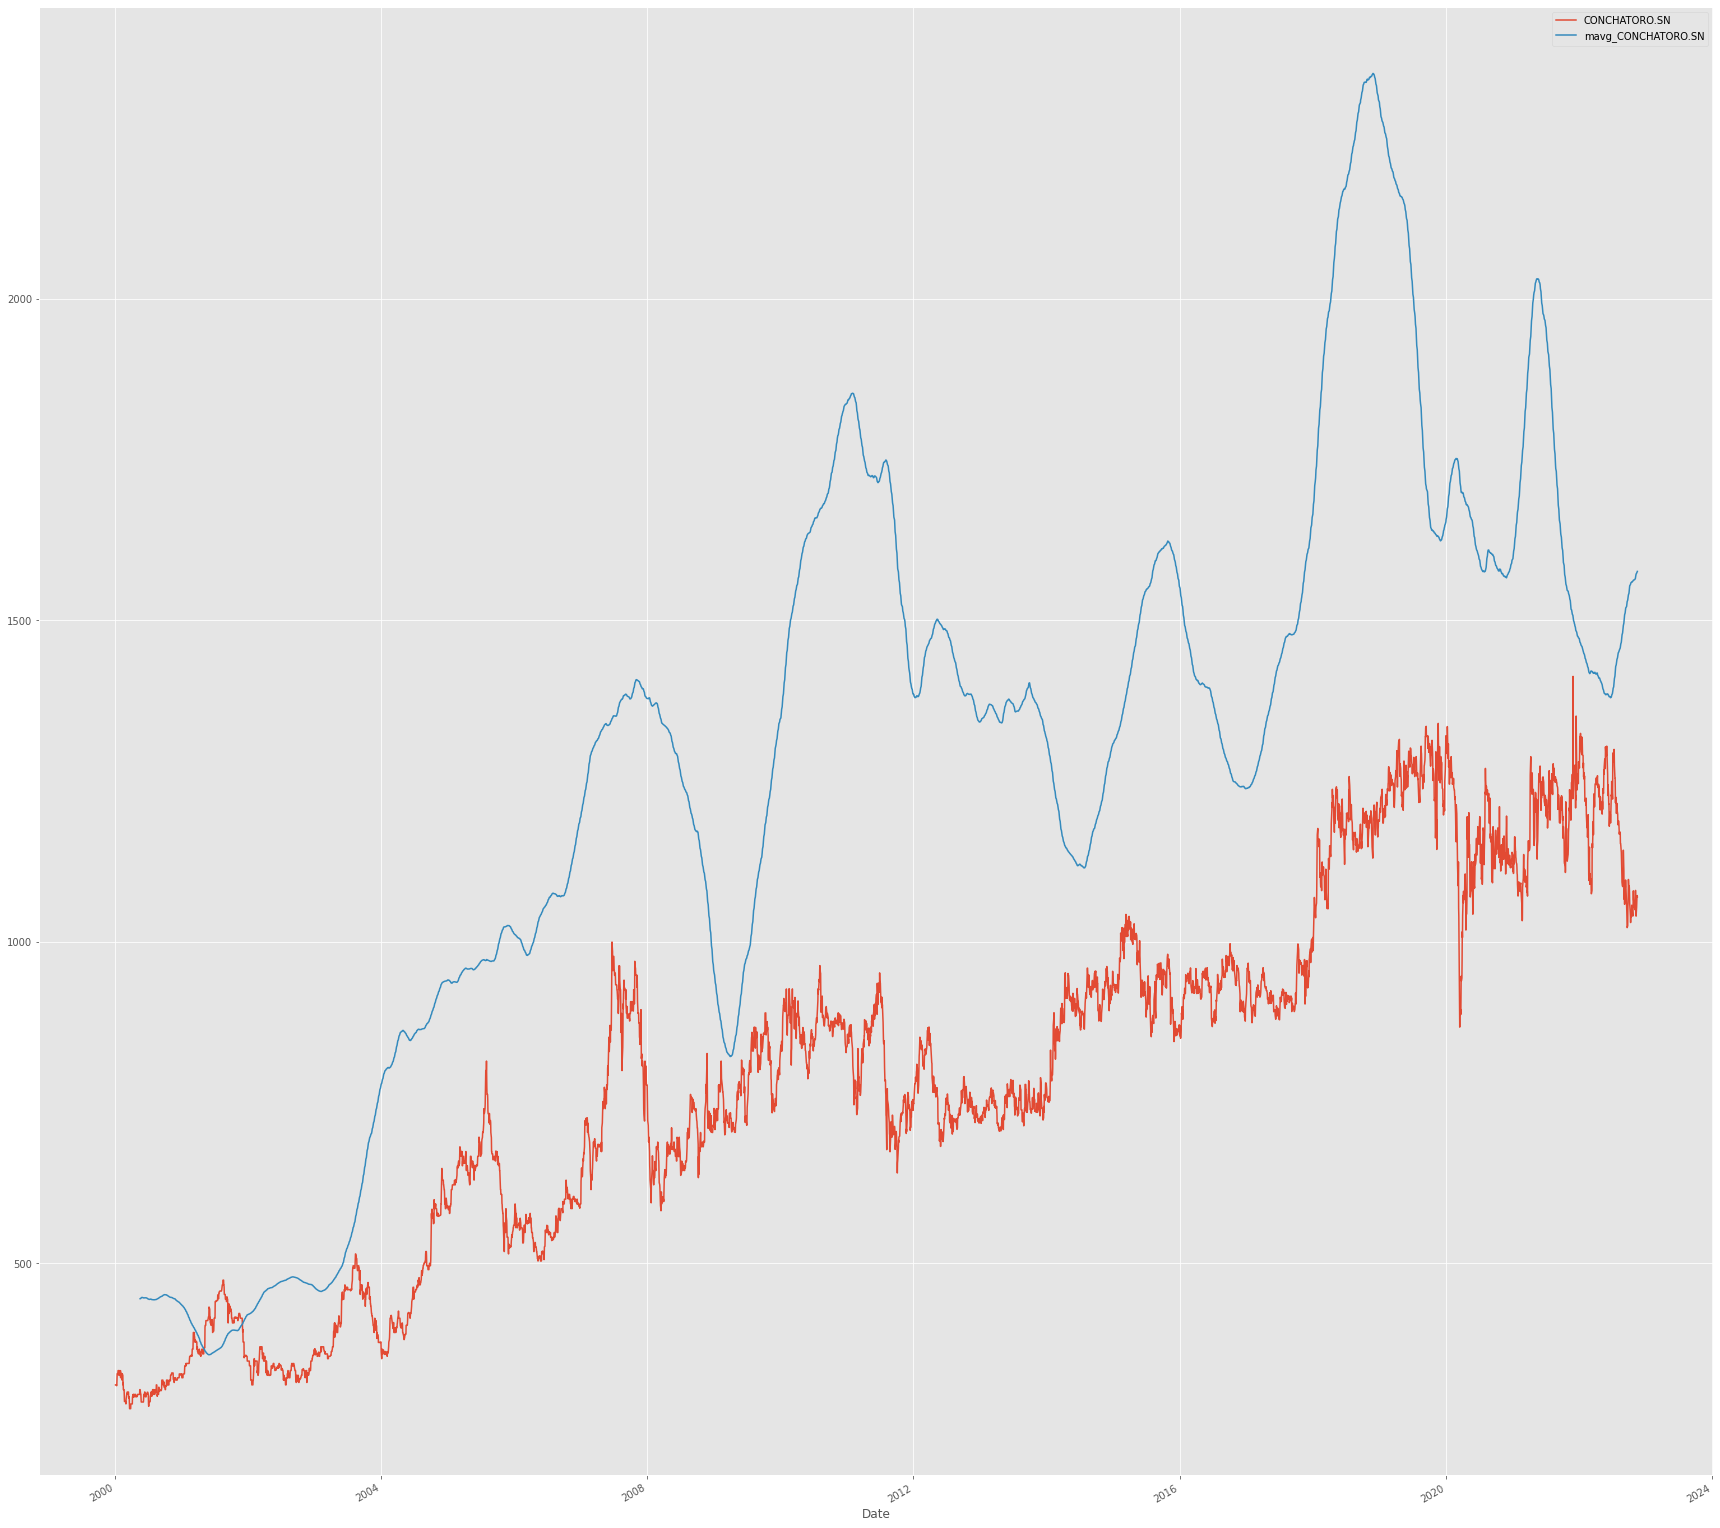

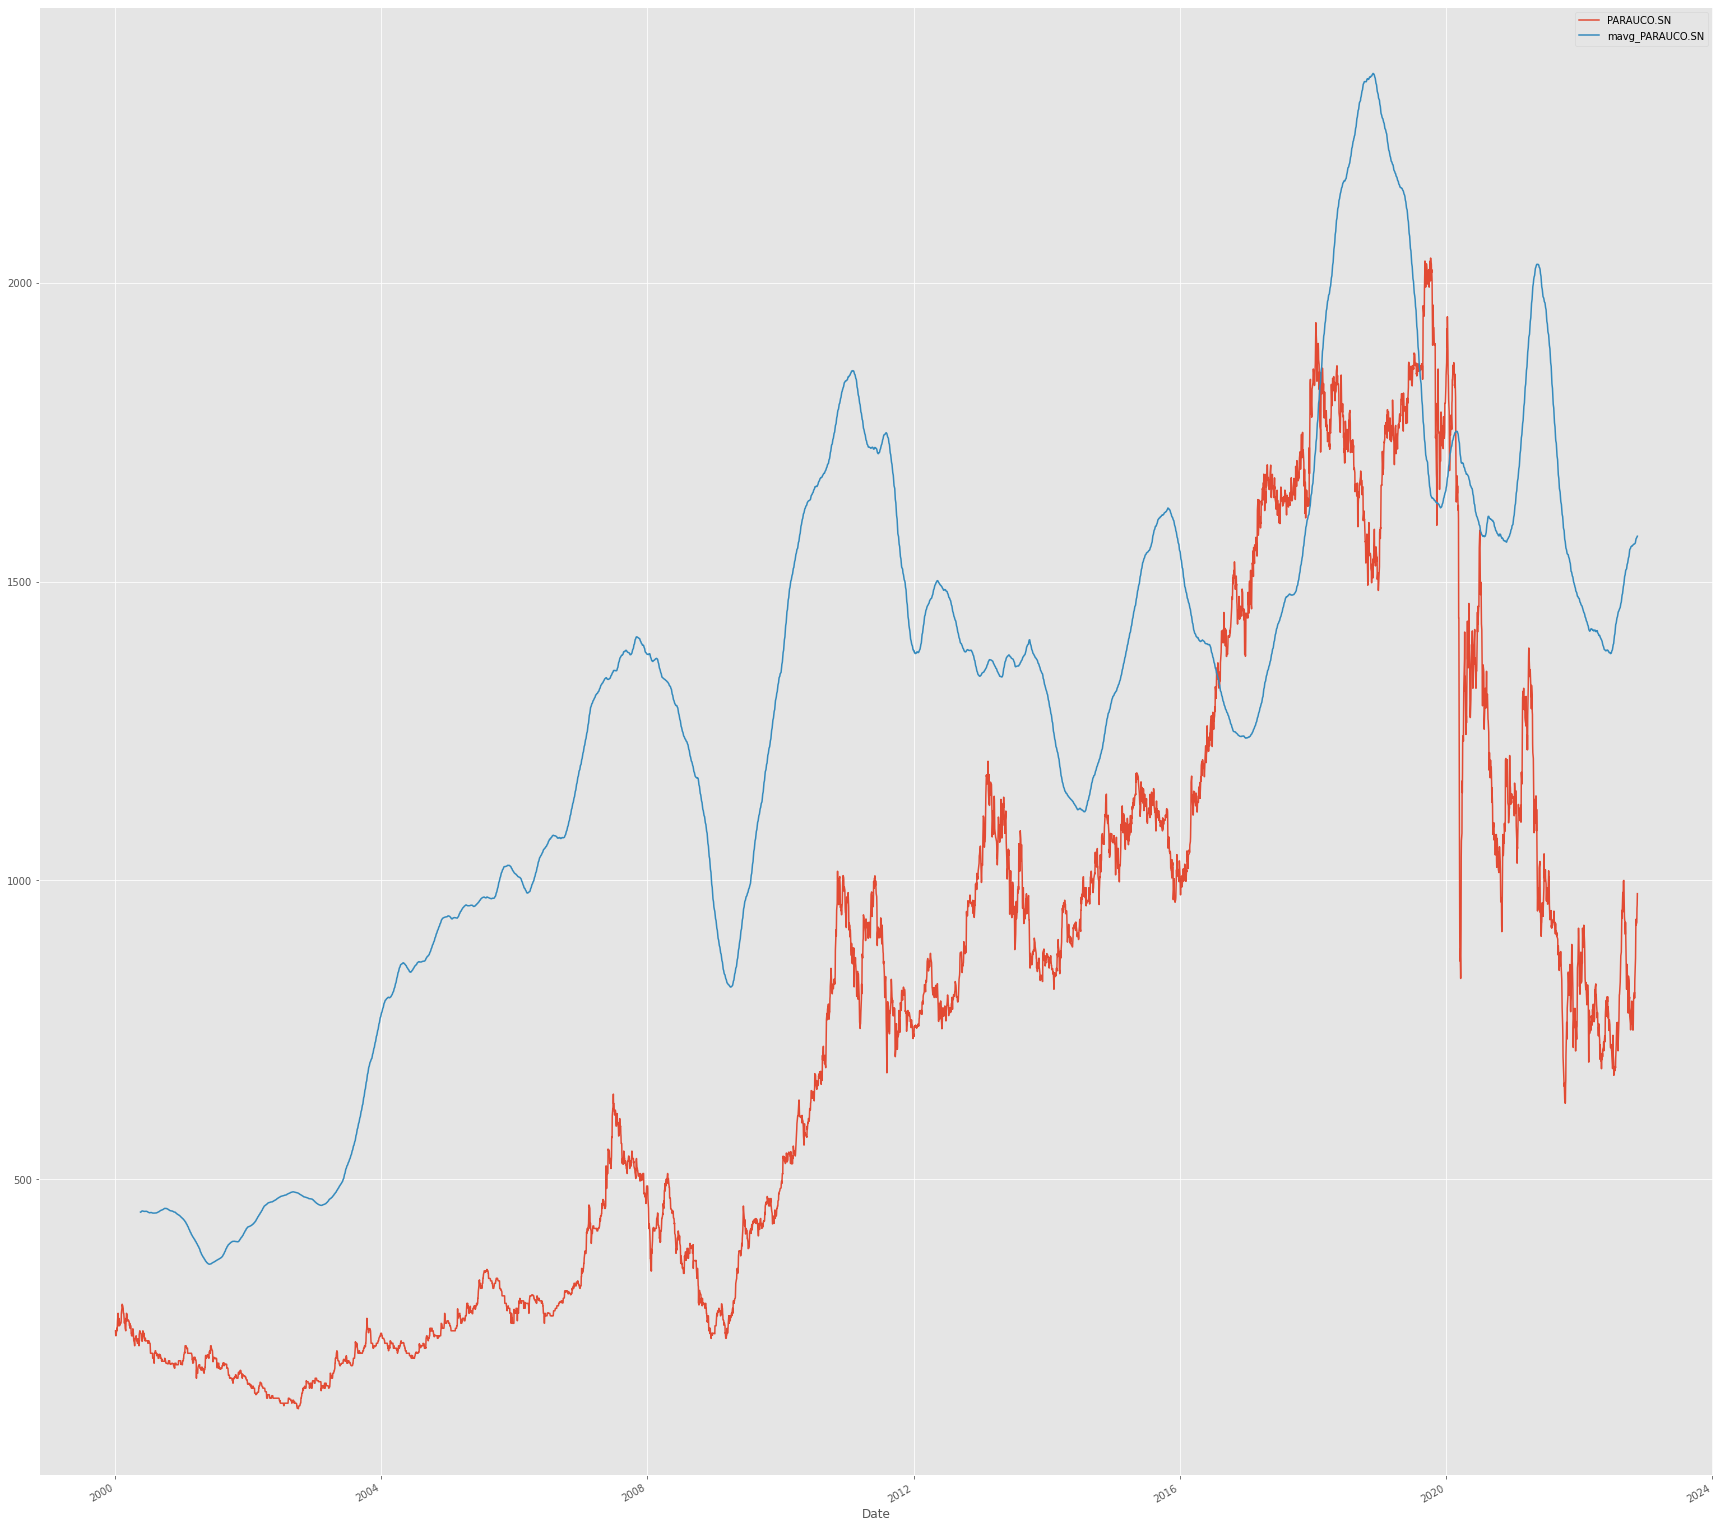

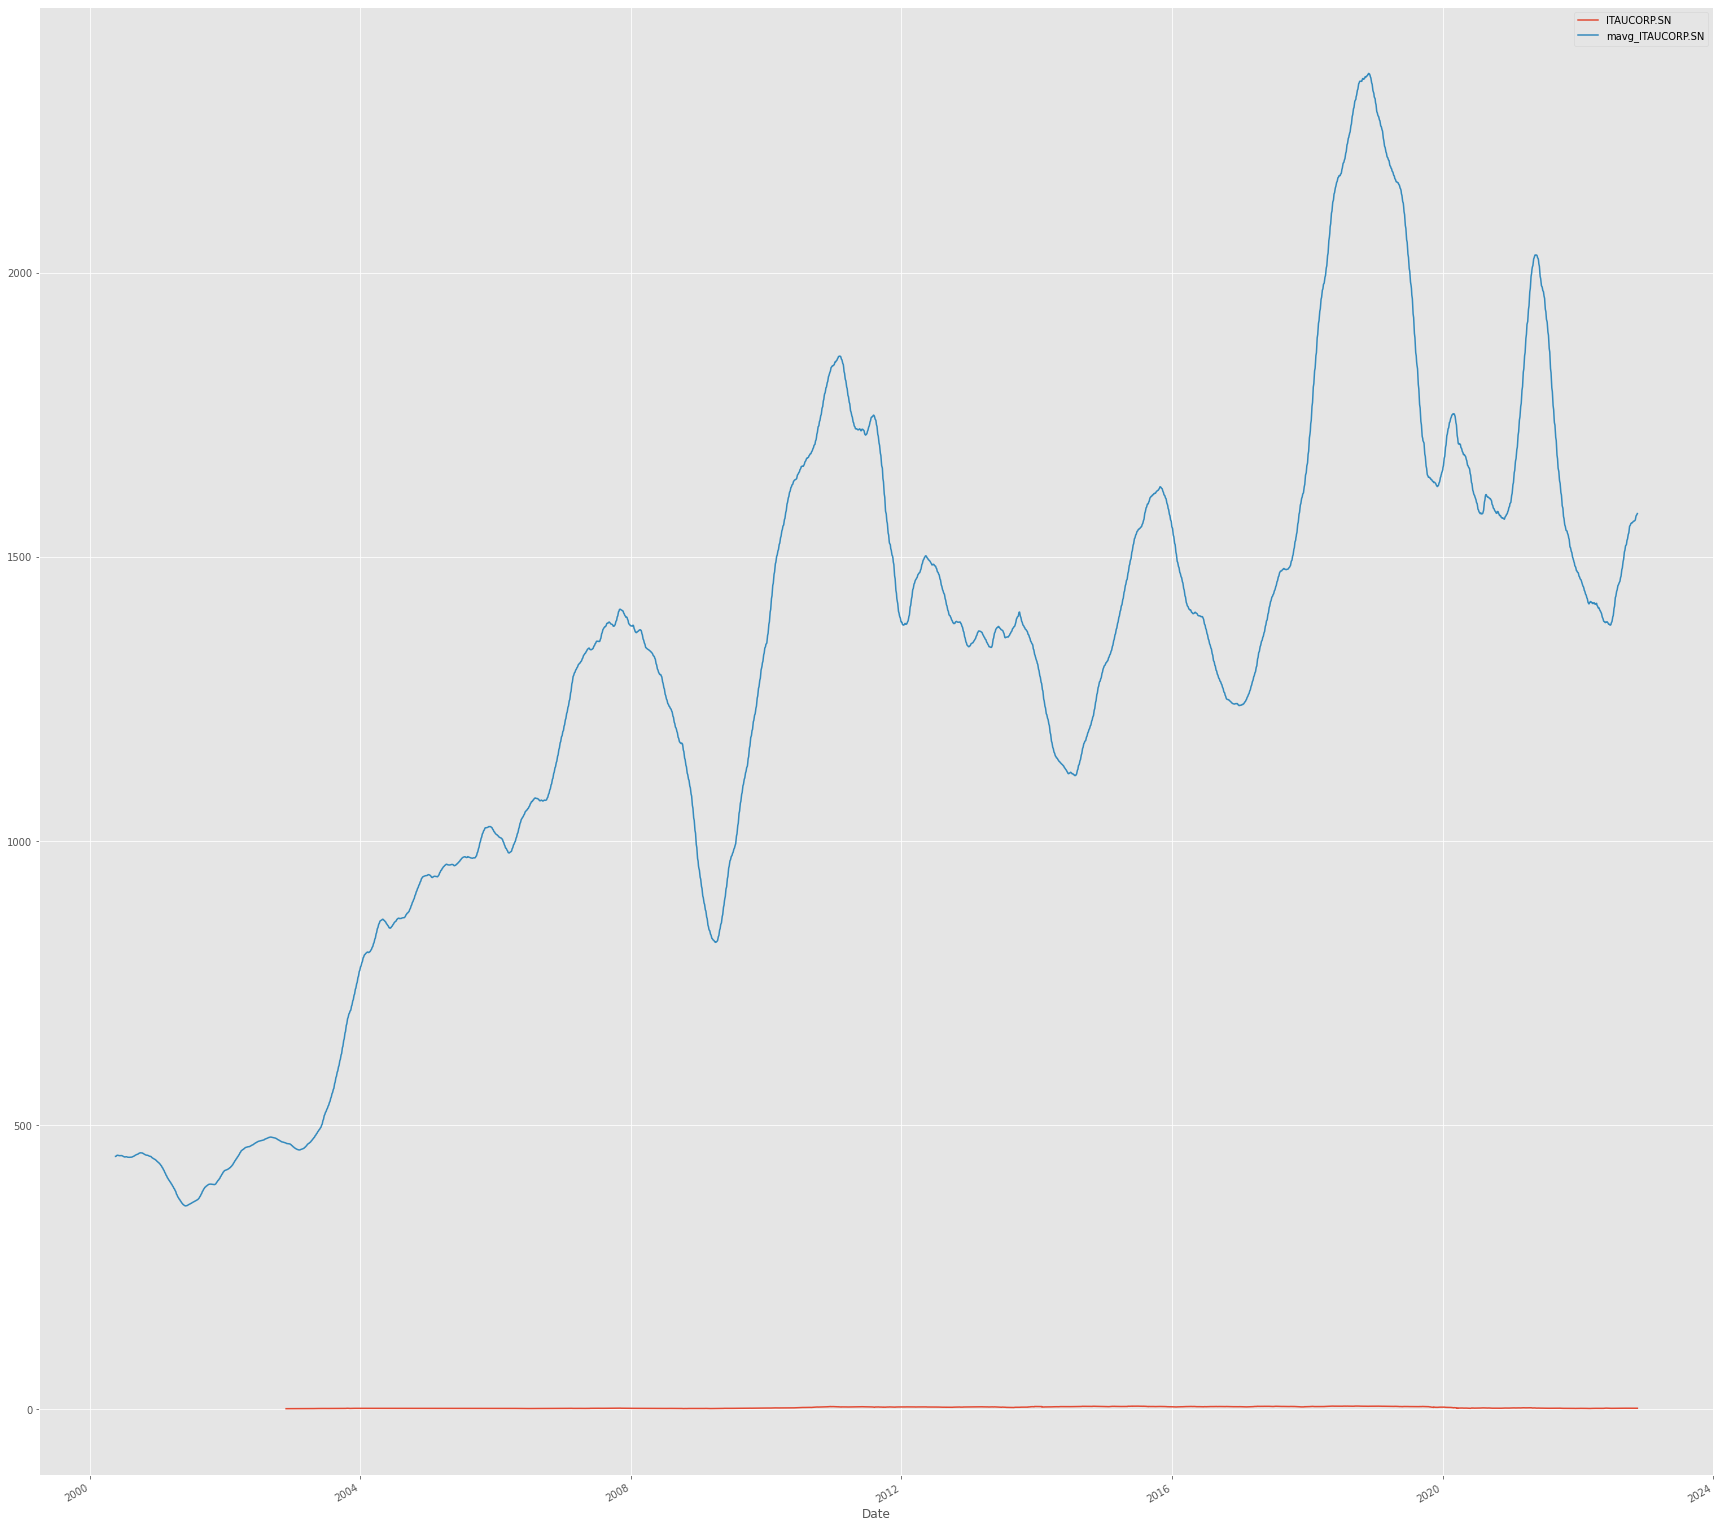

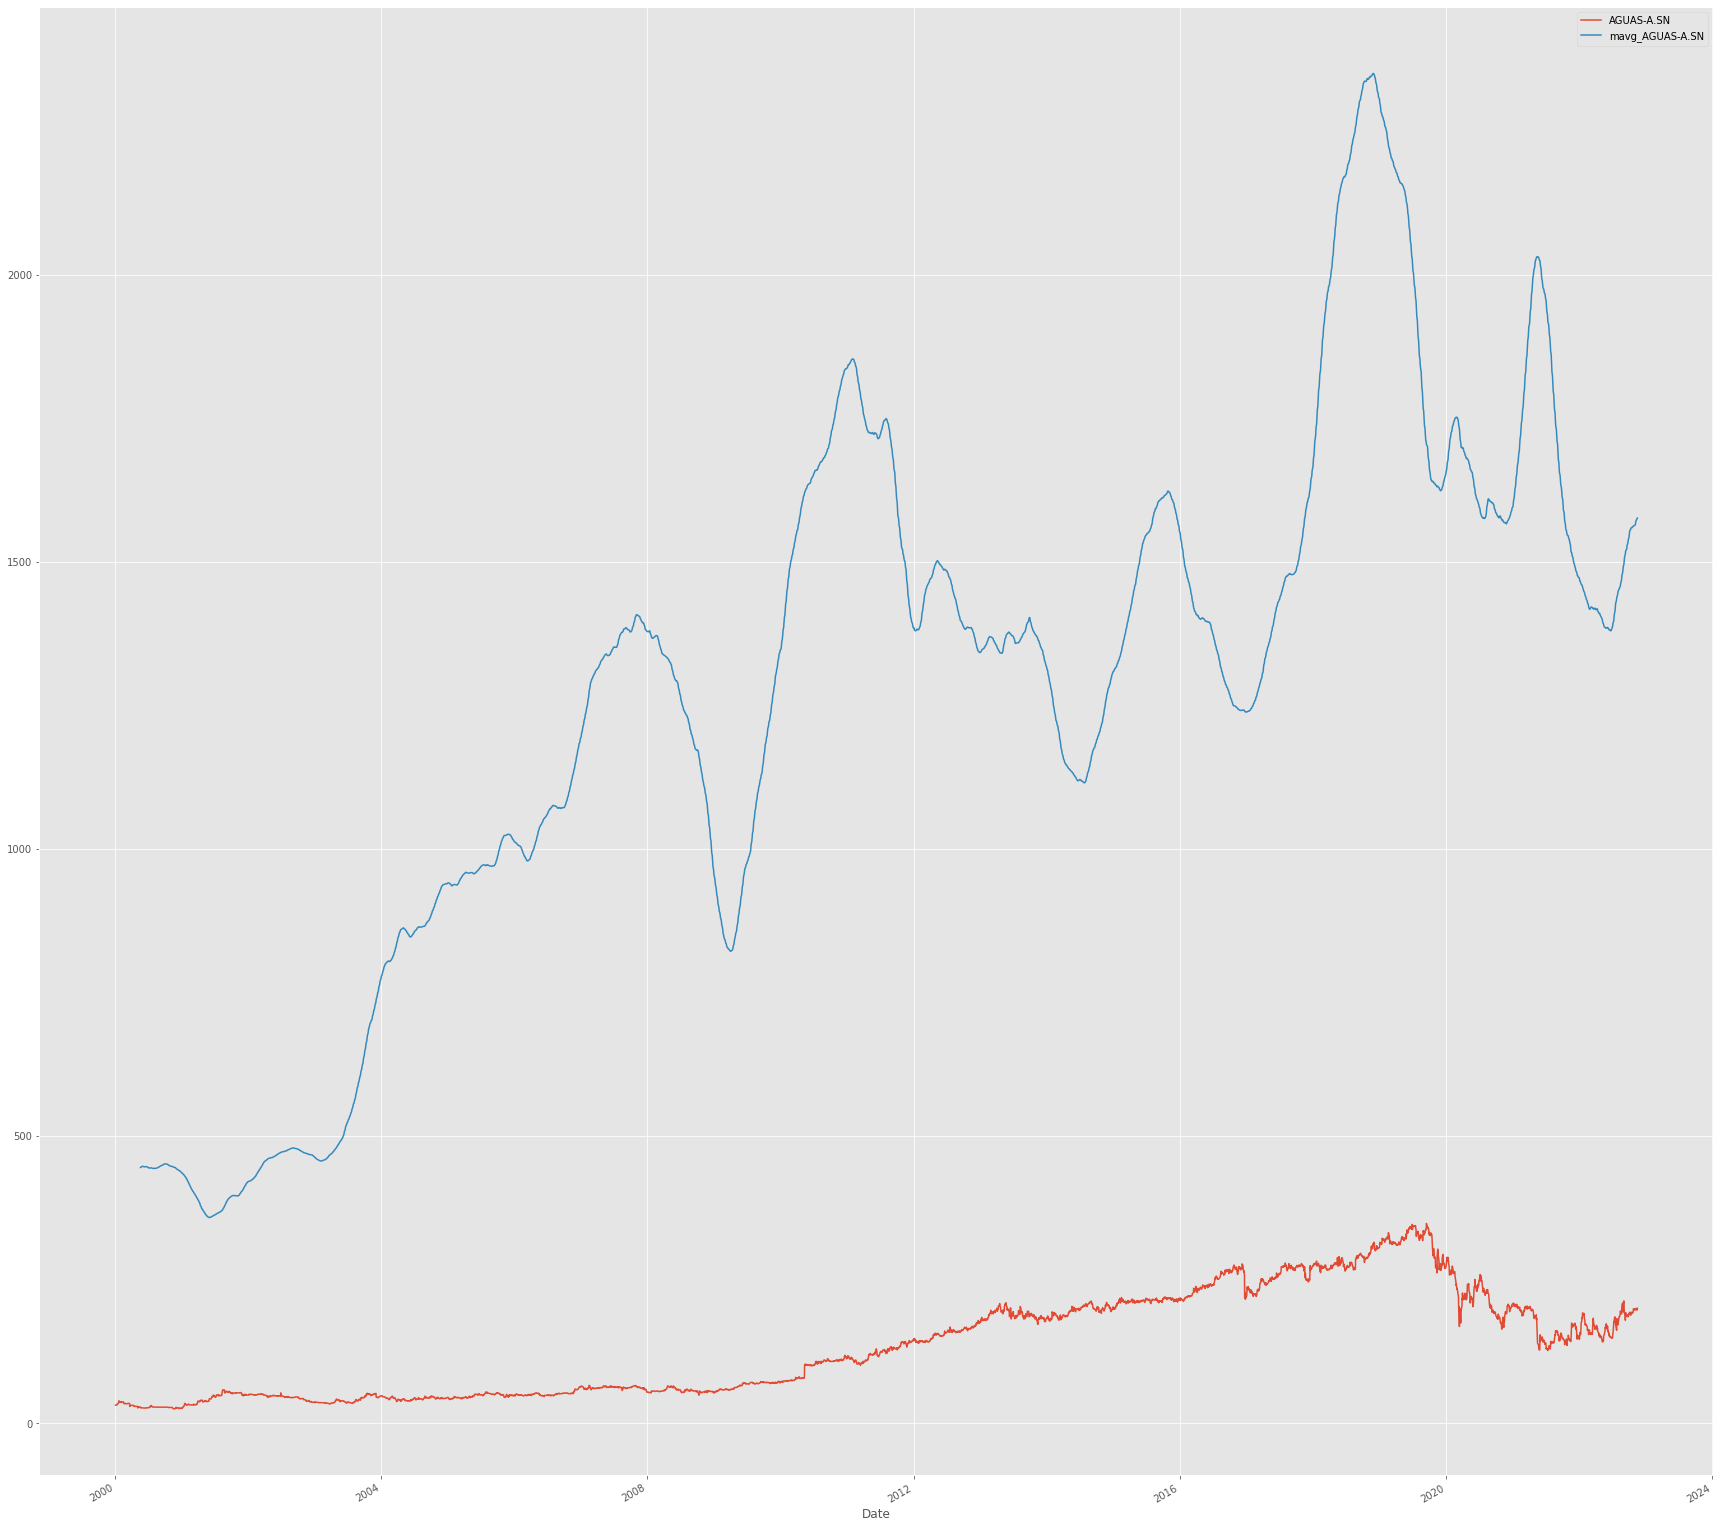

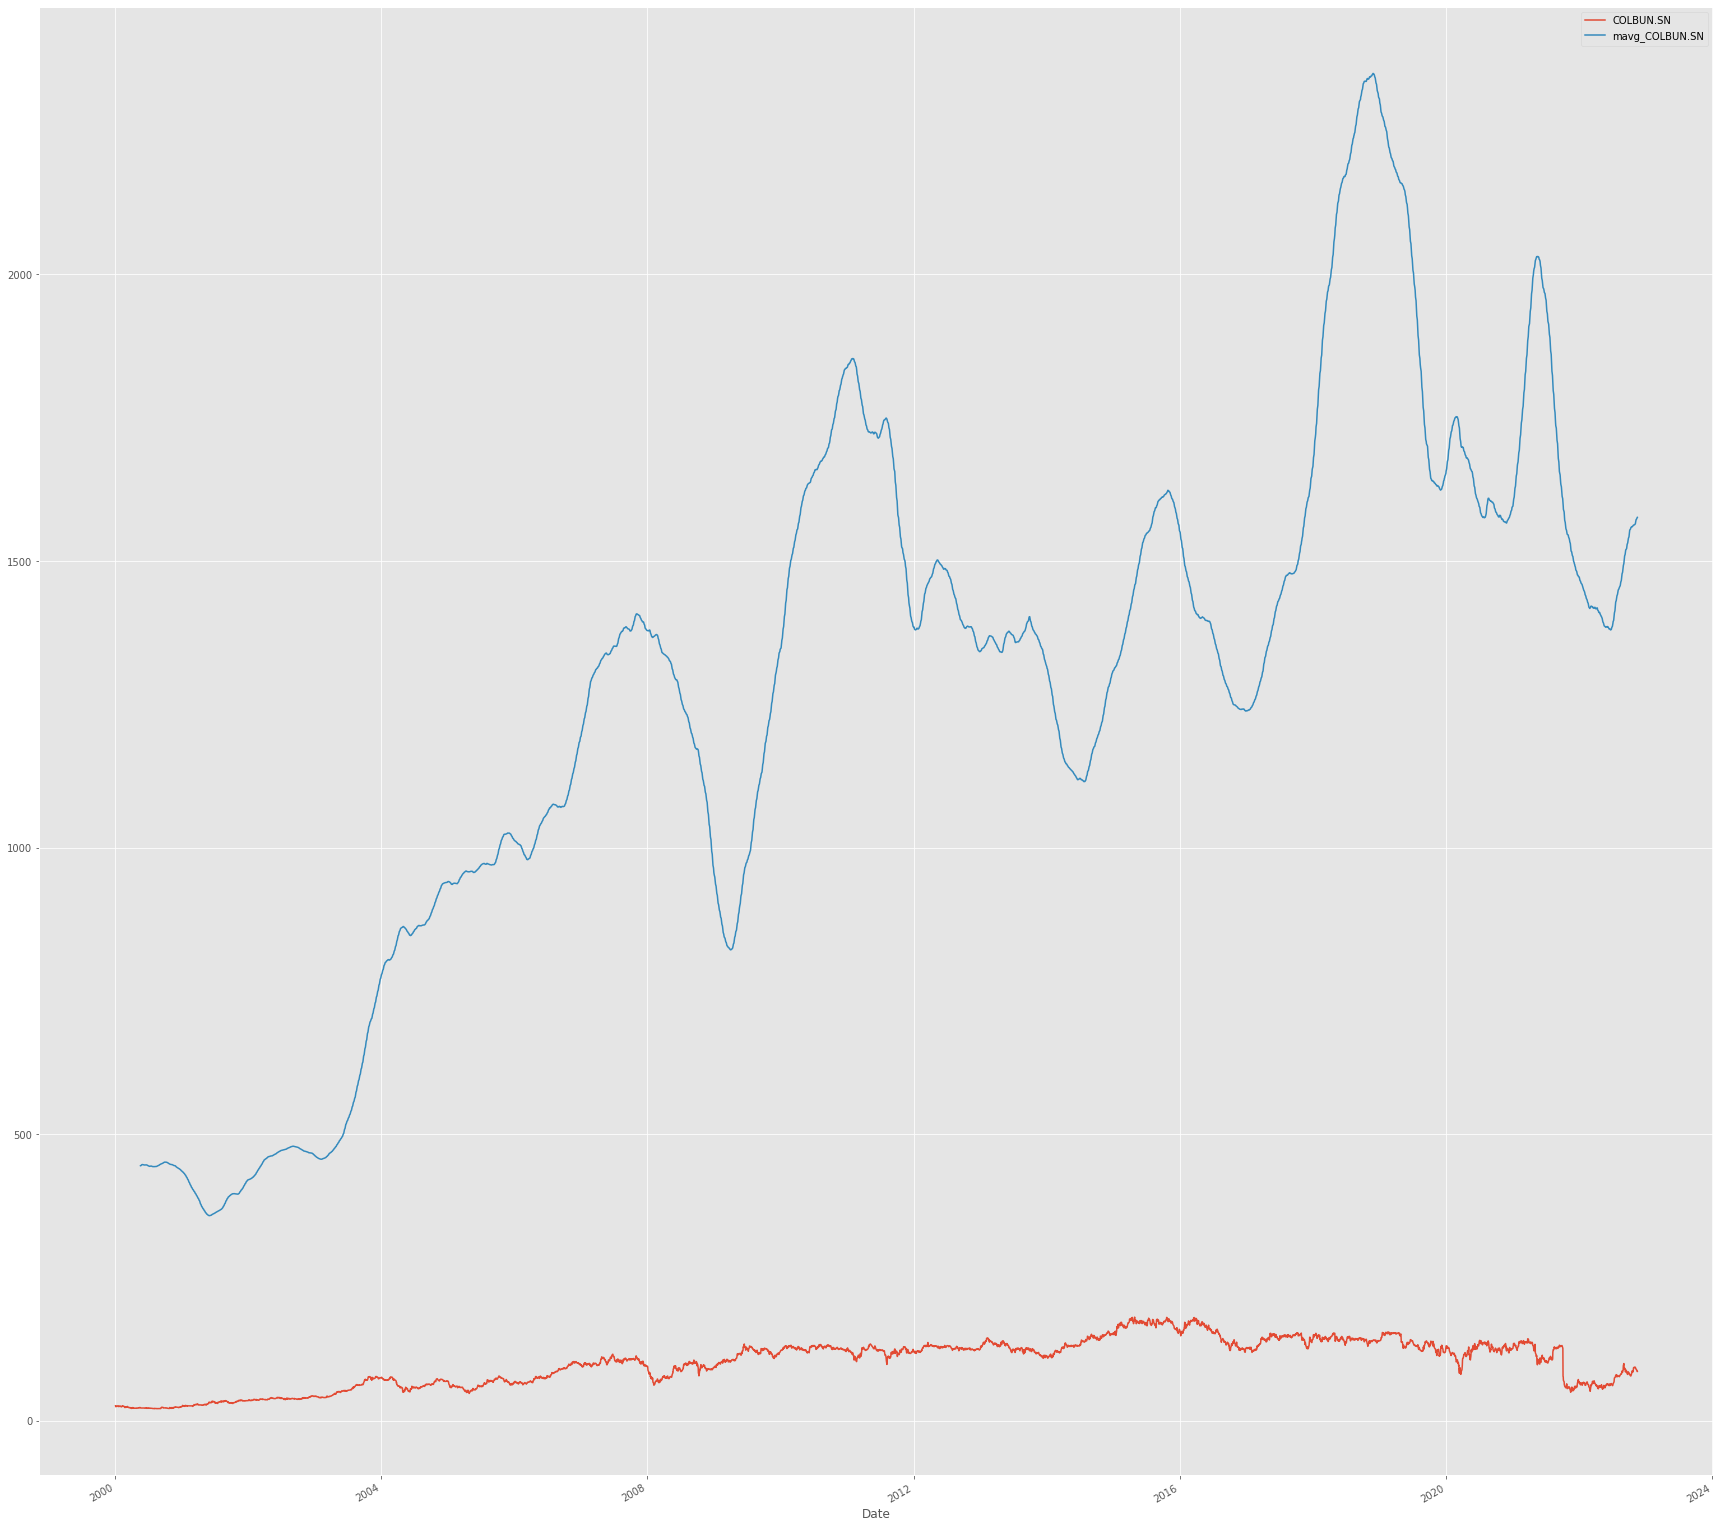

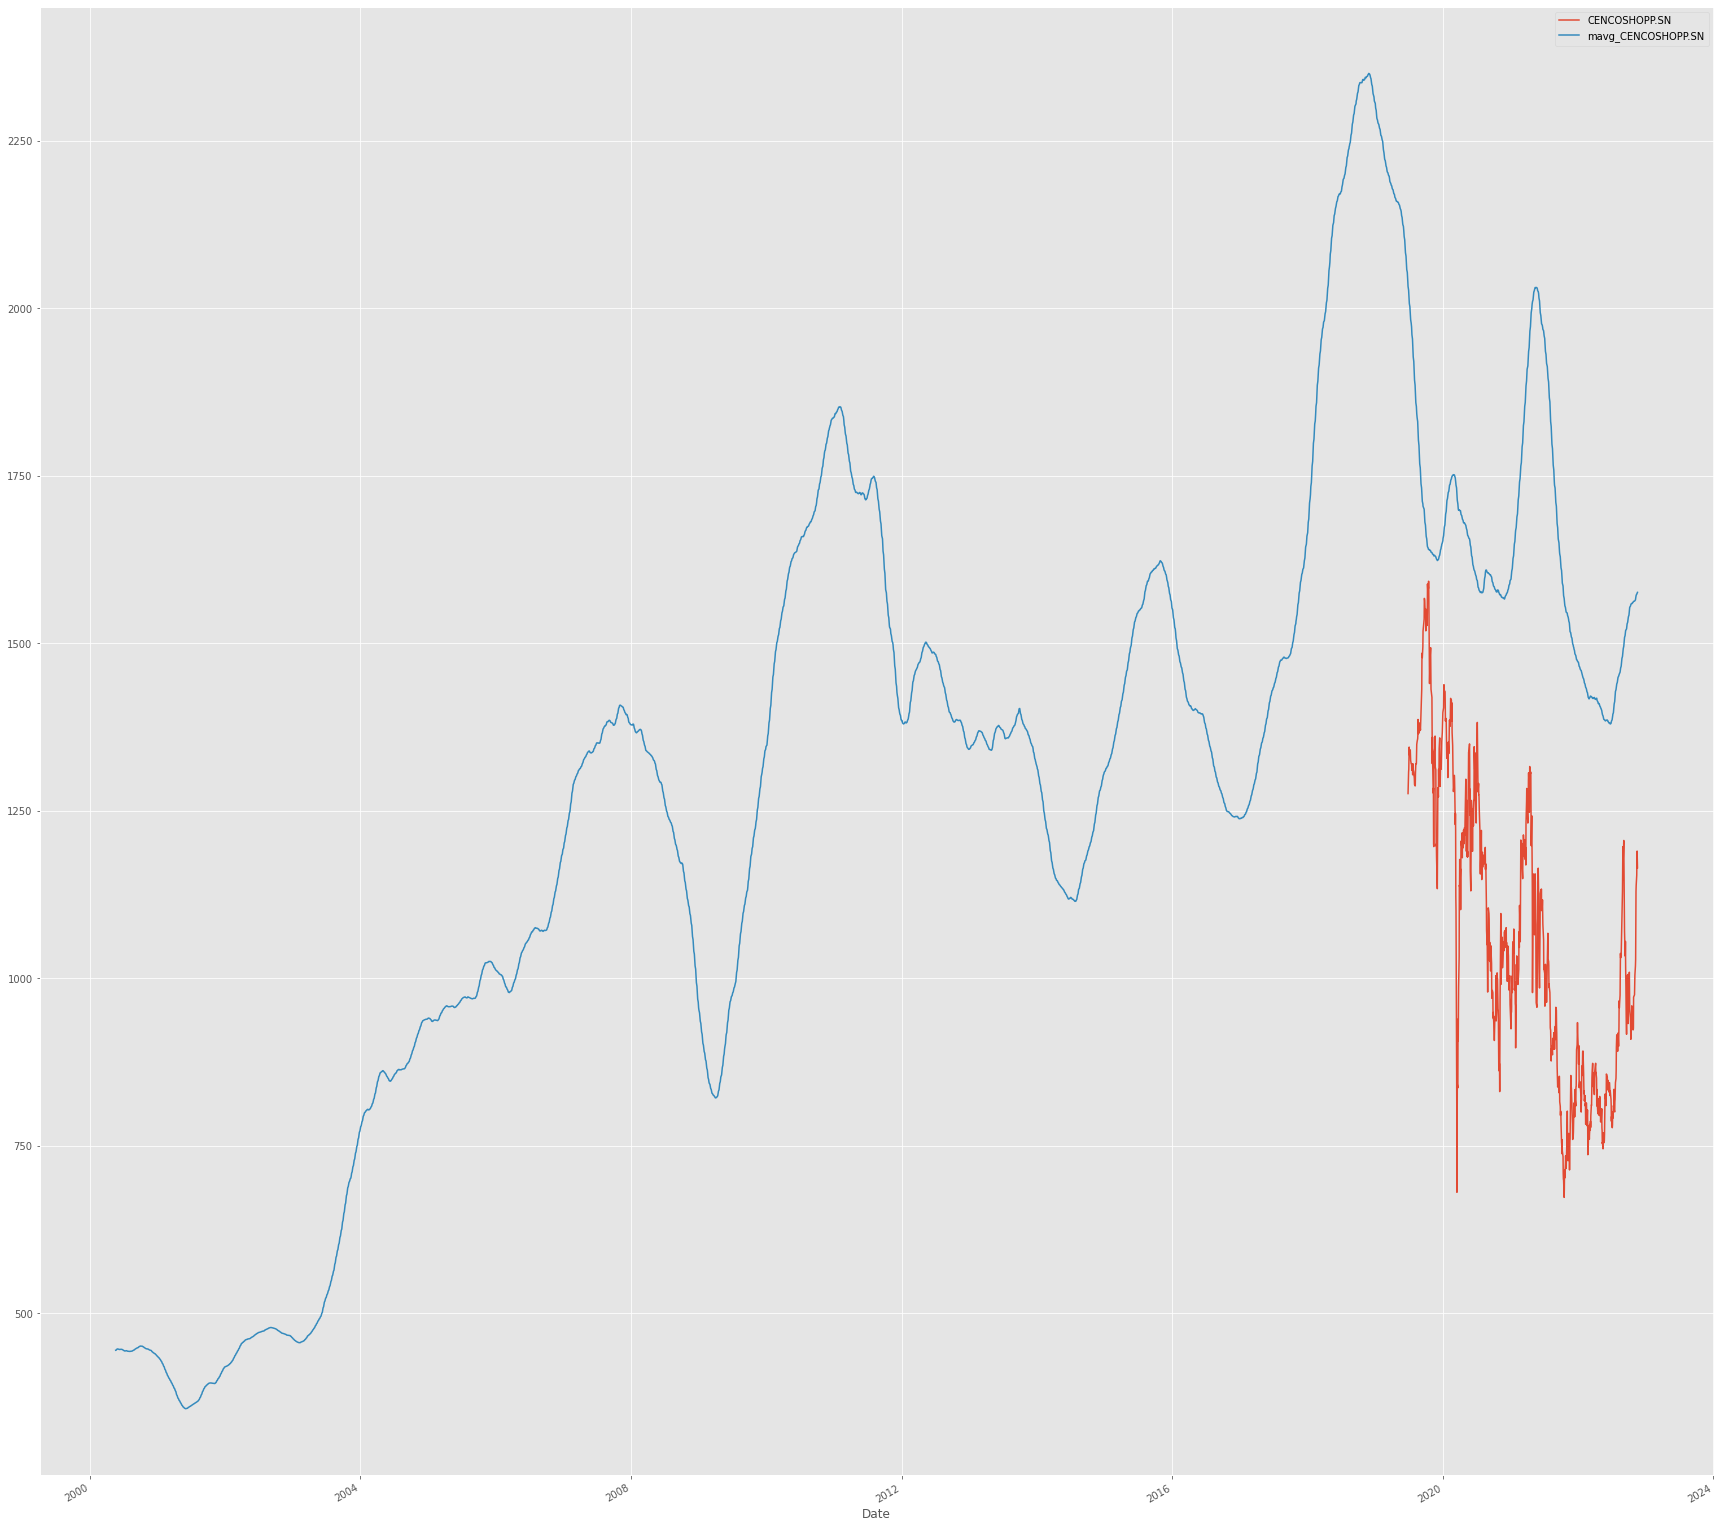

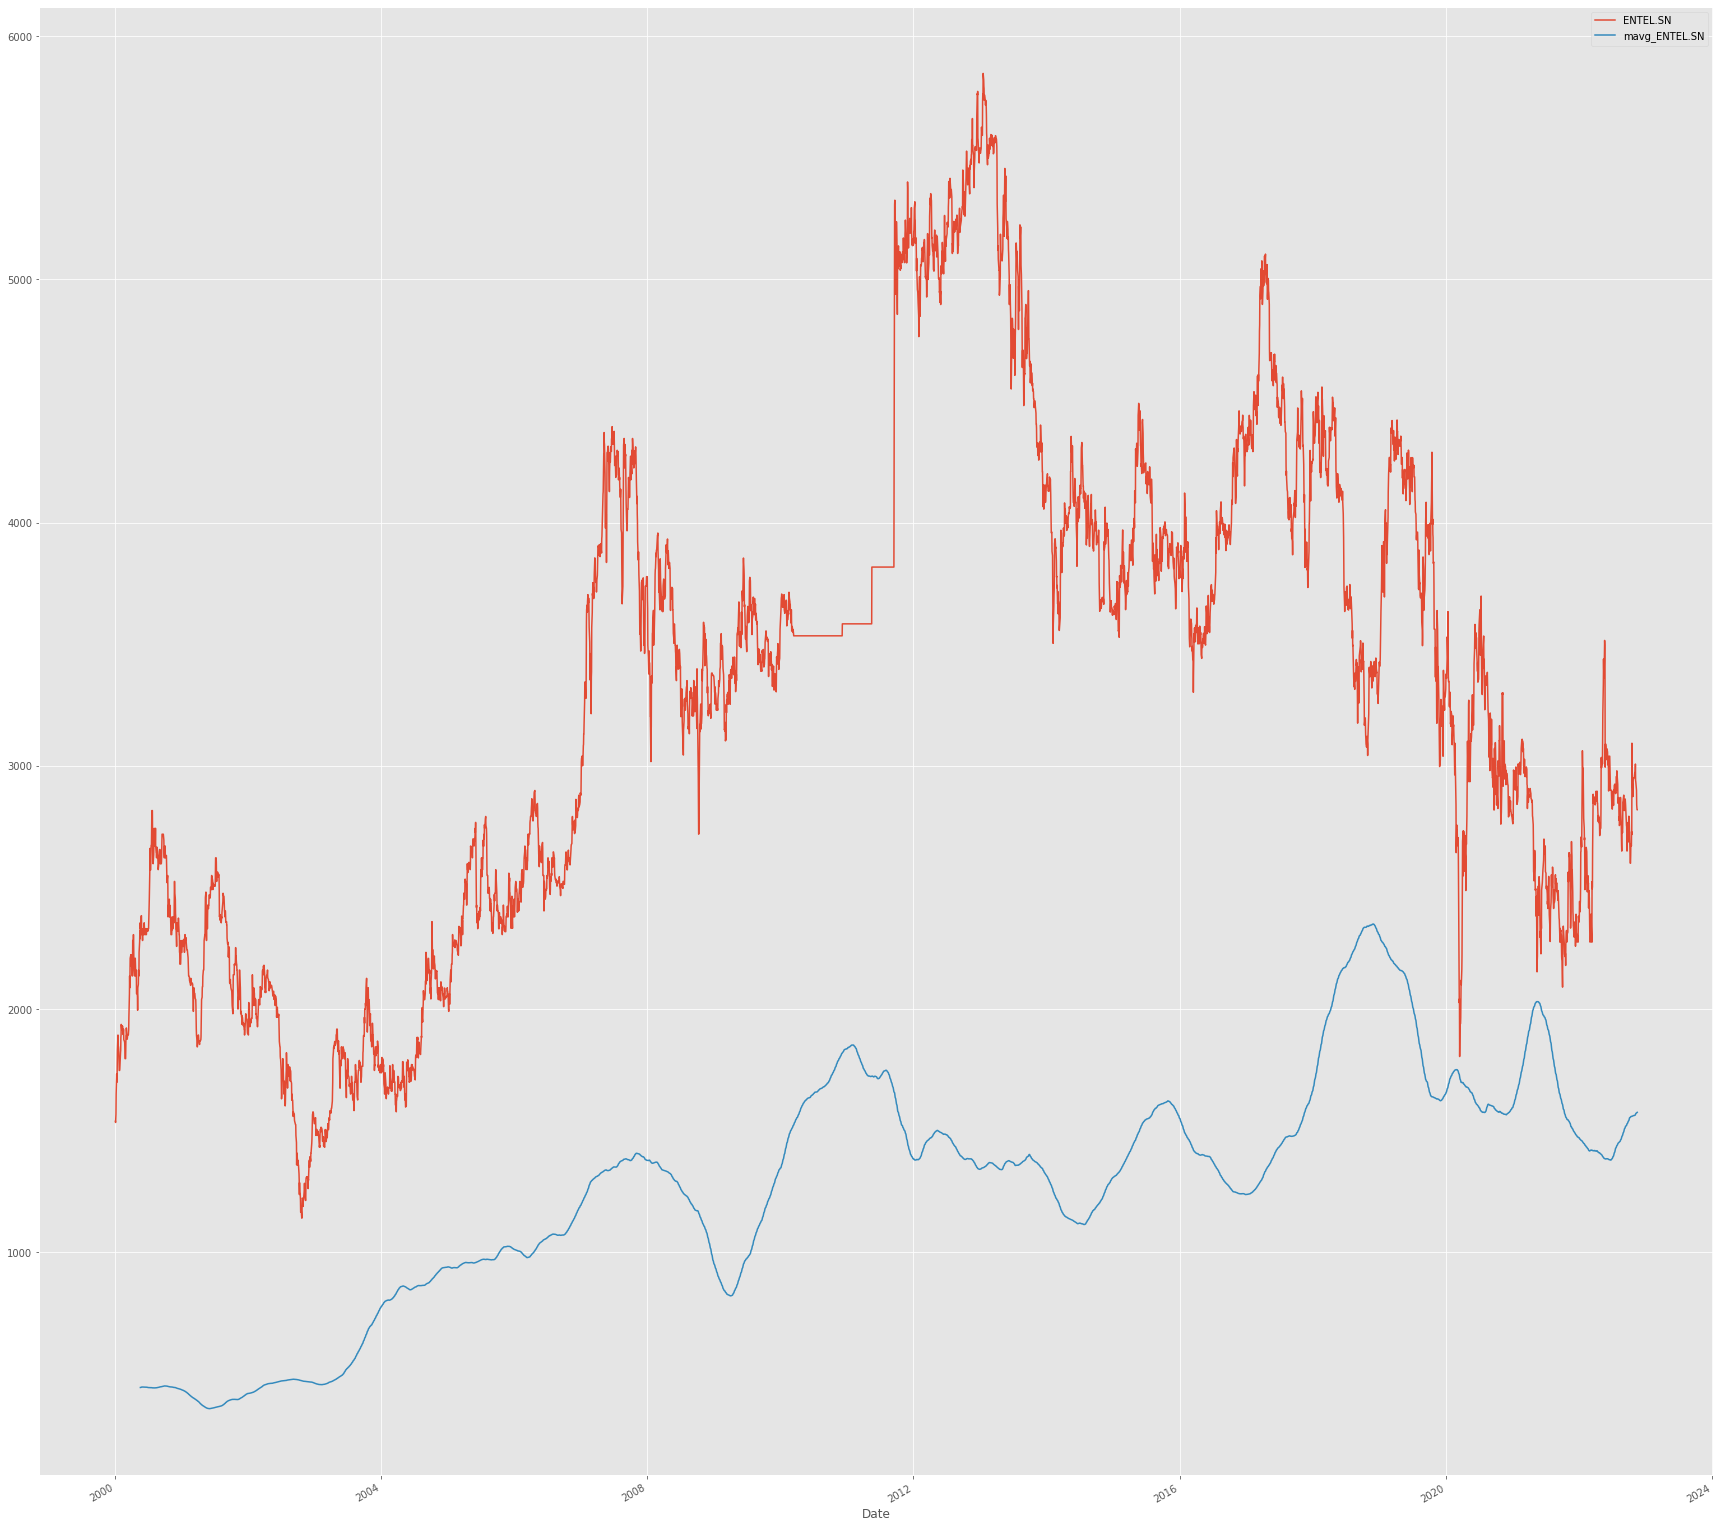

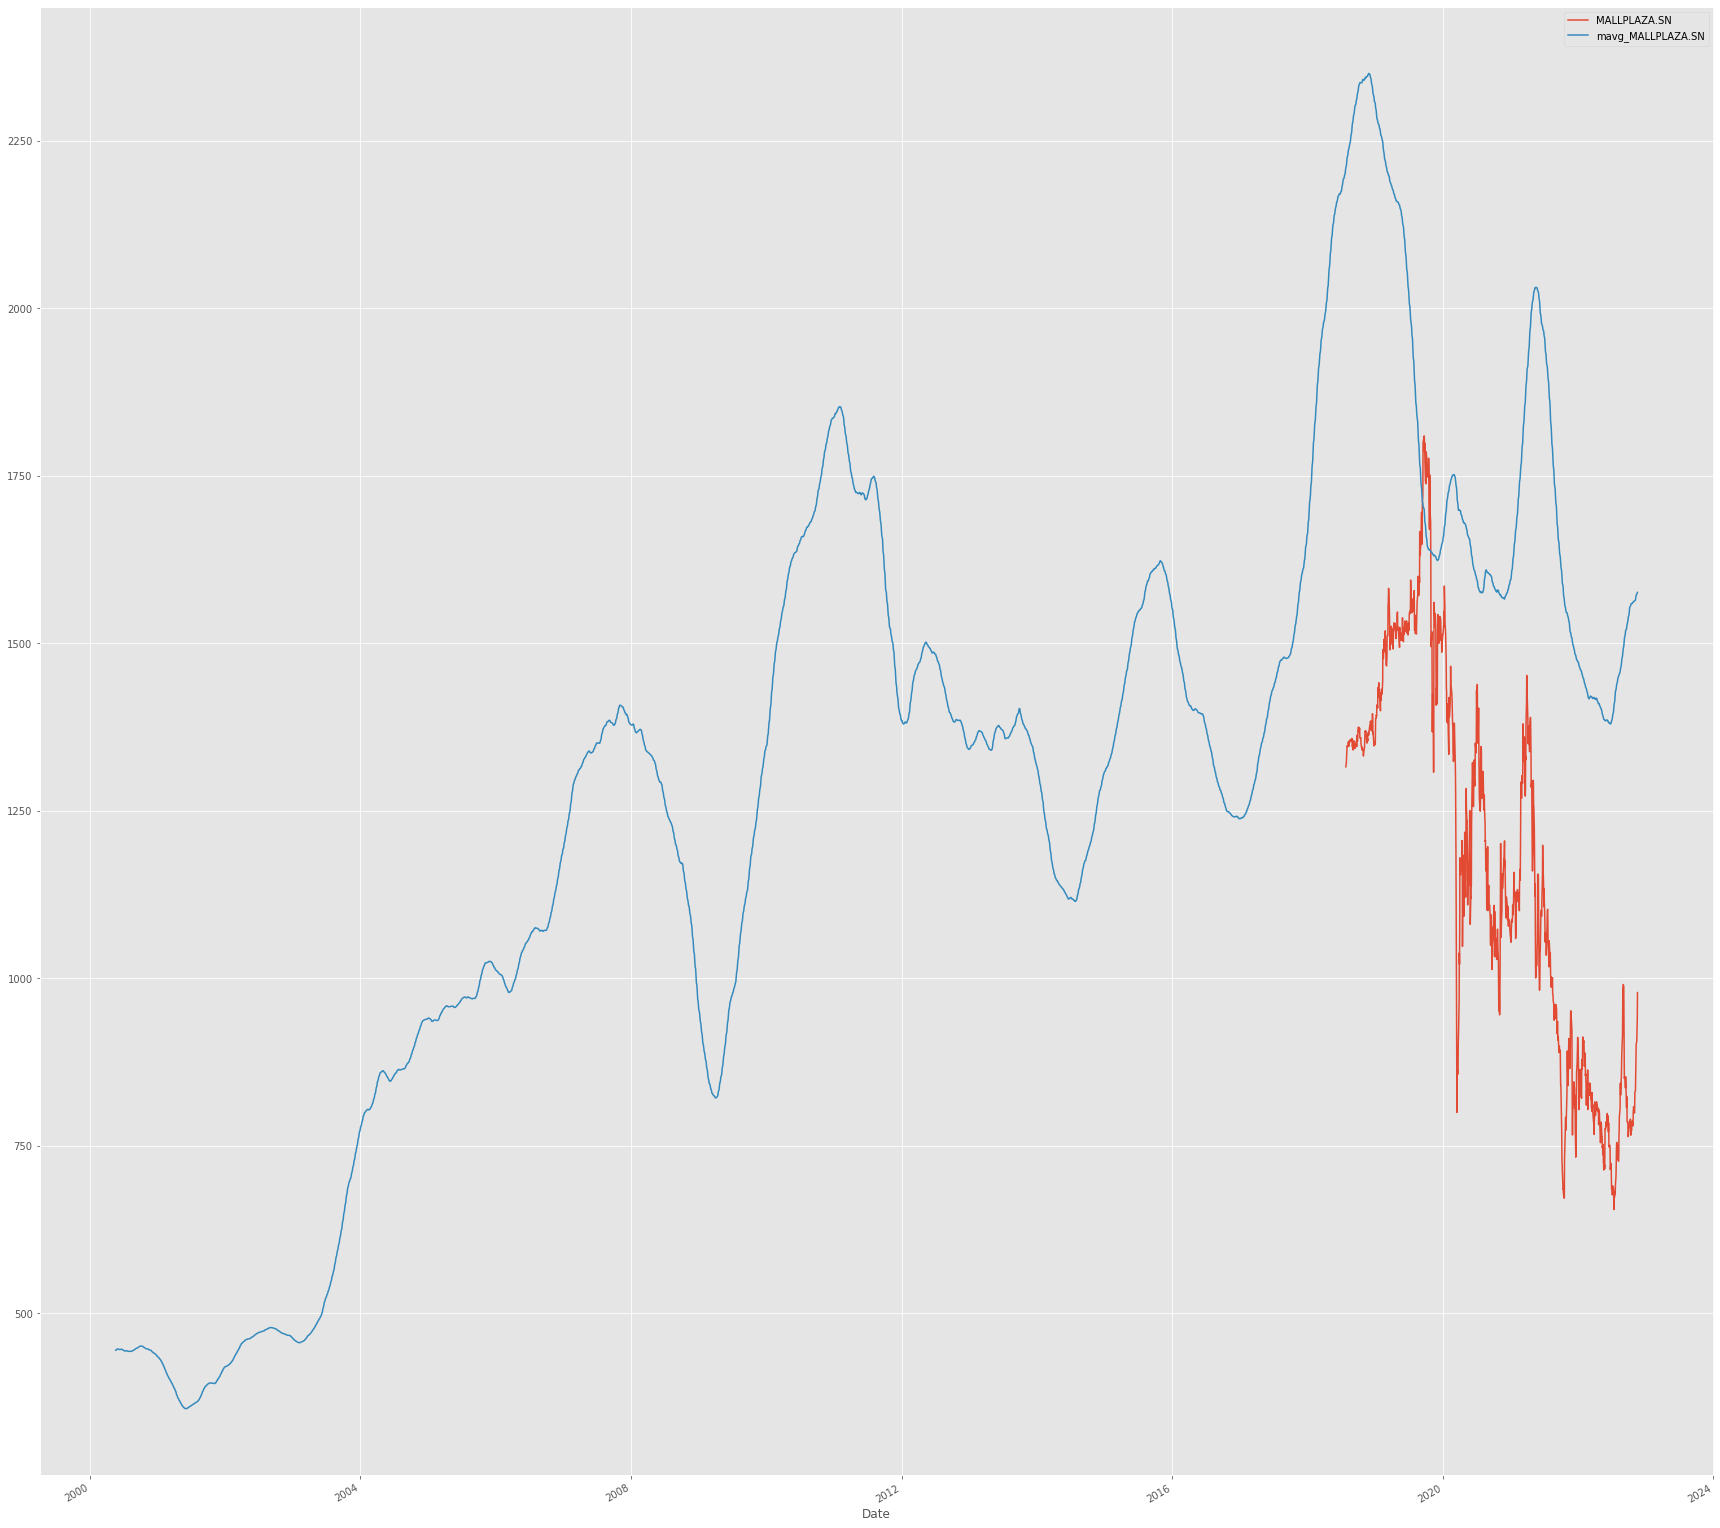

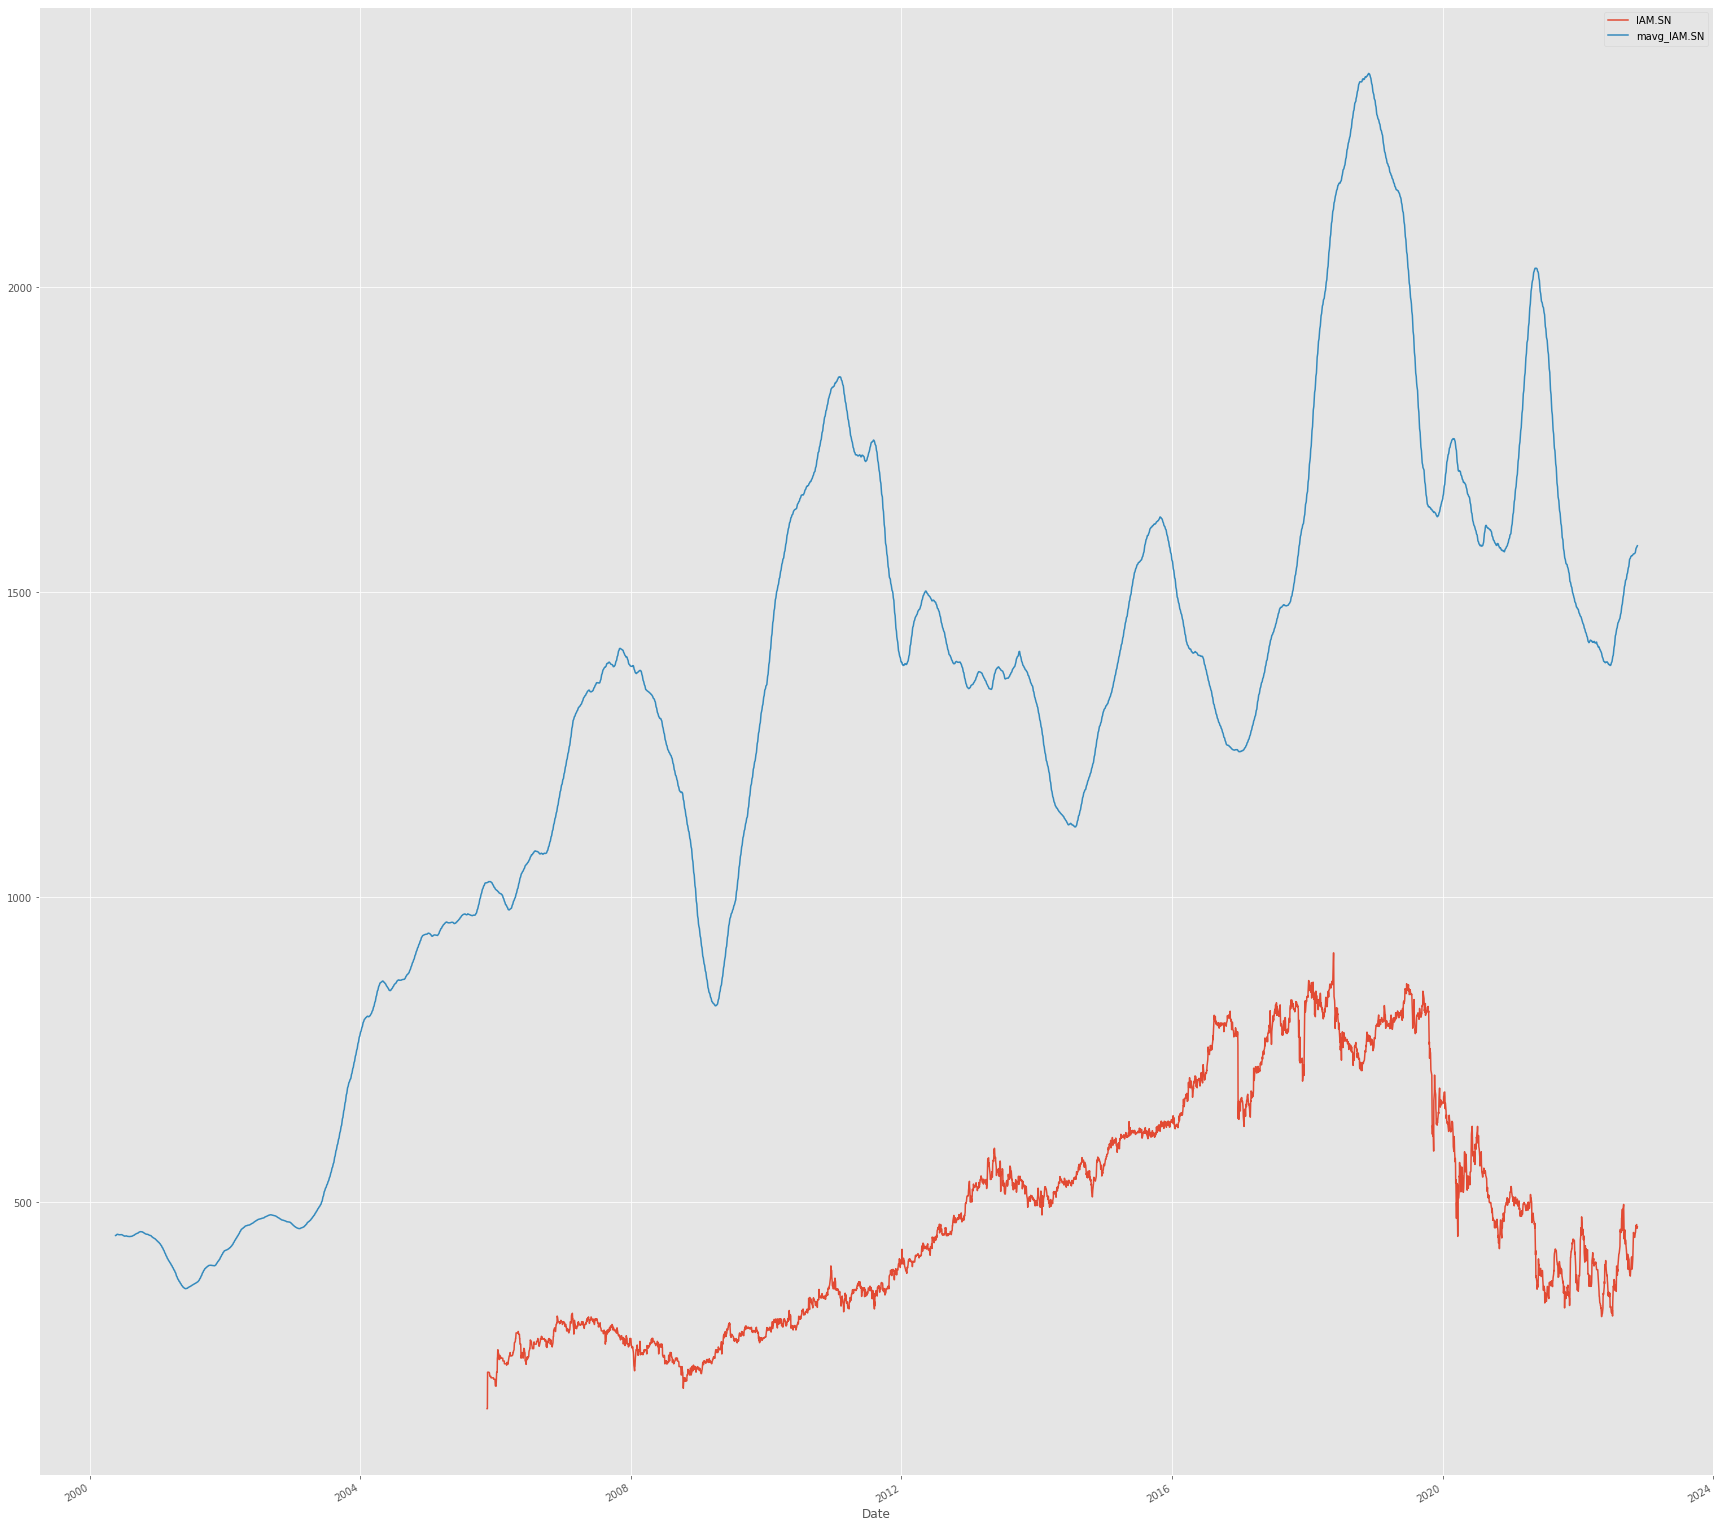

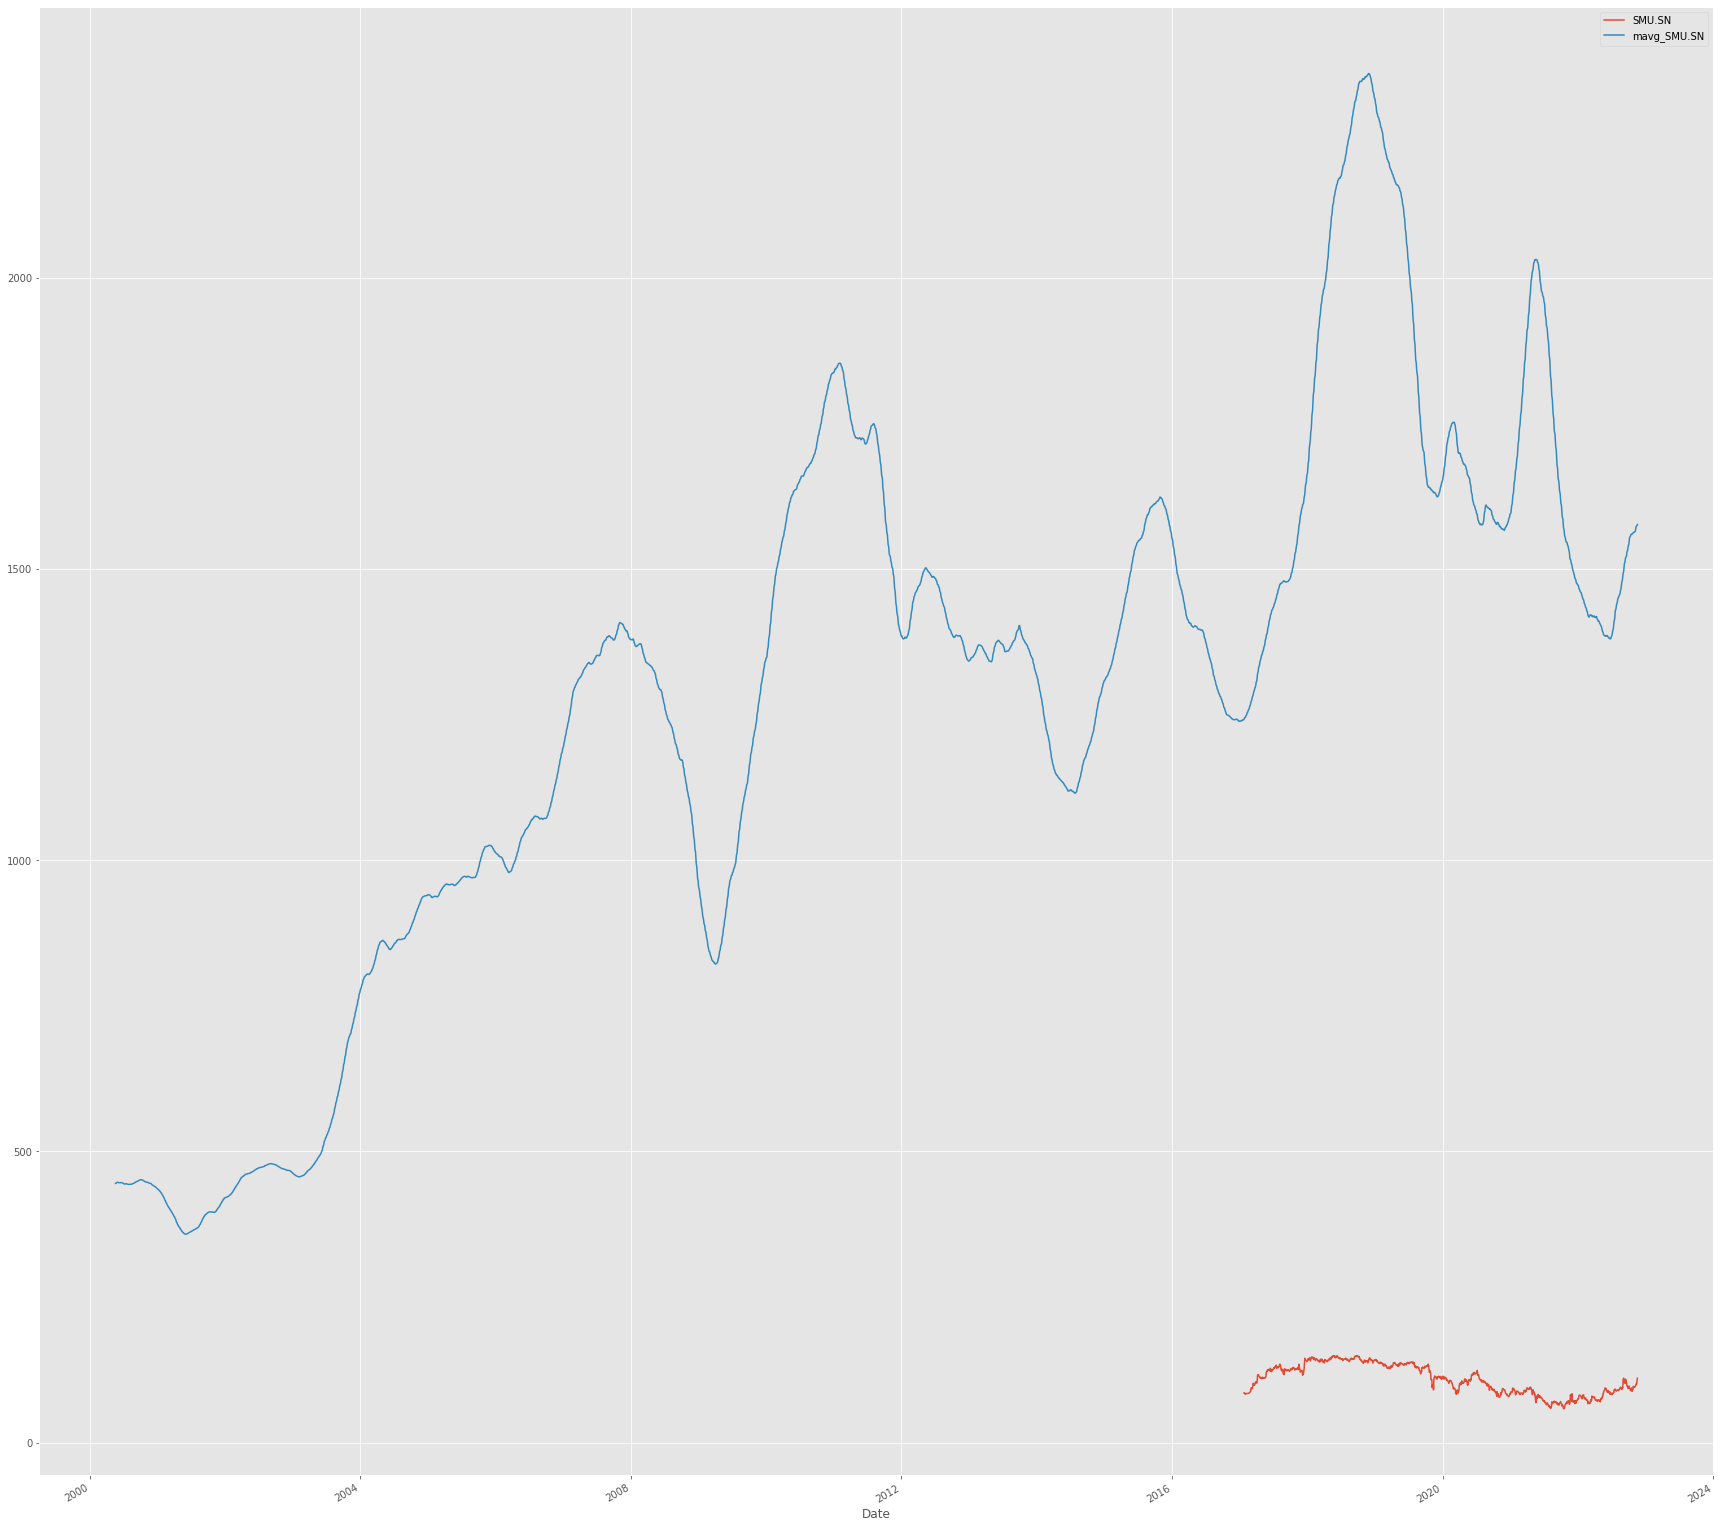

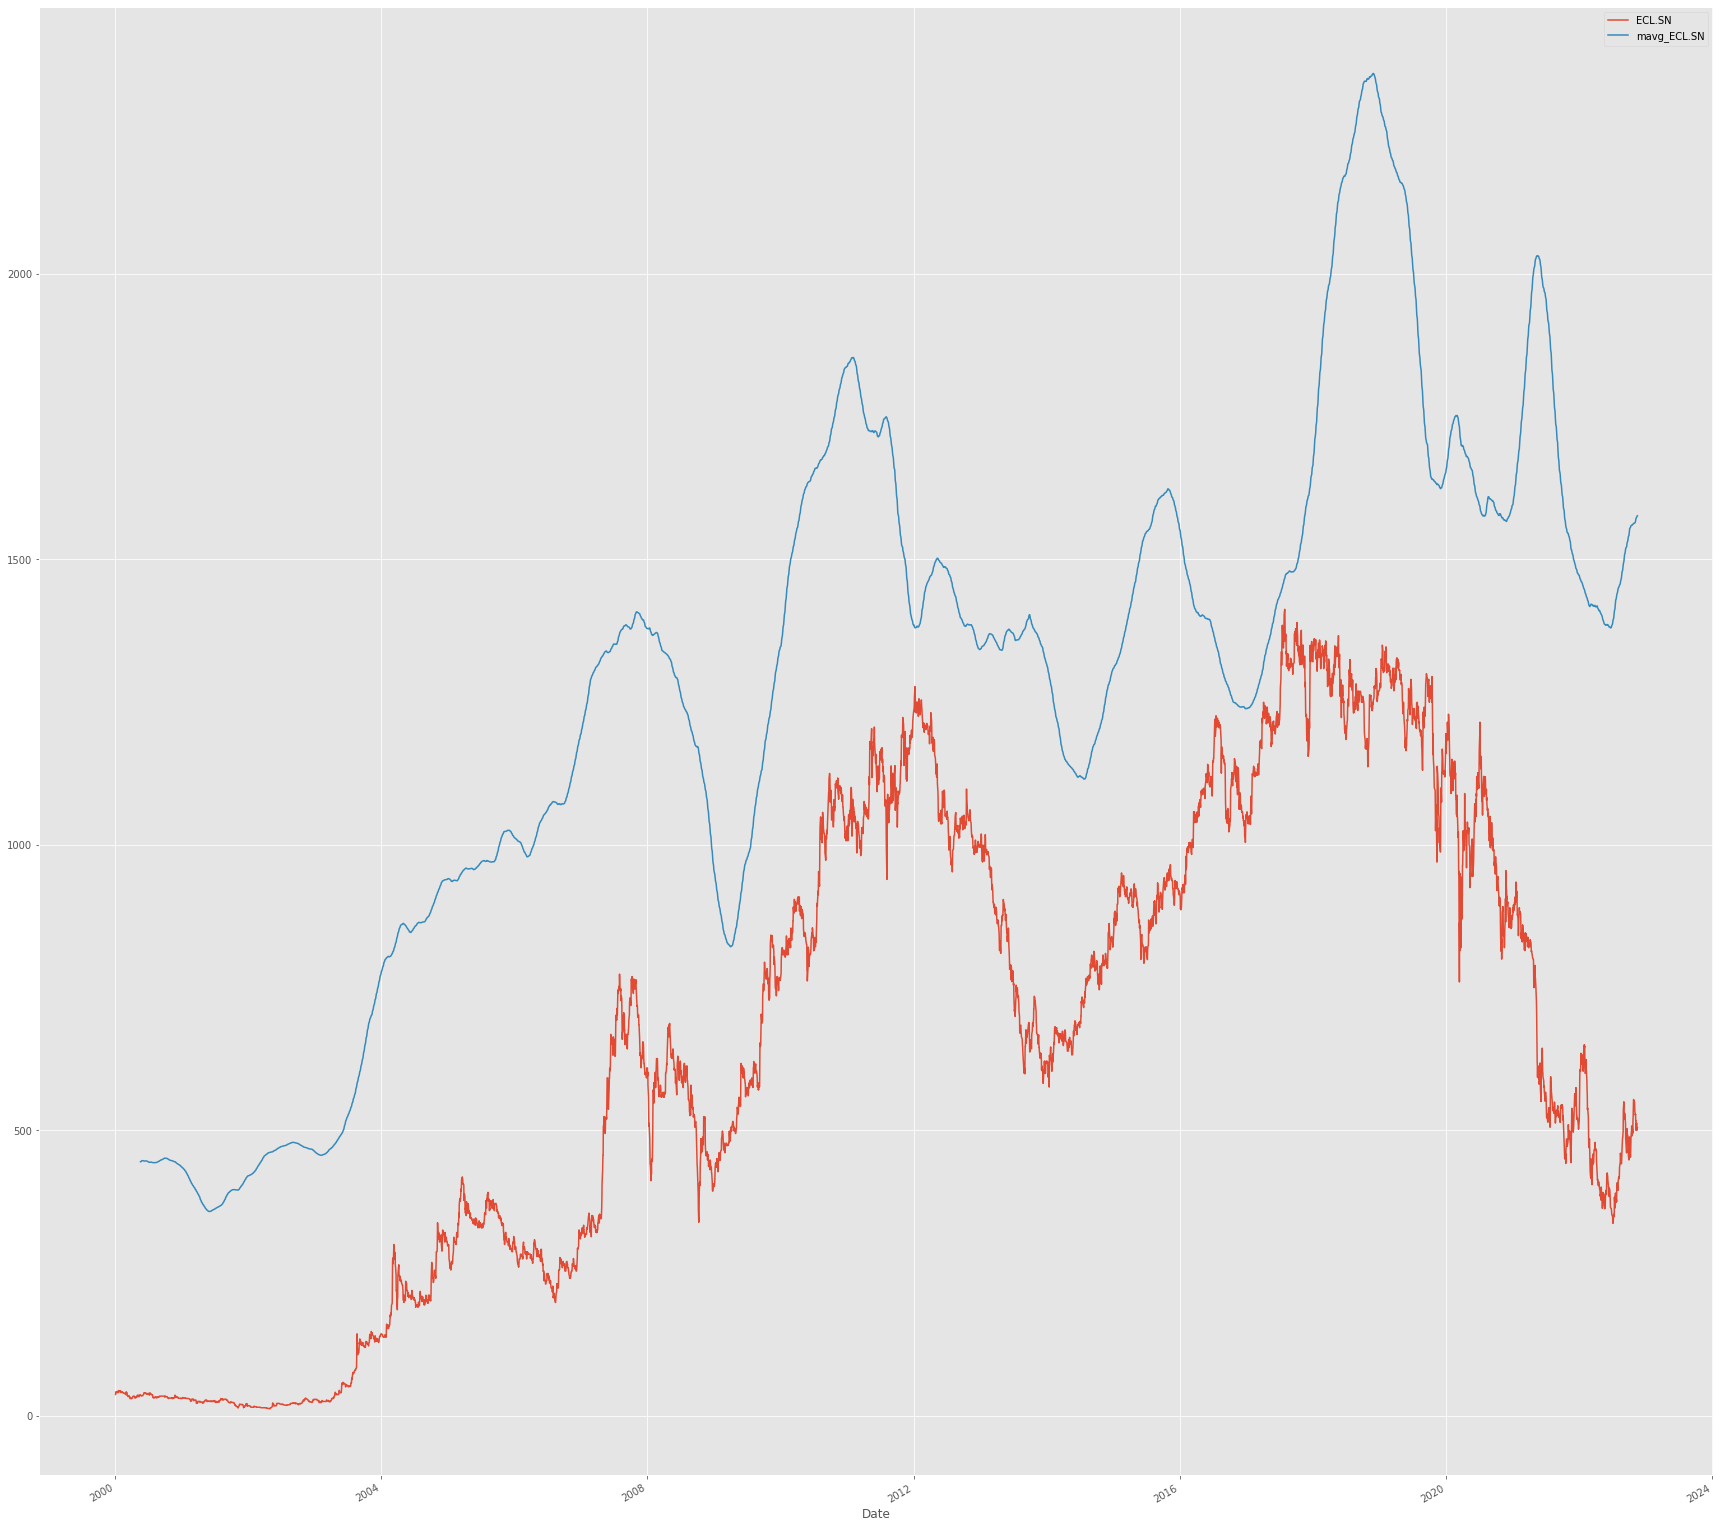

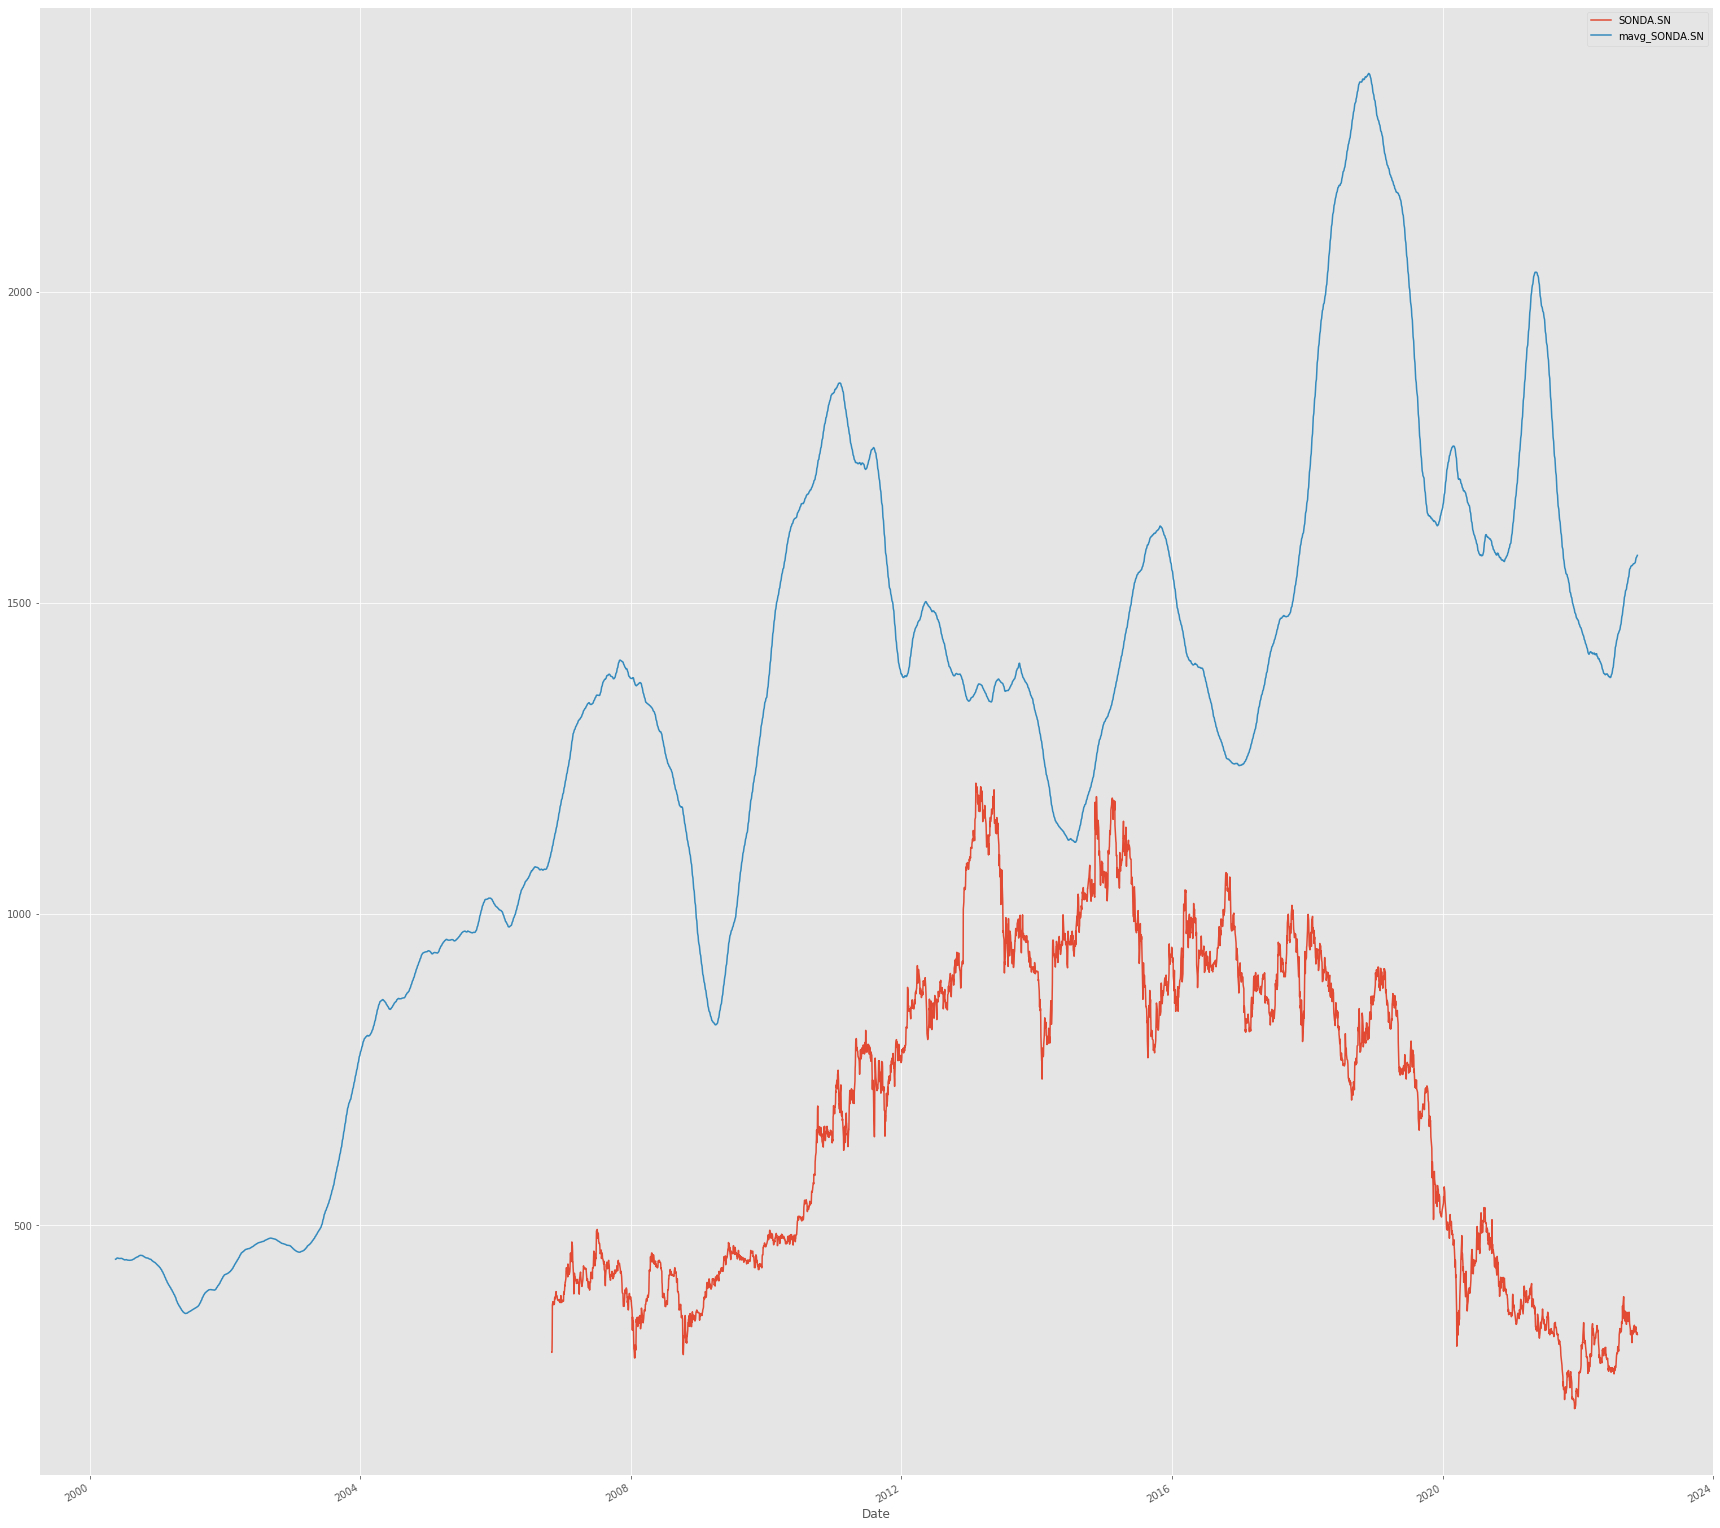

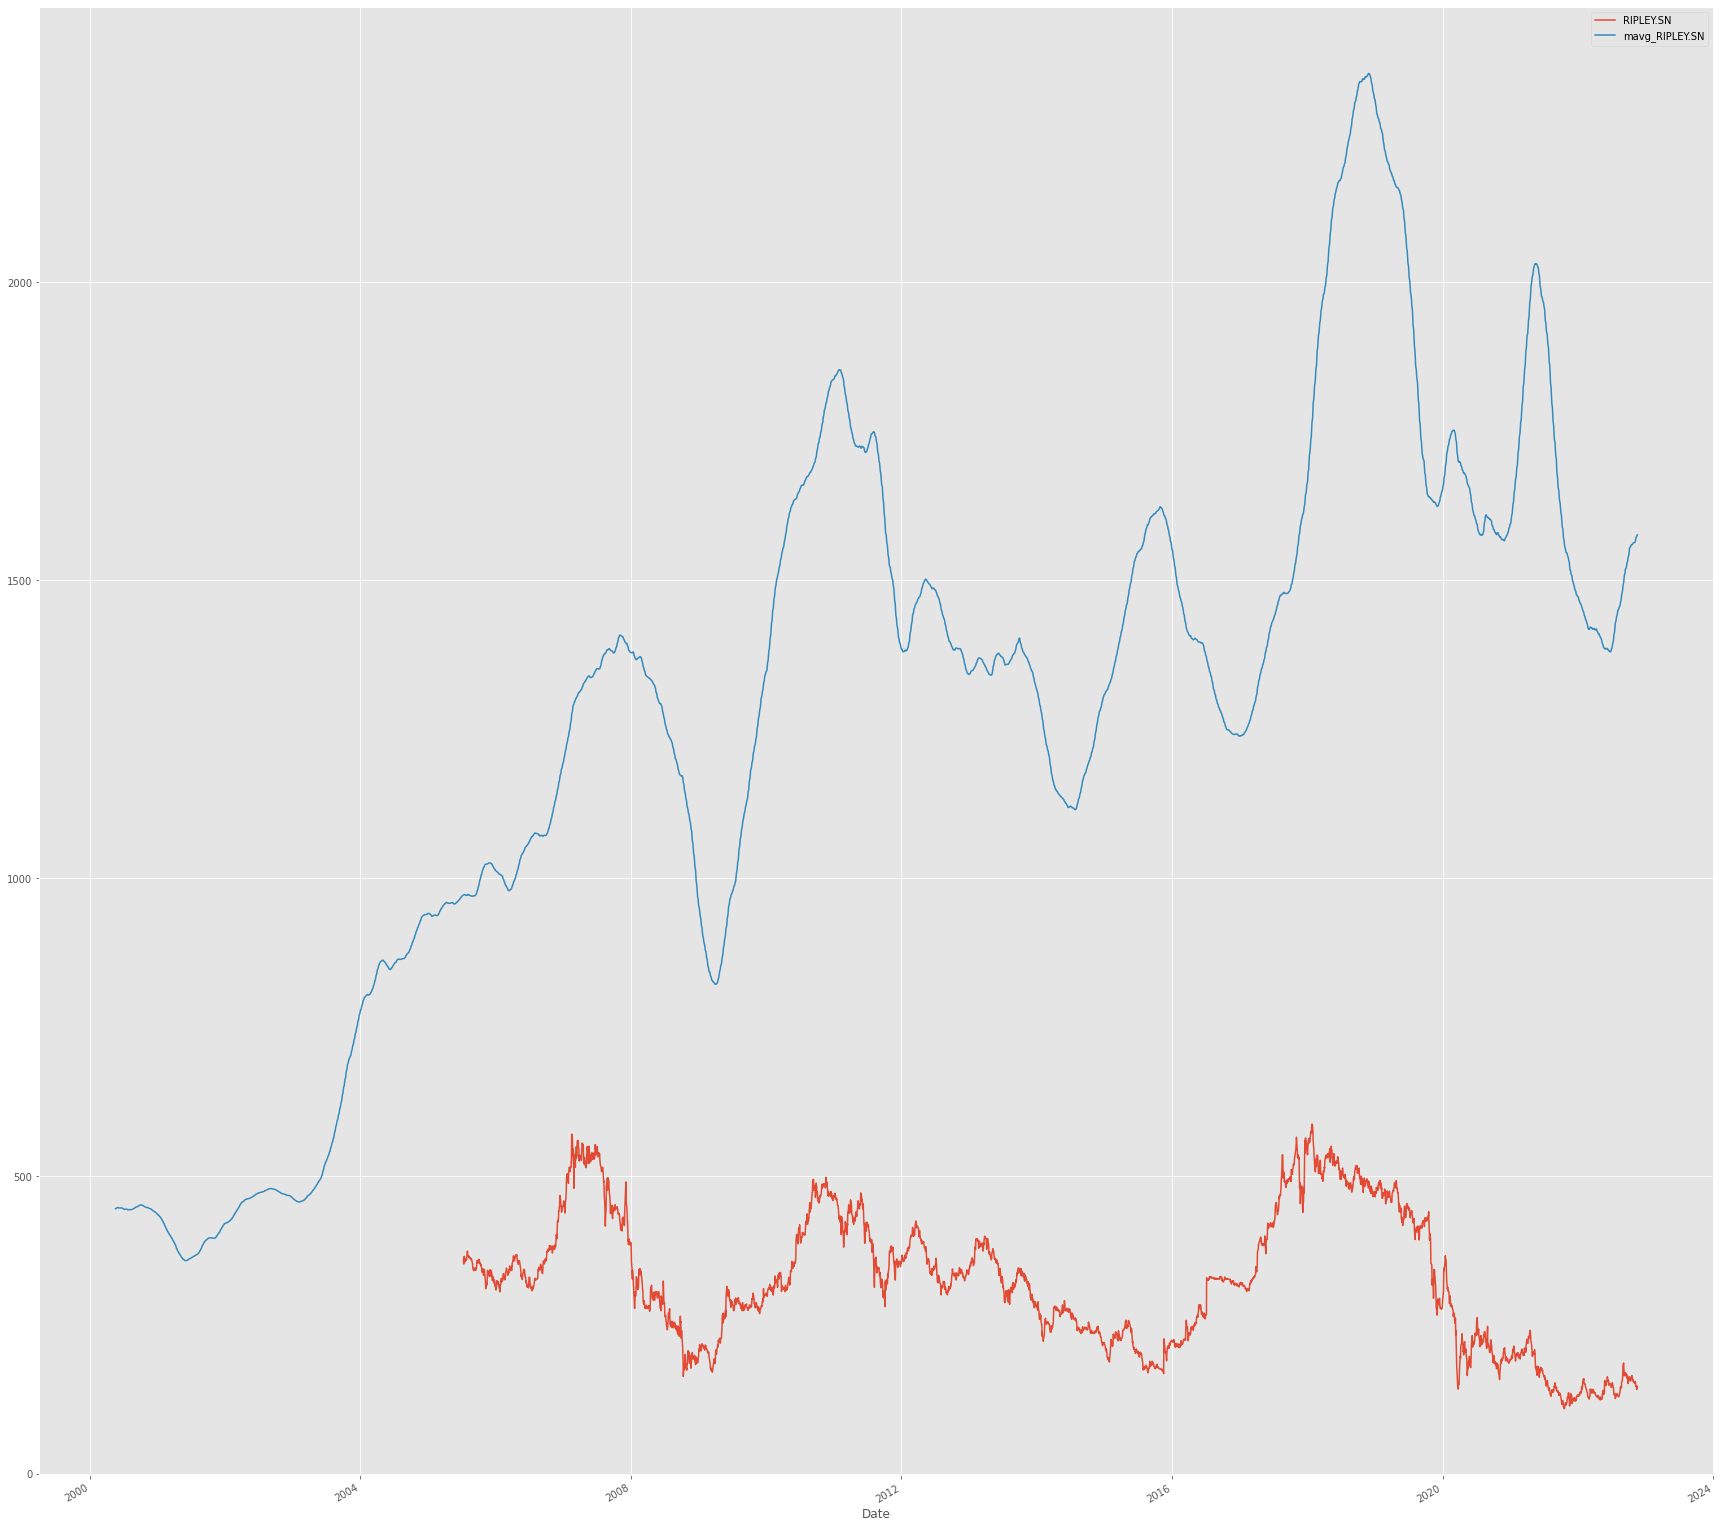

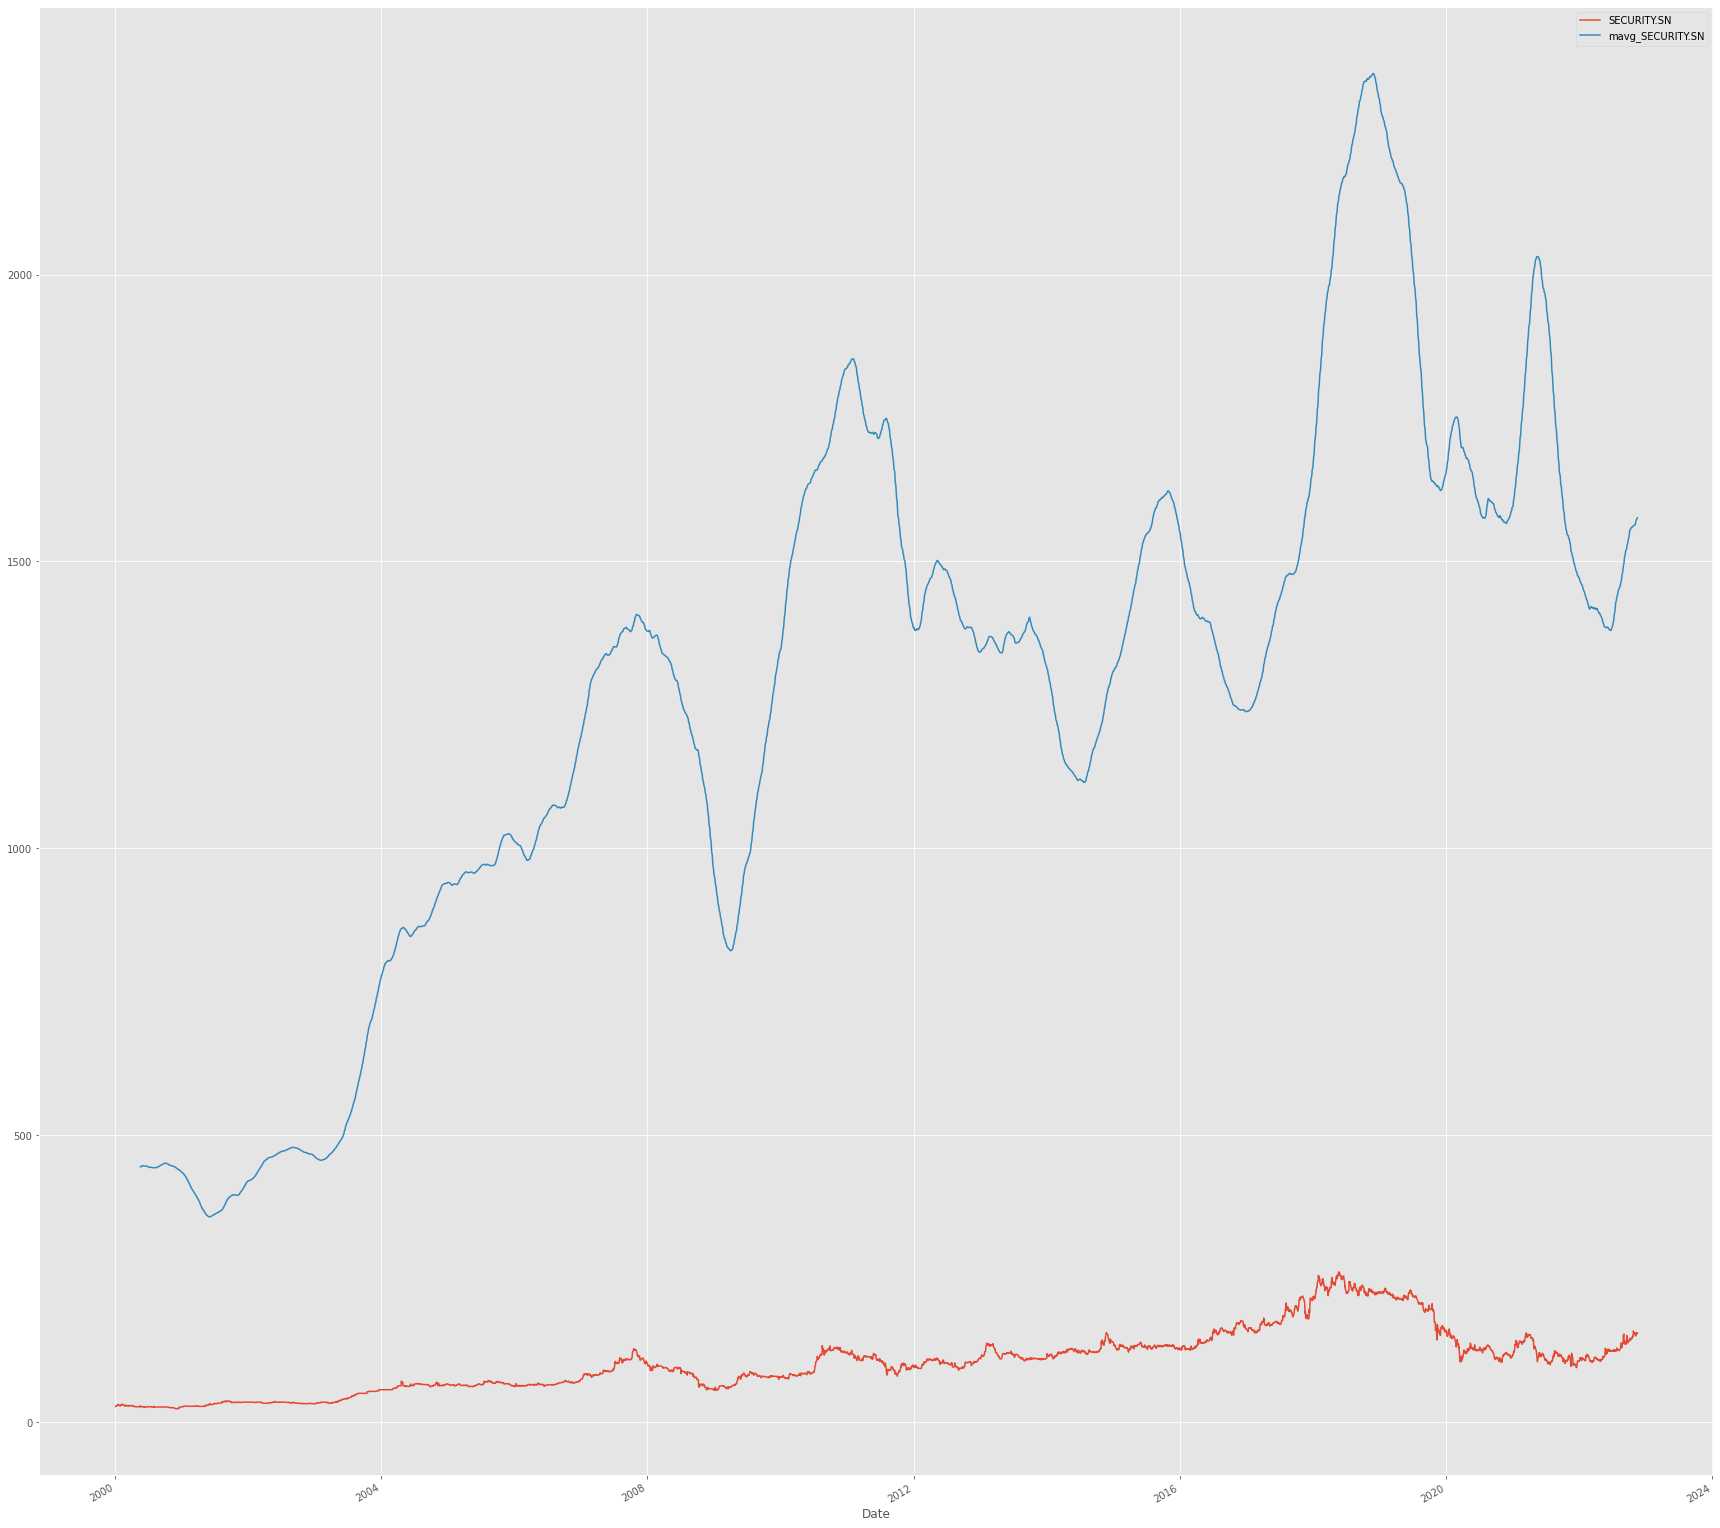

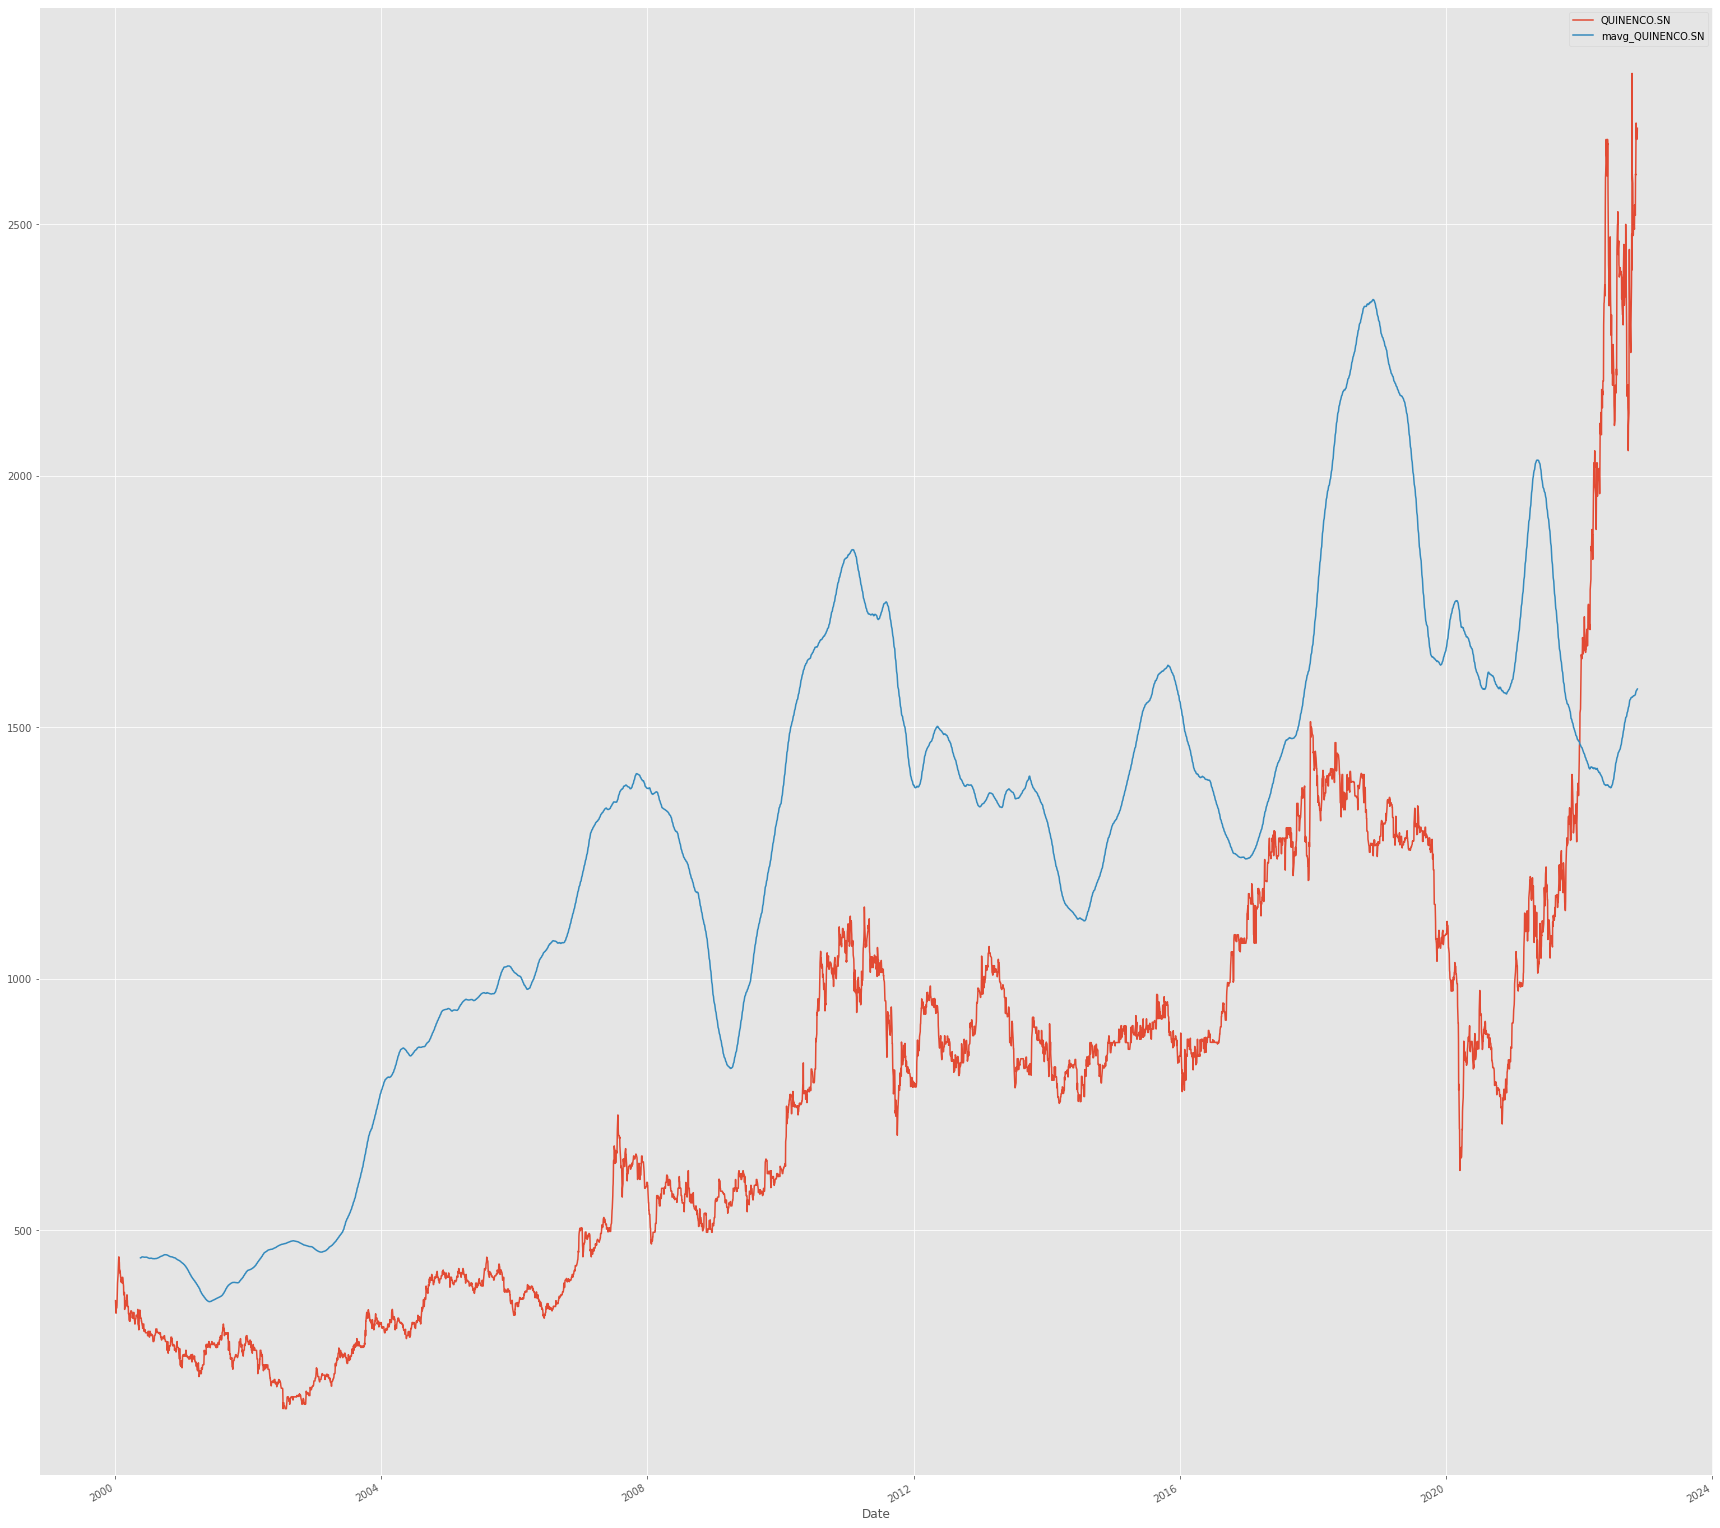

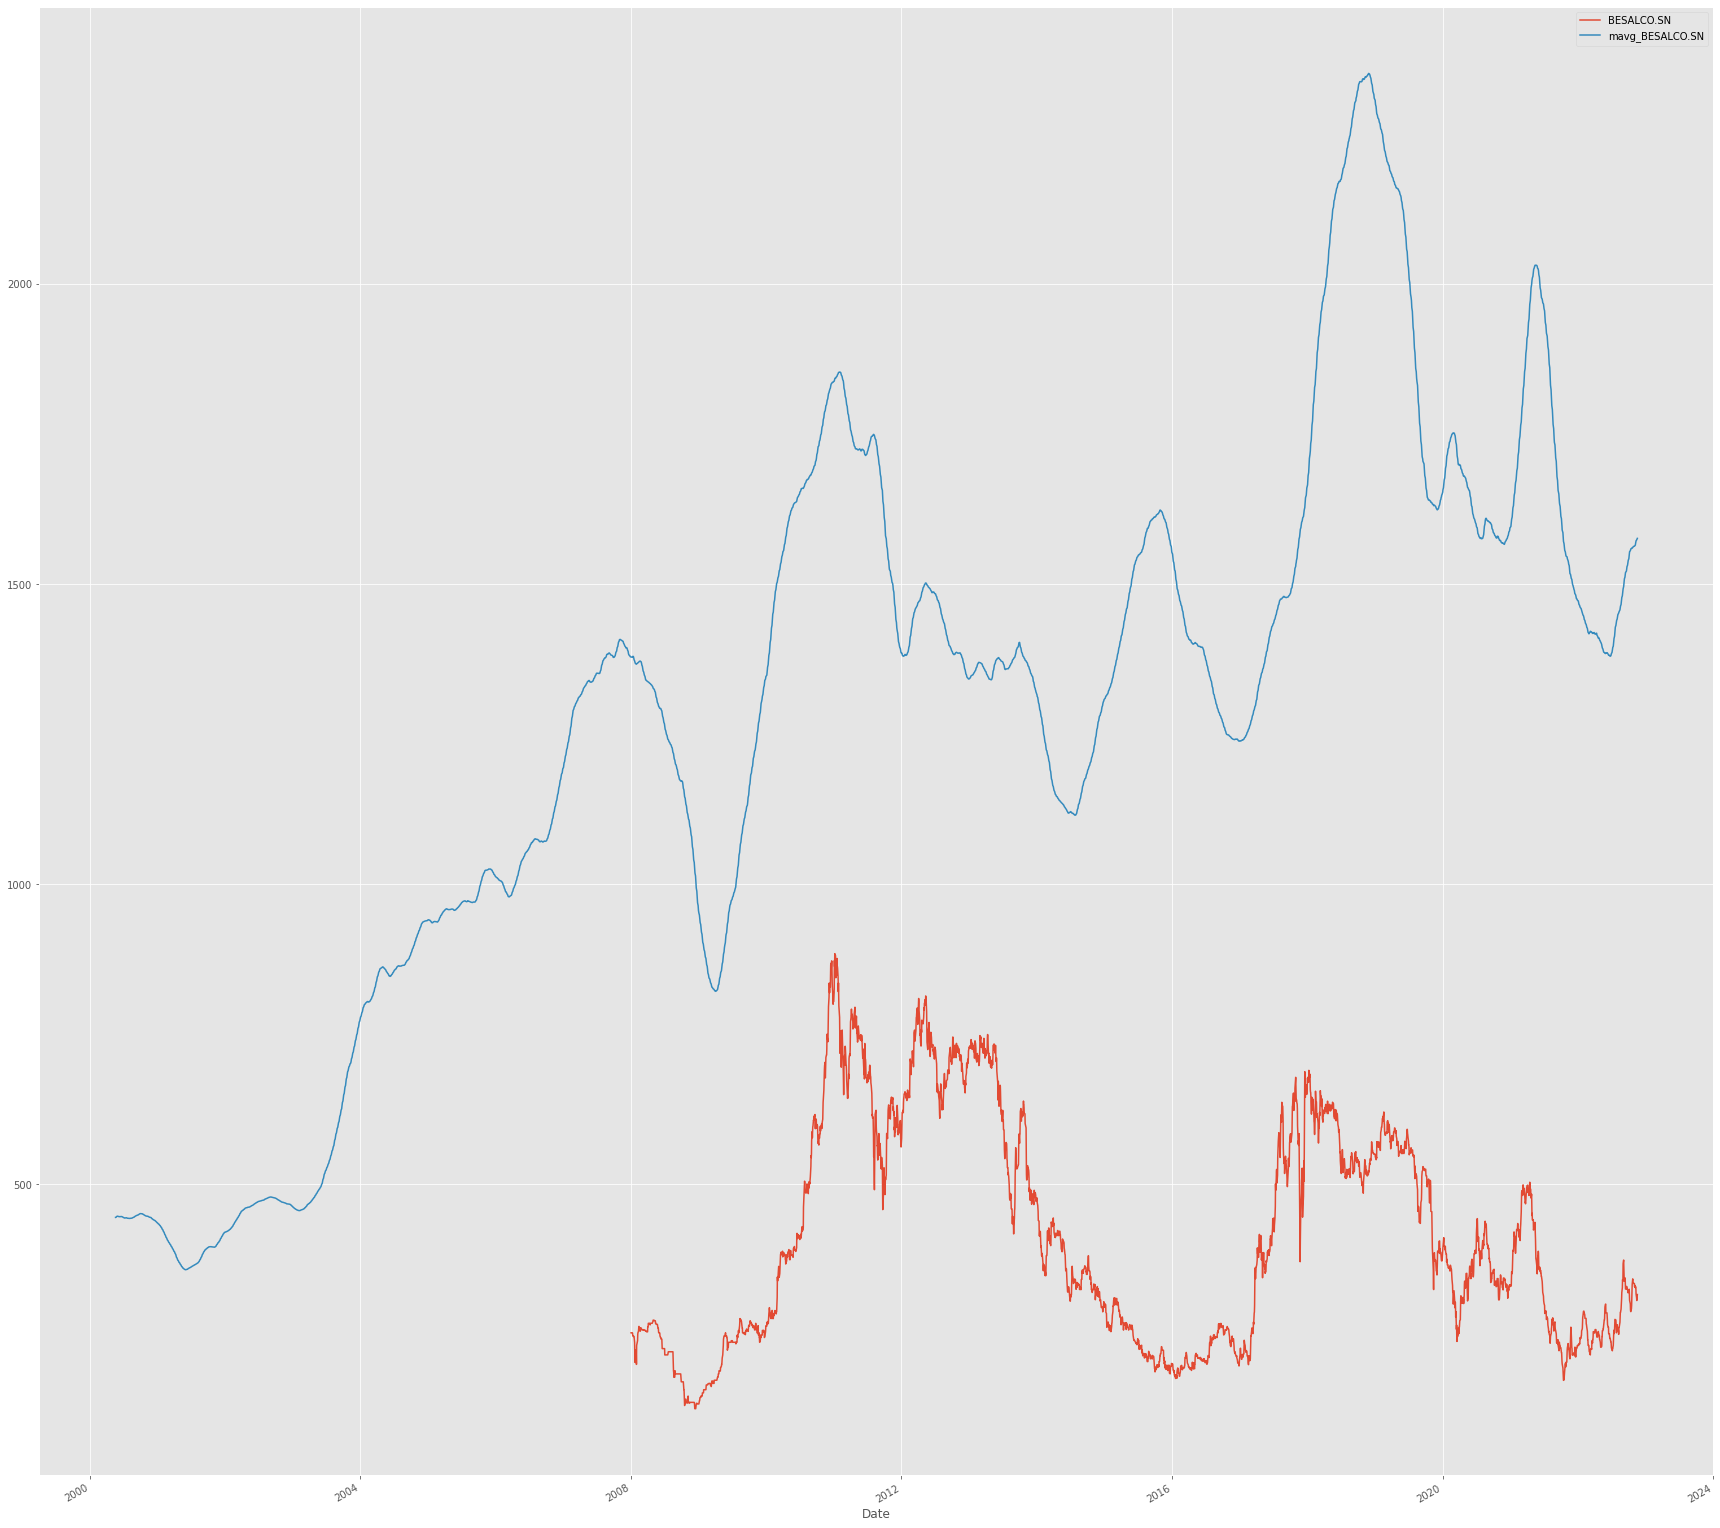

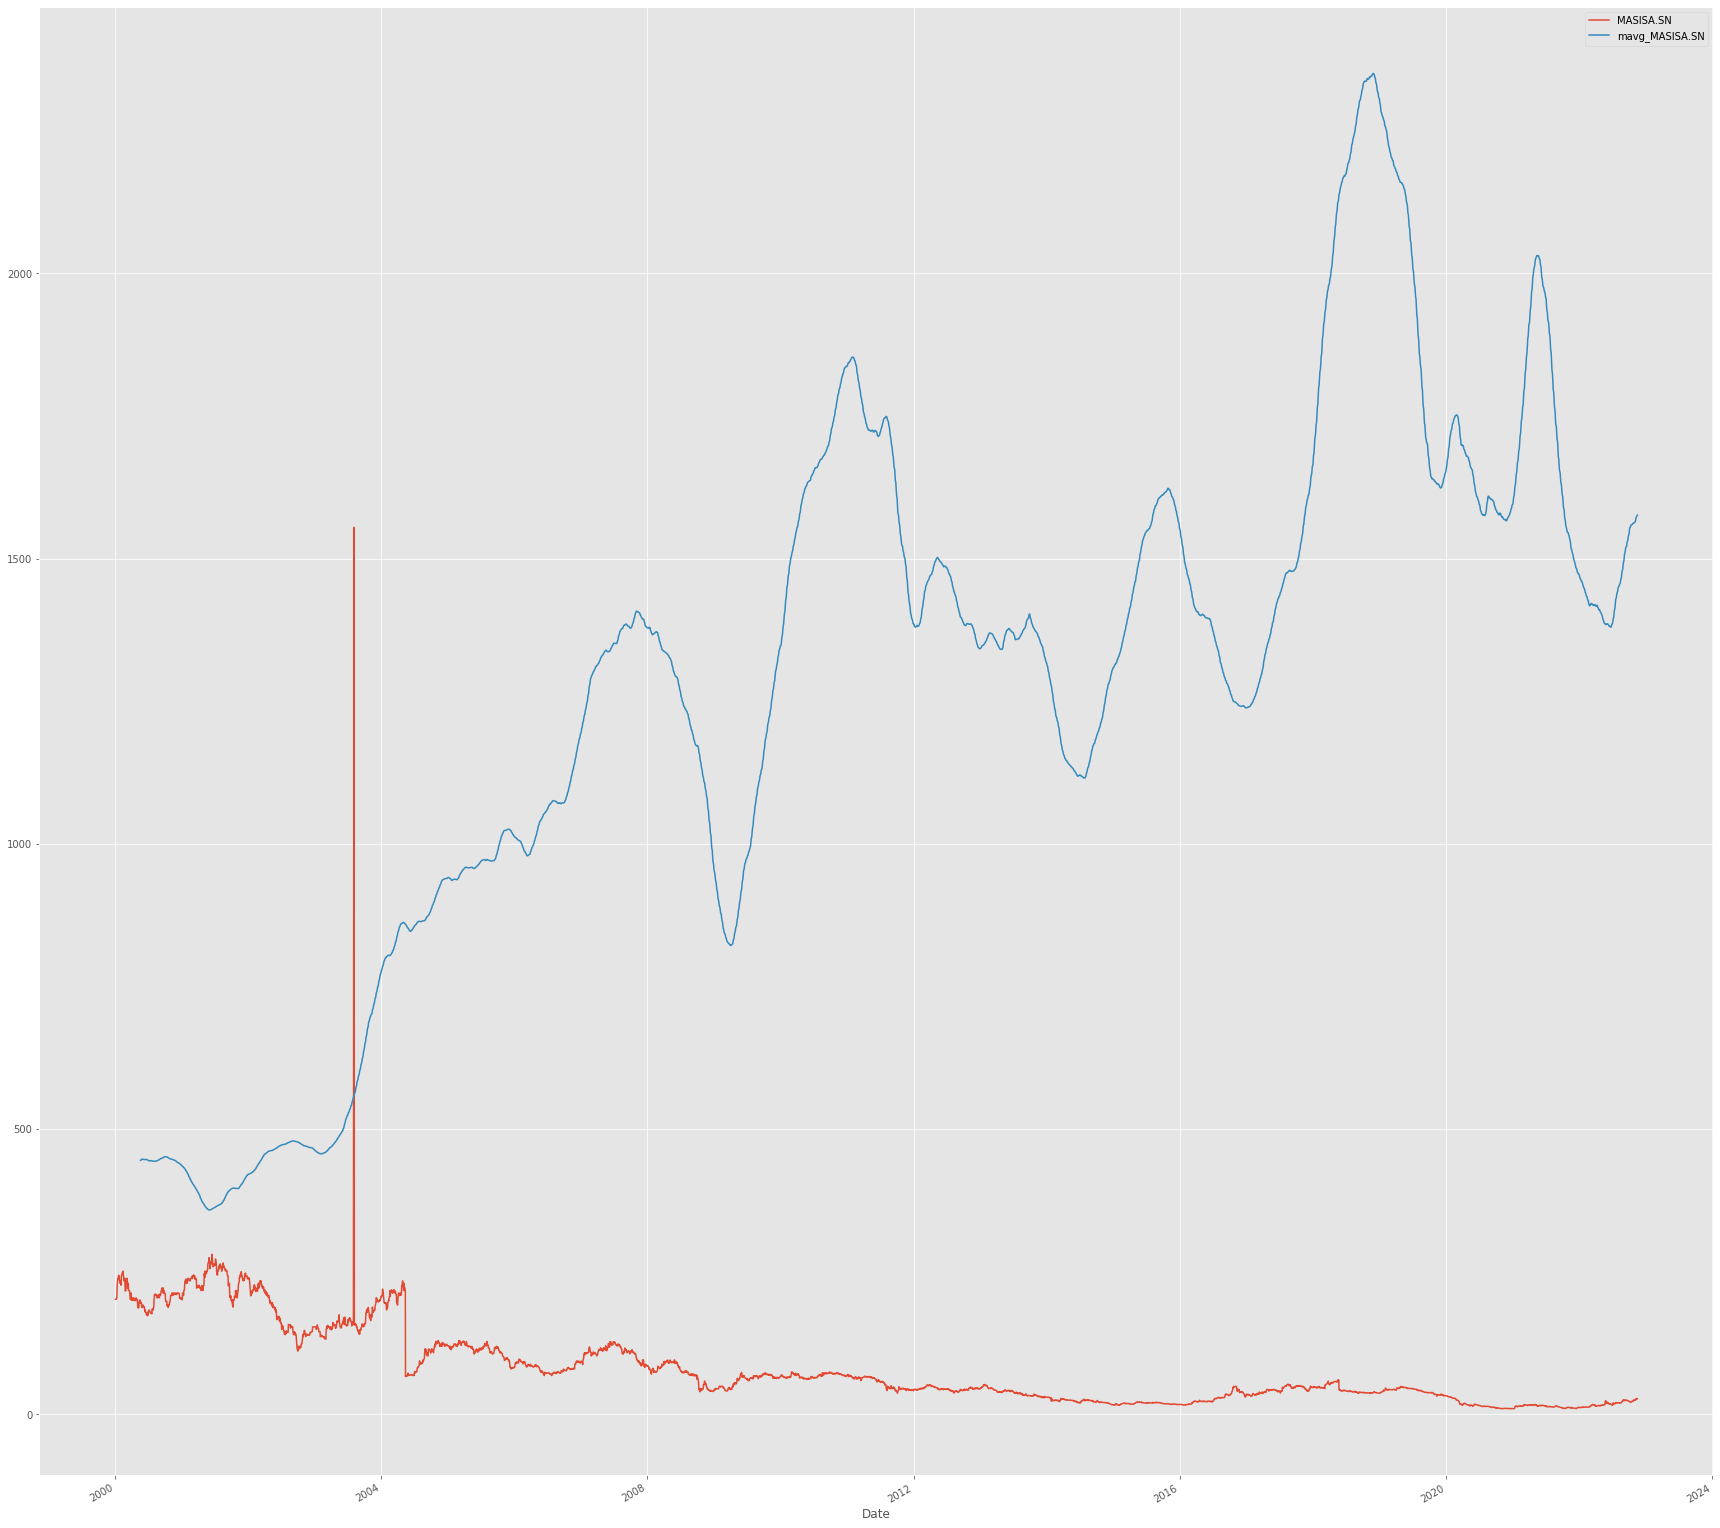

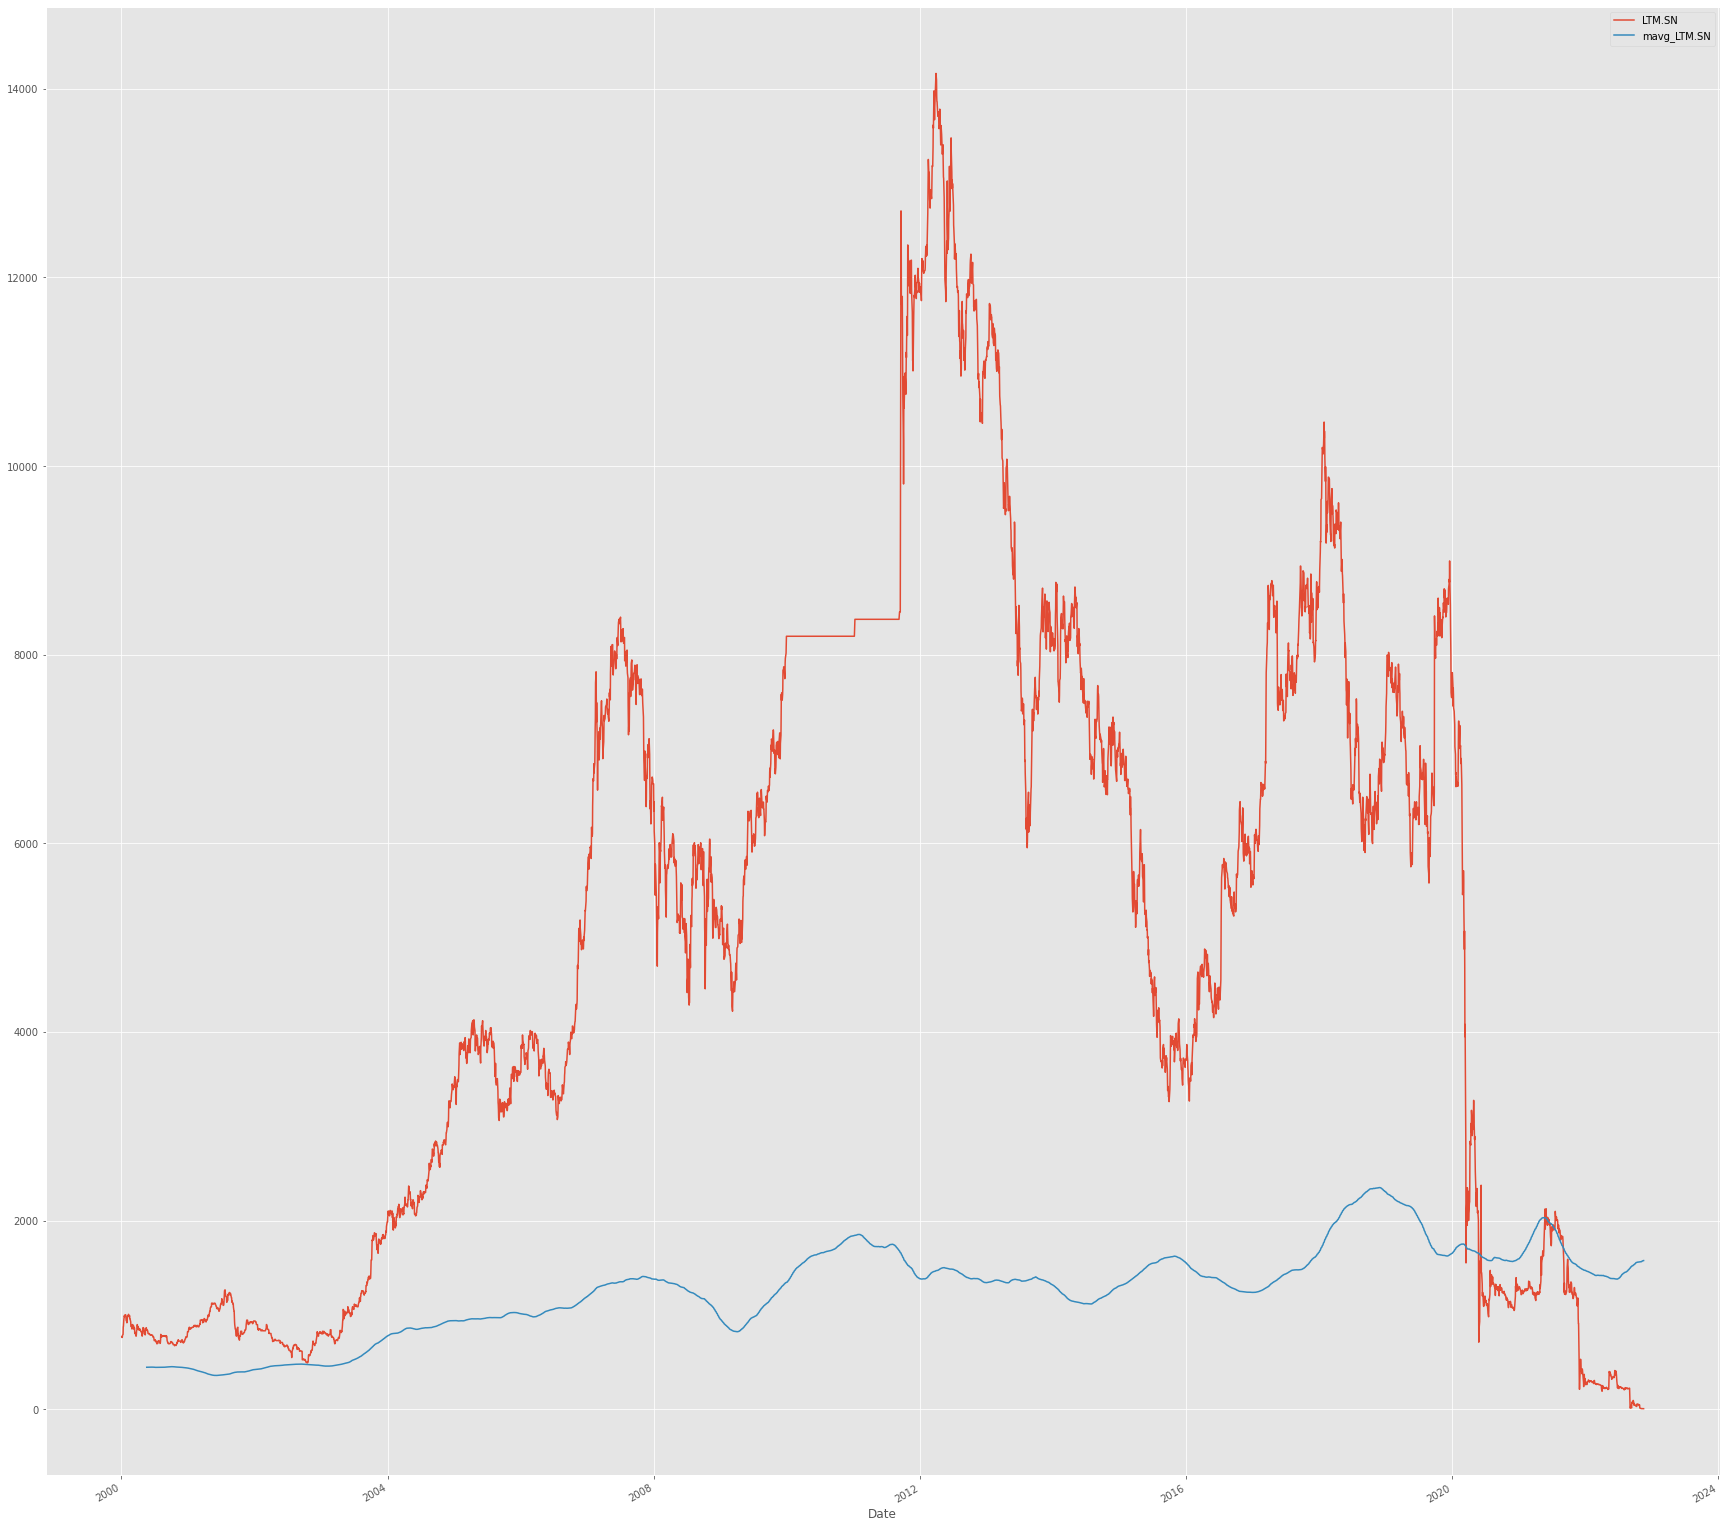

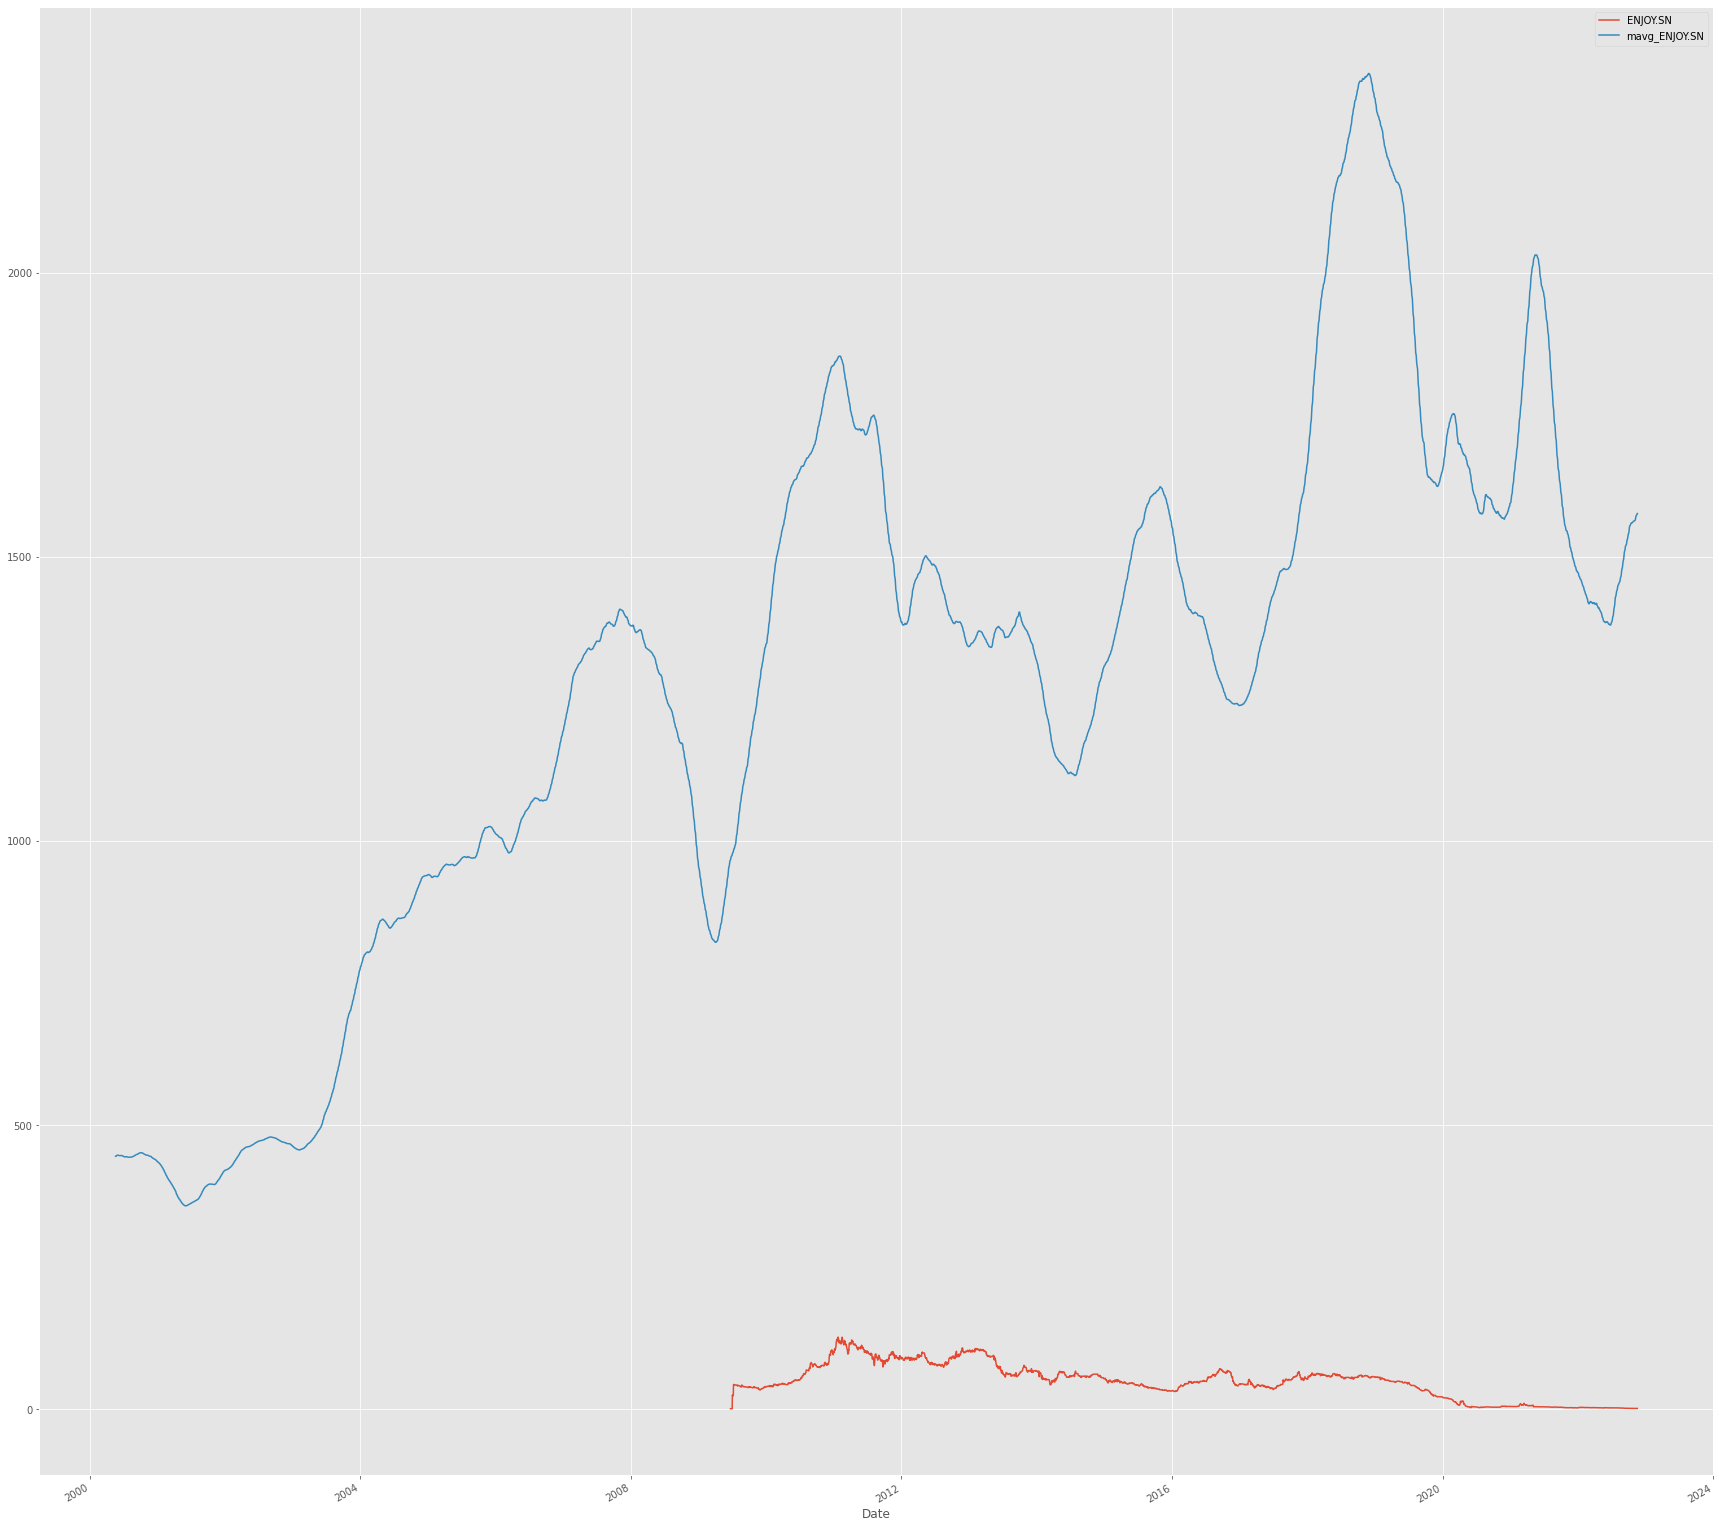

In [336]:
for i in ipsa:
  %matplotlib inline
  import matplotlib.pyplot as plt
  from matplotlib import style

  # Adjusting the size of matplotlib
  import matplotlib as mpl
  mpl.rc('figure', figsize=(30, 30))
  mpl.__version__

  # Adjusting the style of matplotlib
  style.use('ggplot')

  globals()["close_px_" + str(i[0:-3])].plot(label=i)
  globals()["mavg" + str(i[0:-3])].plot(label='mavg_'+i)
  plt.legend()
  plt.show()


Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [337]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2000-01-03         NaN
2000-01-04   -0.008929
2000-01-05   -0.003604
2000-01-06    0.000018
2000-01-07    0.014448
Name: Adj Close, dtype: float64

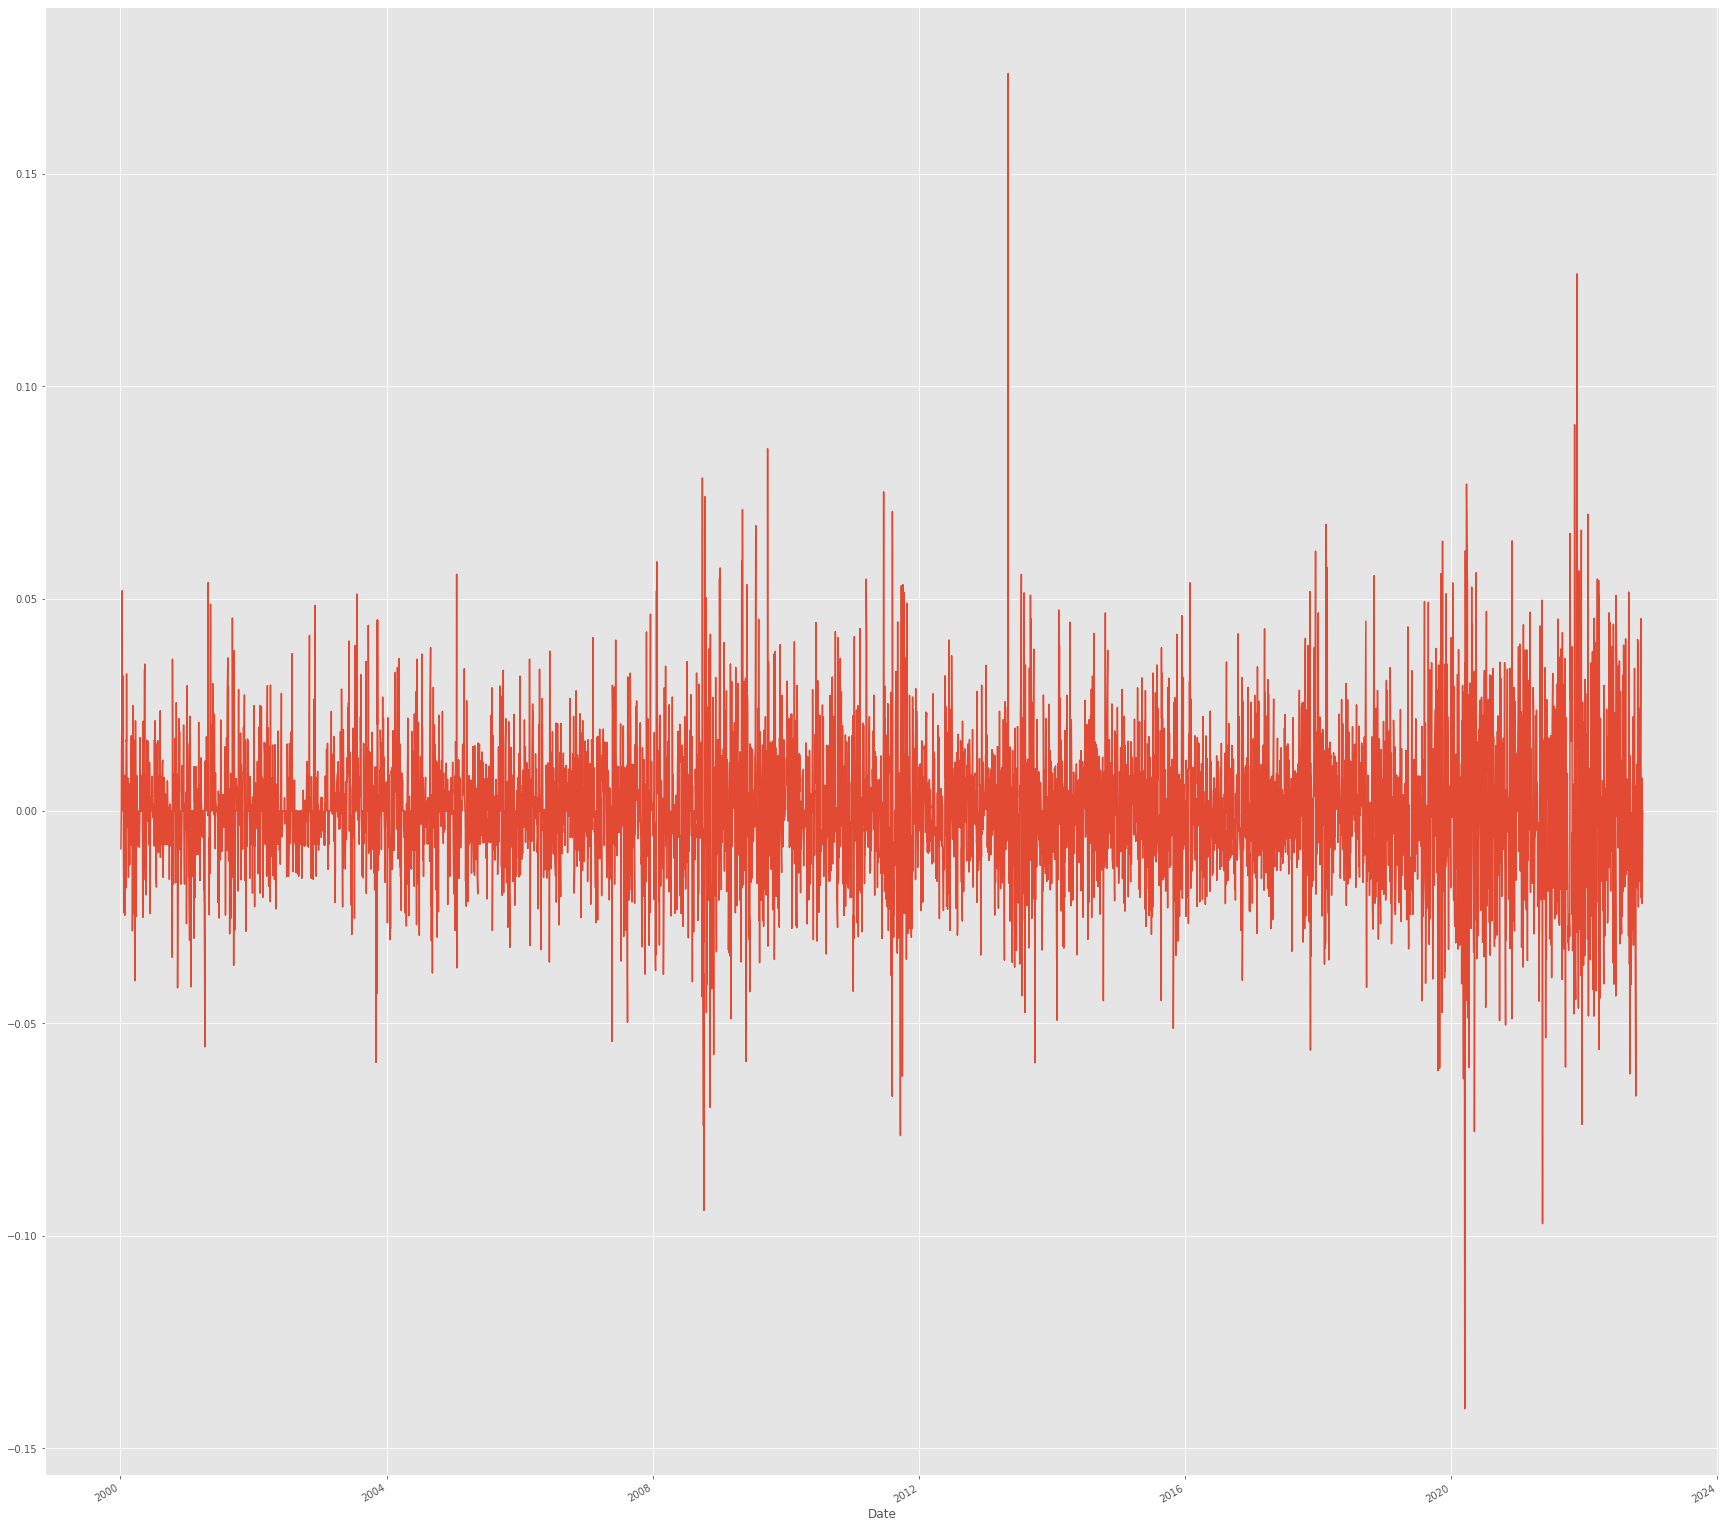

In [338]:
rets.plot(label='return')

## Doing the competitor analysis/Correlation

1. How does one company perform in relative with its competitor
2. What are the correlations among these companies

In [339]:

dfcomp = web.DataReader(ipsa,'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols        HLAG.DE  MAERSK-B.CO   VALE  INVERCAP.SN  SQM-B.SN   CHILE.SN  \
Date                                                                           
2022-11-14  193.100006      15425.0  15.71  2293.100098   95150.0  84.500000   
2022-11-15  190.899994      15315.0  15.81  2293.100098   91414.0  83.900002   
2022-11-16  188.000000      14855.0  15.22  2293.199951   90900.0  84.389999   
2022-11-17  187.699997      14970.0  15.33  2278.300049   85000.0  84.959999   
2022-11-18  187.000000      15020.0  15.07  2248.199951   85400.0  84.760002   

Symbols     BSANTANDER.SN     COPEC.SN  CENCOSUD.SN  FALABELLA.SN  ...  \
Date                                                               ...   
2022-11-14      33.849998  6560.000000       1285.0        1685.0  ...   
2022-11-15      33.360001  6385.000000       1291.0        1670.0  ...   
2022-11-16      33.000000  6360.000000       1300.0        1646.0  ...   
2022-11-17      33.000000  6389.899902       1300.0        1605.0  ...   
2022-11-18      33.700001  6330.000000       1285.0        1601.0  ...   

Symbols         SMU.SN      ECL.SN    SONDA.SN   RIPLEY.SN  SECURITY.SN  \
Date                                                                      
2022-11-14  100.650002  512.809998  324.339996  144.789993   156.119995   
2022-11-15  103.669998  500.109985  327.600006  141.839996   154.100006   
2022-11-16  106.500000  503.450012  325.000000  143.320007   154.789993   
2022-11-17  108.419998  504.410004  324.690002  146.000000   155.839996   
2022-11-18  110.589996  504.750000  323.989990  146.820007   155.360001   

Symbols     QUINENCO.SN  BESALCO.SN  MASISA.SN  LTM.SN  ENJOY.SN  
Date                                                              
2022-11-14  2668.800049  310.890015  27.340000   5.865     1.307  
2022-11-15  2680.000000  306.559998  27.340000   5.719     1.369  
2022-11-16  2673.699951  313.290009  26.740000   5.881     1.487  
2022-11-17  2670.100098  316.559998  26.559999   5.879     1.518  
2022-11-18  2691.000000  316.559998  27.000000   5.888     1.421  

[5 rows x 37 columns]

Get the dimension of dataframes

In [340]:
dfcomp.shape

(5934, 37)

In [341]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols         HLAG.DE  MAERSK-B.CO      VALE  INVERCAP.SN  SQM-B.SN  \
Symbols                                                                 
HLAG.DE        1.000000     0.384366  0.117429     0.037189  0.110147   
MAERSK-B.CO    0.384366     1.000000  0.301339     0.104393  0.192532   
VALE           0.117429     0.301339  1.000000     0.147396  0.350958   
INVERCAP.SN    0.037189     0.104393  0.147396     1.000000  0.145013   
SQM-B.SN       0.110147     0.192532  0.350958     0.145013  1.000000   
CHILE.SN       0.056529     0.163645  0.234261     0.131036  0.334455   
BSANTANDER.SN  0.084911     0.199614  0.287402     0.128347  0.358501   
COPEC.SN       0.061406     0.177938  0.267827     0.138686  0.345622   
CENCOSUD.SN   -0.000693     0.150423  0.229284     0.114035  0.301751   
FALABELLA.SN   0.083109     0.164160  0.251947     0.134688  0.326678   
ENELAM.SN      0.067383     0.151740  0.260581     0.107881  0.335212   
CMPC.SN        0.070478     0.164374  0.230383     0.123498  0.310013   
BCI.SN         0.042167     0.173536  0.217899     0.109242  0.303043   
VAPORES.SN     0.374472     0.181986  0.194604     0.126636  0.241861   
CAP.SN         0.100007     0.203693  0.360509     0.430396  0.344253   
CCU.SN         0.081956     0.119724  0.190133     0.088837  0.283703   
ENELCHILE.SN   0.044547     0.121061  0.092980     0.081144  0.245459   
ANDINA-B.SN    0.043545     0.123964  0.189445     0.103398  0.261867   
CONCHATORO.SN  0.010408     0.094853  0.101420     0.098515  0.185626   
PARAUCO.SN     0.075666     0.154472  0.166912     0.117803  0.232808   
ITAUCORP.SN    0.062611     0.148857  0.165766     0.116370  0.269652   
AGUAS-A.SN     0.074514     0.104608  0.128293     0.093270  0.192732   
COLBUN.SN      0.066630     0.148410  0.170871     0.099924  0.243473   
CENCOSHOPP.SN  0.098295     0.169751  0.138139     0.080732  0.261730   
ENTEL.SN       0.074037     0.129412  0.174140     0.112382  0.250476   
MALLPLAZA.SN   0.008418     0.098044  0.092889     0.106584  0.272418   
IAM.SN         0.052487     0.123543  0.152269     0.113940  0.208126   
SMU.SN         0.065128     0.135185  0.126042     0.132343  0.220807   
ECL.SN         0.042361     0.106373  0.148932     0.100676  0.163094   
SONDA.SN       0.079437     0.161199  0.210797     0.117583  0.292878   
RIPLEY.SN      0.032278     0.181591  0.232308     0.149415  0.247883   
SECURITY.SN    0.081090     0.108618  0.111399     0.112576  0.170655   
QUINENCO.SN    0.091441     0.104793  0.130143     0.095868  0.176512   
BESALCO.SN     0.043619     0.139617  0.139919     0.126603  0.208729   
MASISA.SN      0.045821     0.024034  0.018023     0.020087  0.037051   
LTM.SN         0.014107     0.065783  0.087473     0.025766  0.130655   
ENJOY.SN       0.061746    -0.020862 -0.009565     0.004798  0.029875   

Symbols        CHILE.SN  BSANTANDER.SN  COPEC.SN  CENCOSUD.SN  FALABELLA.SN  \
Symbols                                                                       
HLAG.DE        0.056529       0.084911  0.061406    -0.000693      0.083109   
MAERSK-B.CO    0.163645       0.199614  0.177938     0.150423      0.164160   
VALE           0.234261       0.287402  0.267827     0.229284      0.251947   
INVERCAP.SN    0.131036       0.128347  0.138686     0.114035      0.134688   
SQM-B.SN       0.334455       0.358501  0.345622     0.301751      0.326678   
CHILE.SN       1.000000       0.585856  0.486685     0.456919      0.477161   
BSANTANDER.SN  0.585856       1.000000  0.446387     0.407670      0.432789   
COPEC.SN       0.486685       0.446387  1.000000     0.413746      0.475938   
CENCOSUD.SN    0.456919       0.407670  0.413746     1.000000      0.451190   
FALABELLA.SN   0.477161       0.432789  0.475938     0.451190      1.000000   
ENELAM.SN      0.439072       0.415085  0.389652     0.338970      0.387705   
CMPC.SN        0.436272       0.404463  0.585150     0.396680      0.427754   
BCI.SN         0.473790       0.489125  0.4641

In [342]:
#plt.scatter(retscomp.CAP.SN, retscomp.VAPORES.SN)
#plt.xlabel('Returns CAP.SN')
#plt.ylabel('Returns VAPORES.SN')

You can do scatter matrix with all the competitors data and find the kde of each m
KDE will determine if your chart is more normally distributed leaning to the 
* left: Returns are more likely to be negative in the long run
* centre: Returns are more likely to be 0 in the long run
* right: Returns are more likely to be positive in the long run

In [343]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [344]:
#pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(600, 600));

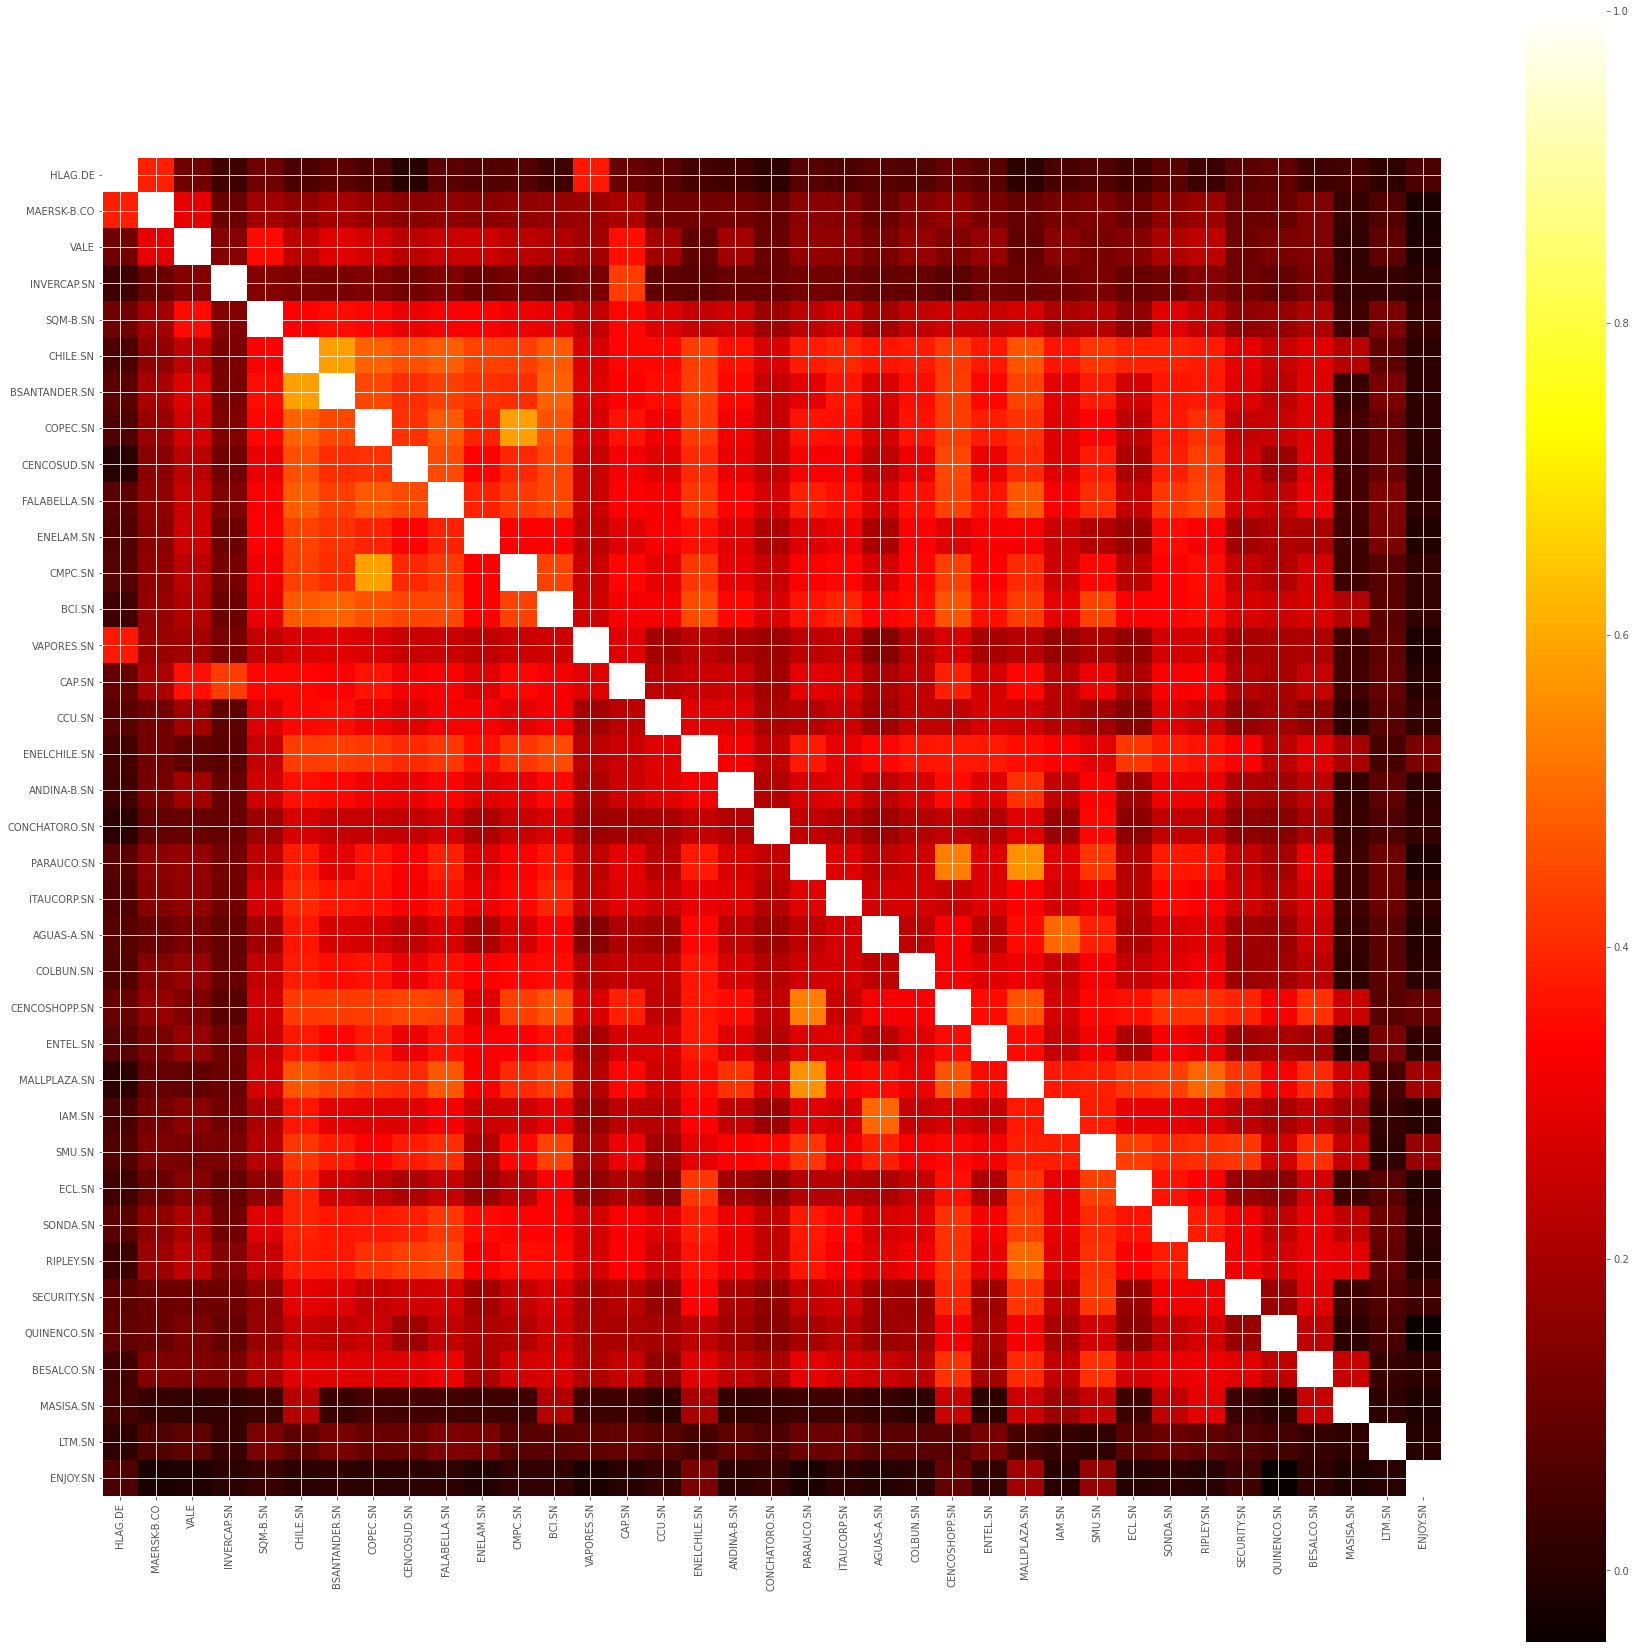

In [345]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns,rotation=90)
plt.yticks(range(len(corr)), corr.columns);

[texto del vínculo](https://)## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

Kurtosis and skewness

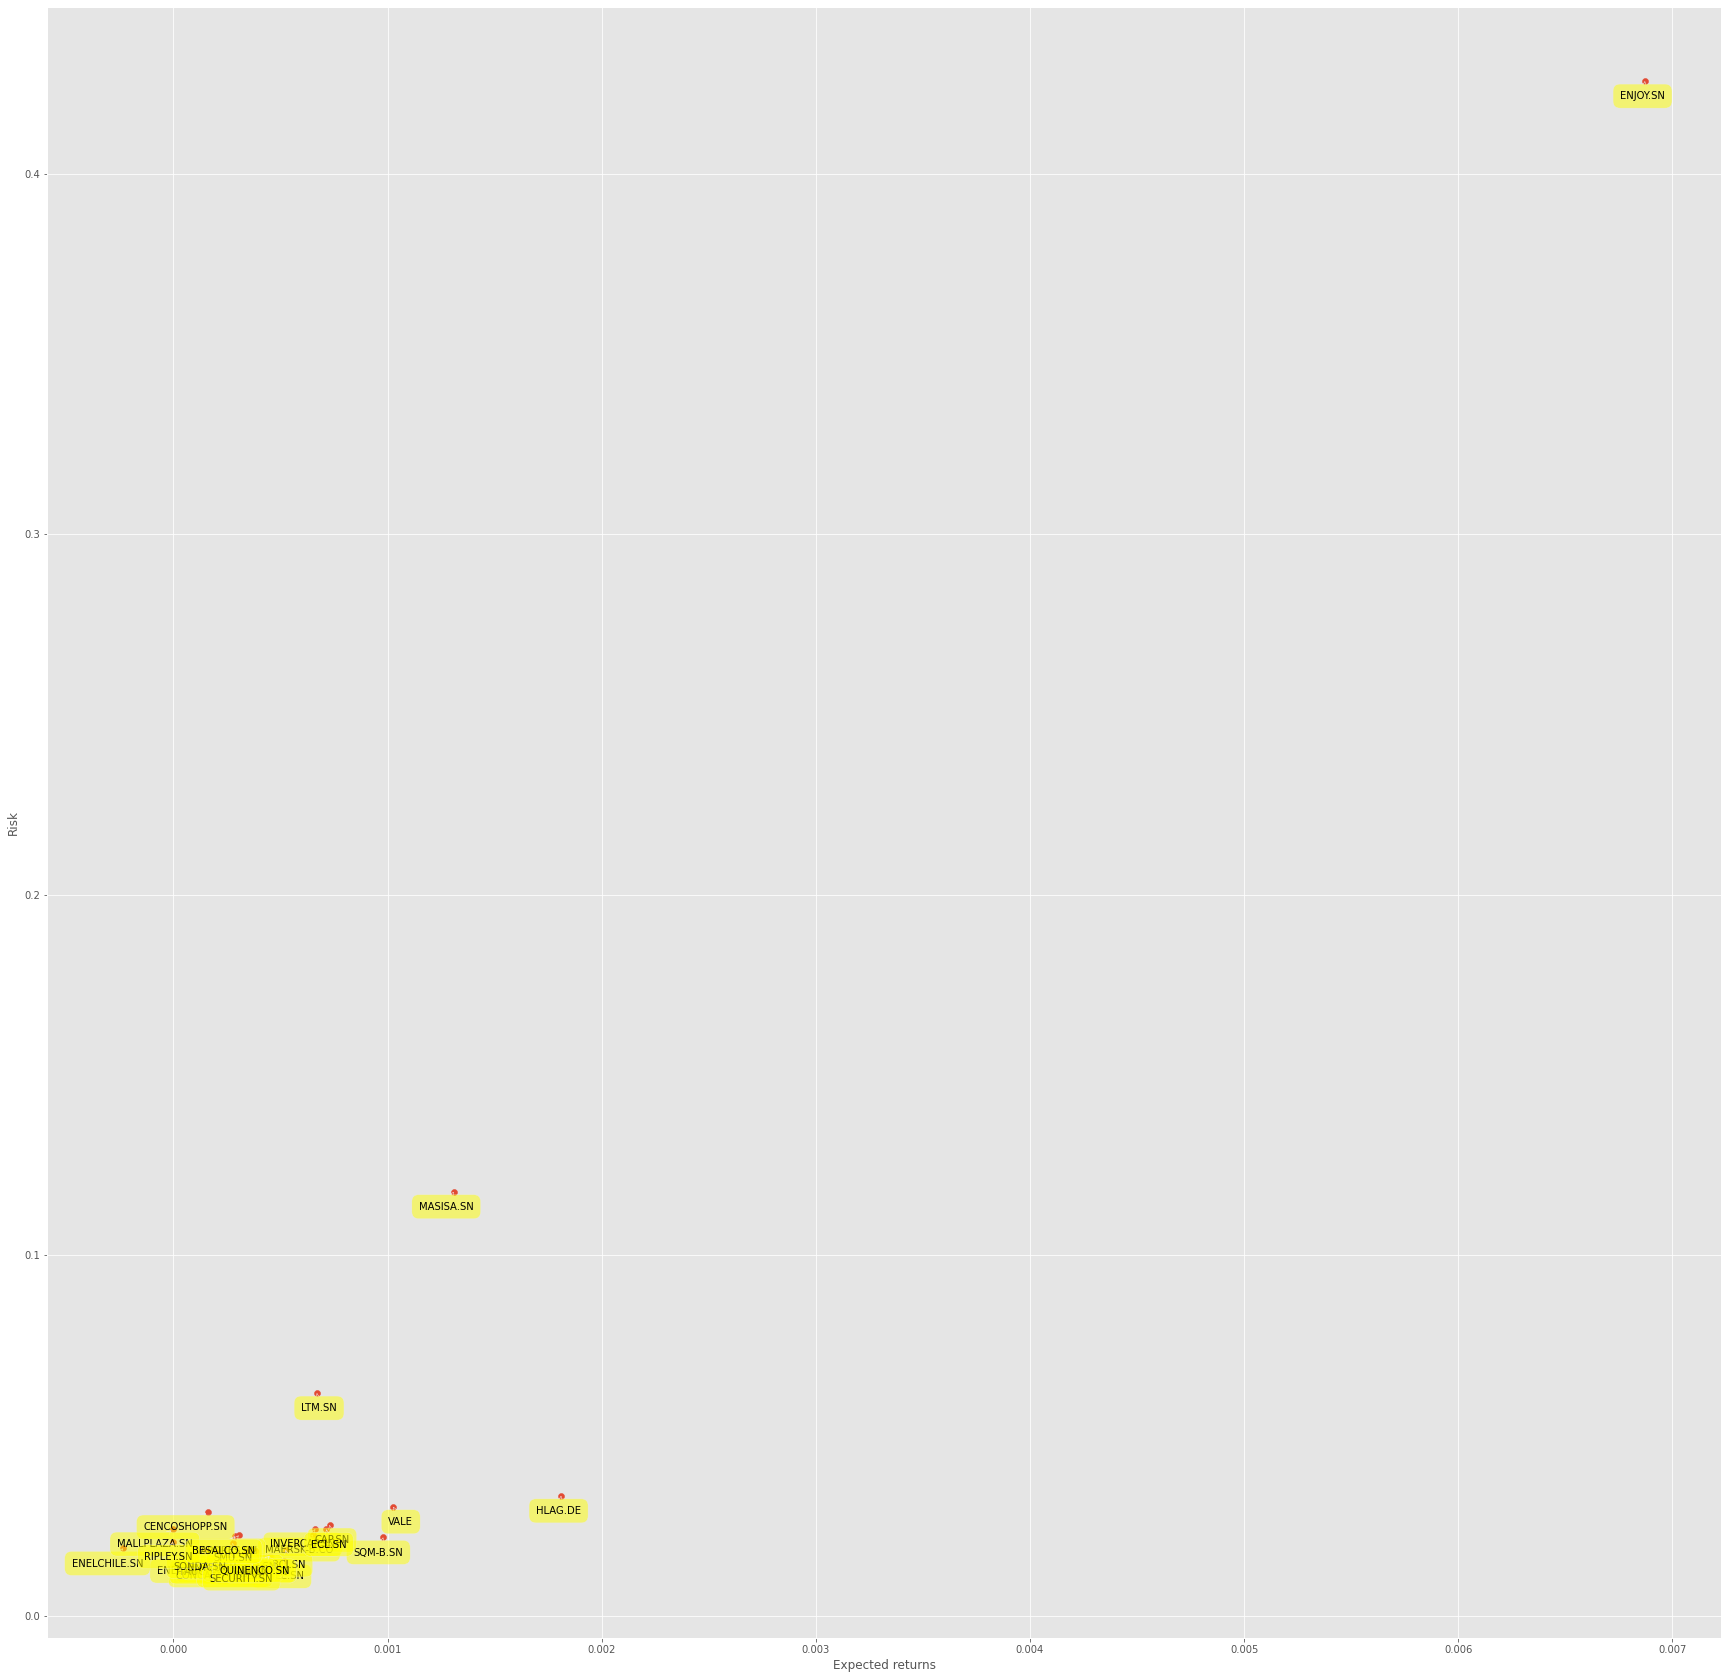

In [346]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [347]:
df.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2014-09-19  99.699997  89.949997  92.699997  93.889999  271879400  93.889999
2014-09-22  92.949997  89.500000  92.699997  89.889999   66657800  89.889999
2014-09-23  90.480003  86.620003  88.940002  87.169998   39009800  87.169998
2014-09-24  90.570000  87.220001  88.470001  90.570000   32088000  90.570000
2014-09-25  91.500000  88.500000  91.089996  88.919998   28598000  88.919998

In [348]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

Adj Close     Volume     HL_PCT  PCT_change
Date                                                   
2014-09-19  93.889999  271879400  10.384493    1.283714
2014-09-22  89.889999   66657800   3.838021   -3.031281
2014-09-23  87.169998   39009800   4.428130   -1.990110
2014-09-24  90.570000   32088000   3.698795    2.373684
2014-09-25  88.919998   28598000   3.373819   -2.382257

In [349]:
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(2058, 4)
Dimension of X (2037, 4)
Dimension of y (2037,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [350]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

## Build the model

In [351]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import datetime


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

## Test the model

In [352]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9415471212499121
The quadratic regression 2 confidence is  0.9415608722878369
The quadratic regression 3 confidence is  0.8931714072900245
The knn regression confidence is  0.9035201567401436


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. 

We need to plot out the graph to make the most sense of it 

In [353]:
# Printing the forecast

forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

[74.4578187  65.04304868 65.49185609 70.09903148 68.4090351  66.36810464
 66.36115782 68.51643283 67.30631199 67.6095067  72.03463121 72.17547023
 70.60957341 67.62300622 72.18360298 73.12132508 73.79318951 81.30681143
 80.39373642 85.01341474 82.63955134] 0.9415471212499121 21


# Plotting the Prediction

In [354]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

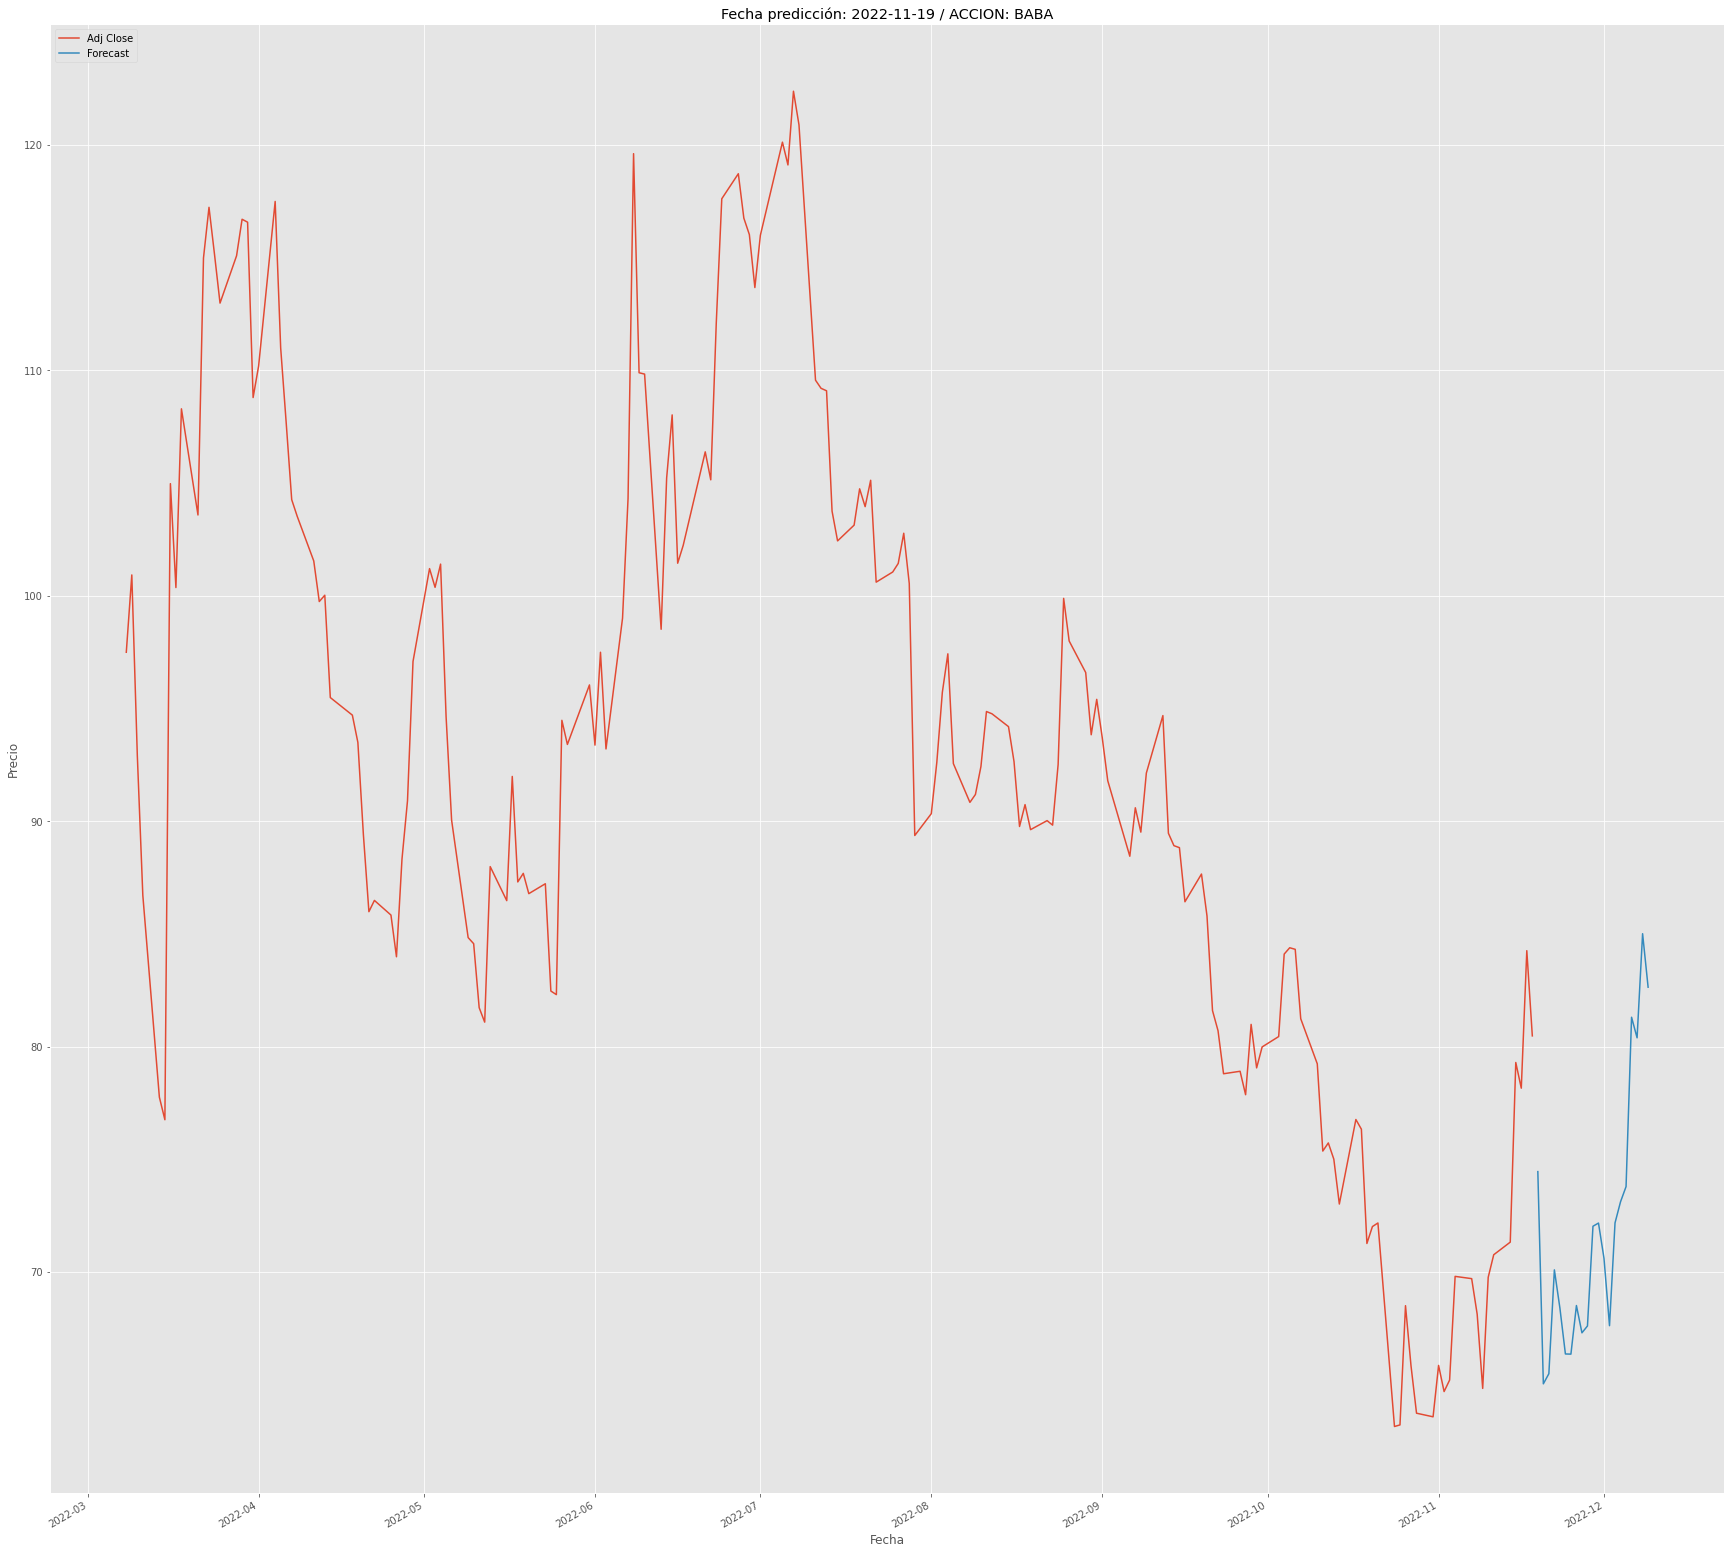

In [355]:
dfreg['Adj Close'].tail(200).plot()
dfreg['Forecast'].tail(200).plot()
plt.legend(loc=2)
plt.xlabel('Fecha')
plt.ylabel('Precio')
current_date = datetime.date.today()
plt.title("Fecha predicción: "+str(current_date) +" / ACCION: "+ str(accion_predecir))
plt.show()

# Challenges (To Be Continued):
* Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
* Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
* Cleaning out the data
* Importing data files

# Next lesson:
## Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)

# Python: How to Get Live Market Data (Less Than 0.1-Second Lag).
This article is going to be a bit special. I am going to test the latest release from Yahoo Finance API for Python, which provide the possibility to get live data with less than a second lag for free.

Before to start
First of all, if you want to track my progress and before to start, you will need to have installed on your machine a Python 3 version and the following packages:
Pandas
NumPy
Yfinance
Plotly (Not mandatory, but useful for plotting)
If any of these packages are not already installed, you can use the pip command, as shown below.

In [356]:
!pip install yfinance
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Once you have ensured that the following packages are installed, we can start.
If you already have experience with Python, you can jump to the second step. The first step will consist of importing data.
I. Import package
The first step will consist of importing the necessary packages.
You will start by importing your packages previously installed by using the following lines of code:

In [357]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go


def print_real_time(accion_predecirss):
  #Interval required 1 minute
  accion = accion_predecirss
  data = yf.download(tickers=accion, period='1d', interval='1m')

  #declare figure
  fig = go.Figure()


  #Candlestick
  fig.add_trace(go.Candlestick(x=data.index,
                  open=data['Open'],
                  high=data['High'],
                  low=data['Low'],
                  close=data['Close'], name = 'market data'))

  # Add titles
  fig.update_layout(
      title='EVOLUCIÓN EN VIVO DEL PRECIO DE LA ACCIÓN: '+accion,
      yaxis_title='PRECIO DE LAS ACCION ' + accion)

  # X-Axes
  fig.update_xaxes(
      rangeslider_visible=True,
      rangeselector=dict(
          buttons=list([
              dict(count=15, label="15m", step="minute", stepmode="backward"),
              dict(count=45, label="45m", step="minute", stepmode="backward"),
              dict(count=1, label="HTD", step="hour", stepmode="todate"),
              dict(count=3, label="3h", step="hour", stepmode="backward"),
              dict(step="all")
          ])
      )
  )

  #Show
  fig.show()

  #while True:
    #print(data)

for count, value in enumerate(ipsa):
  print("*********************************************************")
  print(count, value)
  print_real_time(value)
  print("*********************************************************")


*********************************************************
0 HLAG.DE
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
1 MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
2 VALE
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
3 INVERCAP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
4 SQM-B.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
5 CHILE.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
6 BSANTANDER.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
7 COPEC.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
8 CENCOSUD.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
9 FALABELLA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
10 ENELAM.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
11 CMPC.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
12 BCI.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
13 VAPORES.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
14 CAP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
15 CCU.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
16 ENELCHILE.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
17 ANDINA-B.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
18 CONCHATORO.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
19 PARAUCO.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
20 ITAUCORP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
21 AGUAS-A.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
22 COLBUN.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
23 CENCOSHOPP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
24 ENTEL.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
25 MALLPLAZA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
26 IAM.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
27 SMU.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
28 ECL.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
29 SONDA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
30 RIPLEY.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
31 SECURITY.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
32 QUINENCO.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
33 BESALCO.SN
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BESALCO.SN: No data found for this date range, symbol may be delisted


*********************************************************
*********************************************************
34 MASISA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
35 LTM.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
36 ENJOY.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************


In [358]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    #return forecast